## 0. Data Analysis for zhangjun.

In [ ]:
# Reload modules automatically.
%load_ext autoreload
%autoreload 2


In [ ]:
import deepethogram

: 

## 1. Load coordiantes data and processing.

### 1.1 Load ethovison data.

In [ ]:
# from analyze_data_ret_zj_utils.DataLoader import load_ev_data

# ev_xlsx_folder = '/home/gxj/Desktop/gxj/code/sb_ret_code/ev_xlsx/'

# coord_ev_dict, _ = load_ev_data(ev_xlsx_folder)

### 1.2 Load deeplabcut data.

#### 1.2.1 Load Raw dlc data.

In [3]:
from analyze_data_ret_zj_utils.DataLoader import load_dlc_data

dlc_h5_folder = '/home/gxj/Desktop/gxj/code/sb_ret_code/dlc_h5/'
file_map_path = '/home/gxj/Desktop/gxj/code/sb_ret_code/file_map.yaml'

coord_dlc_dict, _ = load_dlc_data(dlc_h5_folder, file_map_path)

KeyError 'Video_20251104120826546DLC_HrnetW32_kpms-dlcDec16shuffle1_detector_best-30_snapshot_best-20.h5' in file Video_20251104120826546DLC_HrnetW32_kpms-dlcDec16shuffle1_detector_best-30_snapshot_best-20.h5: check file_map.yaml
All DeepLabCut data loaded.


#### 1.2.2 Find outliers and linear interpolate.

In [4]:
from analyze_data_ret_zj_utils.DataProcessor import apply_coordinate_filters


filtered_coords = apply_coordinate_filters(
    coord_dlc_dict,
    filters=['range', 'speed_interp', 'drift', 'speed_interp'],  # or ['range', 'drift', 'speed_interp']
    x_range=(1150, 1950),
    y_range=(440, 1160),
    axis_threshold=50.0,
    keypoint_indices=None
)



Applied range filter: x(1150, 1950), y(440, 1160)
Applied speed_interp filter: threshold=50.0
Applied drift filter: threshold=50.0, context=5, max_length=20
Applied speed_interp filter: threshold=50.0


#### 1.2.3 Check filtered data.

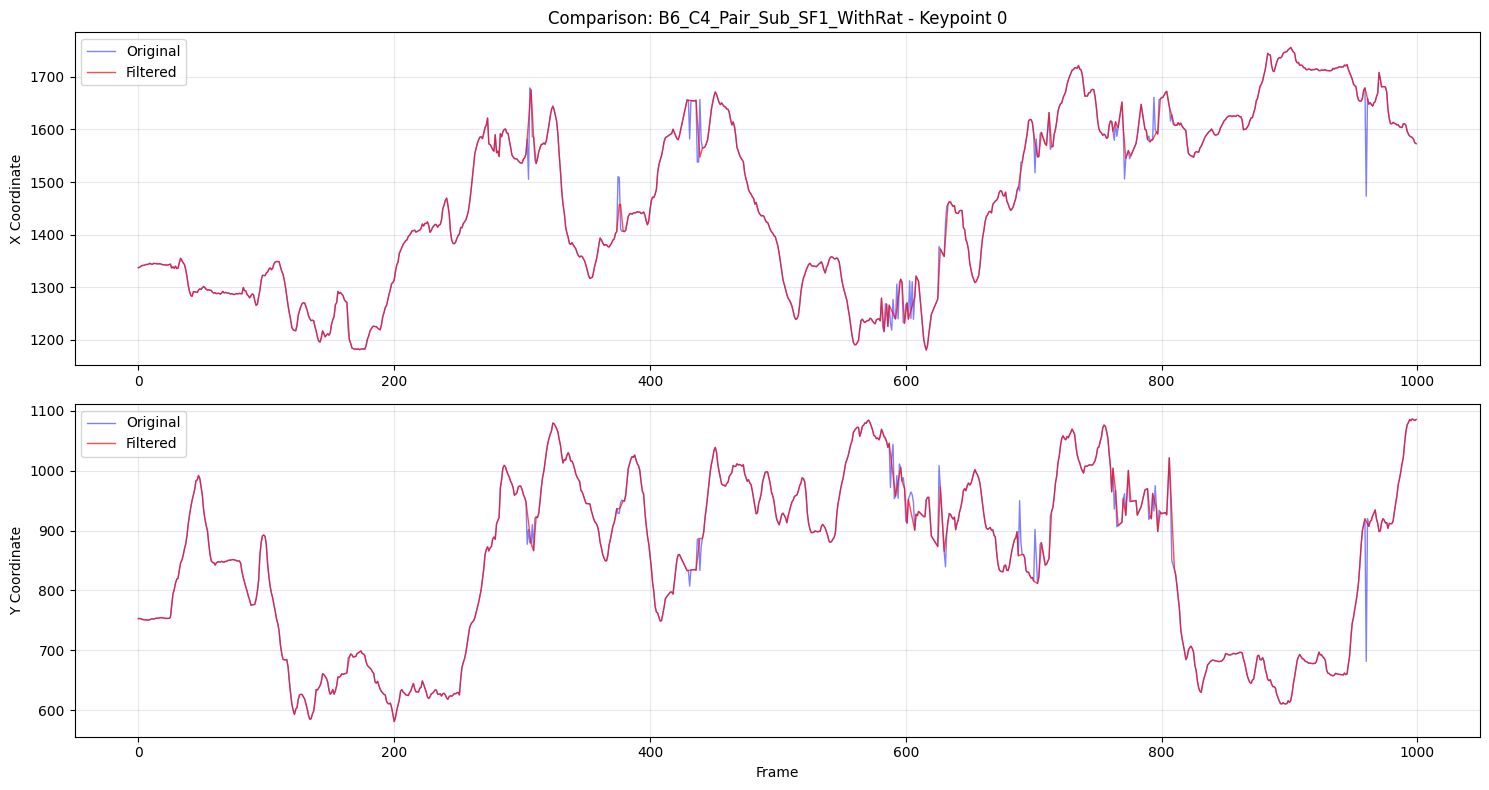

In [5]:
# Compare before and after filtering
import matplotlib.pyplot as plt

sess_id = list(coord_dlc_dict.keys())[0]
kpt_idx = 0  # First keypoint

# Get original and filtered data
original = coord_dlc_dict[sess_id][:, kpt_idx, :]
filtered = filtered_coords[sess_id][:, kpt_idx, :]

# Plot comparison for first 1000 frames
n_frames = min(1000, original.shape[0])

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# X coordinate
axes[0].plot(original[:n_frames, 0], 'b-', alpha=0.5, label='Original', linewidth=1)
axes[0].plot(filtered[:n_frames, 0], 'r-', alpha=0.7, label='Filtered', linewidth=1)
axes[0].set_ylabel('X Coordinate')
axes[0].set_title(f'Comparison: {sess_id} - Keypoint {kpt_idx}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Y coordinate
axes[1].plot(original[:n_frames, 1], 'b-', alpha=0.5, label='Original', linewidth=1)
axes[1].plot(filtered[:n_frames, 1], 'r-', alpha=0.7, label='Filtered', linewidth=1)
axes[1].set_ylabel('Y Coordinate')
axes[1].set_xlabel('Frame')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2. Load and convert manually labeled data.

### 2.1 Load bento data.

In [6]:
import os
from analyze_data_ret_zj_utils.DataLoader import load_annot_data

bento_annot_folder = '/home/gxj/Desktop/gxj/code/sb_ret_code/bento_annot/'
file_map_path = '/home/gxj/Desktop/gxj/code/sb_ret_code/file_map.yaml'

bhvr_tuples_dict, bhvr_tuples_dict_p, bhvr_tuples_dict_s = load_annot_data(bento_annot_folder, file_map_path)

### 2.2 Convert bento data to binary series data (deepethogram).

In [7]:
from analyze_data_ret_zj_utils.DataLoader import convert_bhvr_tuples2series, save_bhvr_dicts

bhvr_csv_folder = '/home/gxj/Desktop/gxj/code/sb_ret_code/labels_csv/'

bhvr_series_dict_p = convert_bhvr_tuples2series(bhvr_tuples_dict_p)
bhvr_series_dict_s = convert_bhvr_tuples2series(bhvr_tuples_dict_s)
save_bhvr_dicts(bhvr_series_dict_p, bhvr_csv_folder, save_format='csv')
save_bhvr_dicts(bhvr_series_dict_s, bhvr_csv_folder, save_format='csv')

Saved 2 files to /home/gxj/Desktop/gxj/code/sb_ret_code/labels_csv/
Saved 1 files to /home/gxj/Desktop/gxj/code/sb_ret_code/labels_csv/


['/home/gxj/Desktop/gxj/code/sb_ret_code/labels_csv/B6_C1_Single_WithRat_labels.csv']

### 2.3 Load deepethogram data.

In [8]:
from analyze_data_ret_zj_utils.DataLoader import load_de_data

# Load and reorganize behavior data from CSV files
bhvr_csv_folder = '/home/gxj/Desktop/gxj/code/sb_ret_code/labels_csv'
file_map_path = '/home/gxj/Desktop/gxj/code/sb_ret_code/file_map.yaml'

bhvr_series_dict = load_de_data(bhvr_csv_folder, file_map_path)

## 3. Load time of interest data.

In [9]:
import yaml
from analyze_data_ret_zj_utils.DataLoader import load_toi_dict

exp_time_dict_path = '/home/gxj/Desktop/gxj/code/sb_ret_code/exp_time_dict.yaml'
with open(exp_time_dict_path, 'r') as f:
    exp_time_dict = yaml.safe_load(f)

pre_toi_dict, wr_toi_dict, post_toi_dict = load_toi_dict(exp_time_dict)
toi_dict = wr_toi_dict

for k, v in toi_dict.items():
    print(f"  {k}: {v}")

group_color_dict = {
    'sD': '#ffbb78',
    'pD': '#ff7f0e',
    'sS': '#aec7e8',
    'pS': '#1f77b4'
}

  B6_C1_Pair_Sub_SF1_WithRat: (3777, 9777)
  B6_C1_Pair_Dom_WT_WithRat: (3777, 9777)
  B6_C4_Pair_Sub_SF1_WithRat: (3801, 9801)
  B6_C4_Pair_Dom_WT_WithRat: (3801, 9801)
  B6_C1_Single_Sub_SF1_WithRat: (3263, 9263)


## 4. Visualization.

### 4.1 Draw ethograms.

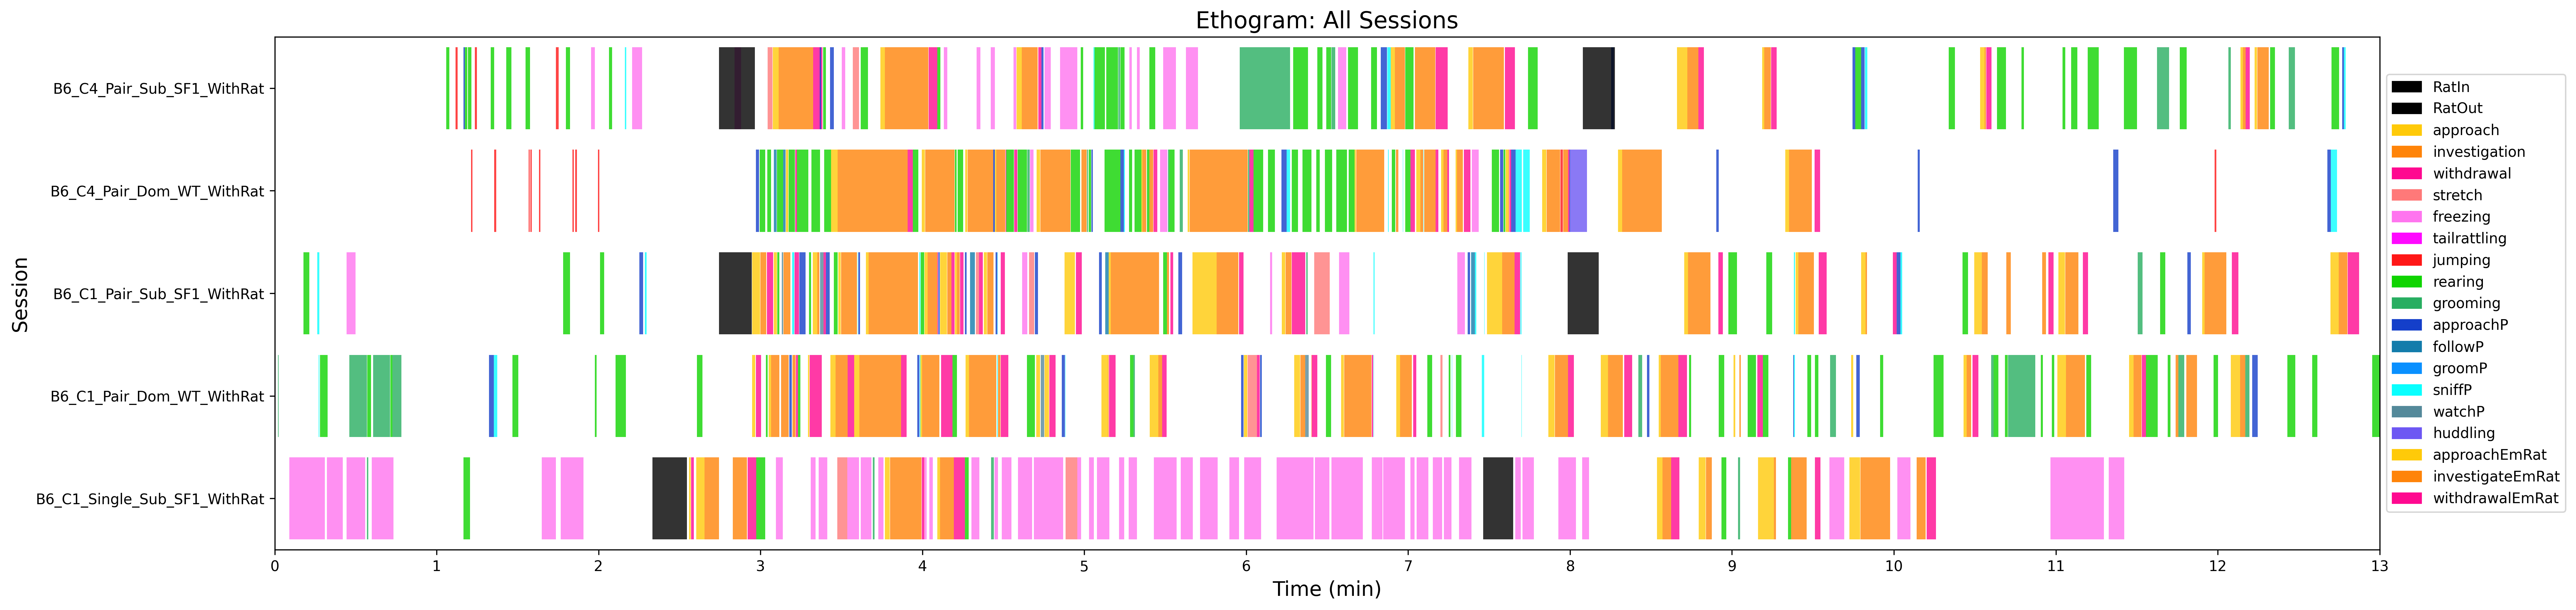

In [10]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_ethogram

bhvr_params = {
    'RatIn': ('black', 5),
    'RatOut': ('black', 5),
    'approach': ('#FFCA09', 3),
    'investigation': ('#FF8409', 3),
    'withdrawal': ('#FF0990', 3),
    'stretch': ('#FF7979', 3),
    'freezing': ('#FF75EF', 3),
    'tailrattling': ('#FF09FF', 3),
    'jumping': ('#FF1717', 3),
    'rearing': ('#0FD400', 2),
    'grooming': ('#28AE61', 2),
    'approachP': ('#143FCA', 4),
    'followP': ('#137CAB', 4),
    'groomP': ('#0990FF', 4),
    'sniffP': ('#09FFFF', 4),
    'watchP': ("#54899A", 4),
    'huddling': ('#6D57F3', 4),
    'approachEmRat': ('#FFCA09', 3),
    'investigateEmRat': ('#FF8409', 3),
    'withdrawalEmRat': ('#FF0990', 3),
}

# ethogram_sess_list = ['B6_C1_Pair_Dom_SF1_WithRat']
sess_list = None
draw_ethogram(
    bhvr_tuples_dict,
    bhvr_params,
    sess_list=sess_list,
    fps=20,
    mode='merged',
    save_path=False
)

### 4.2 Draw behavior time.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


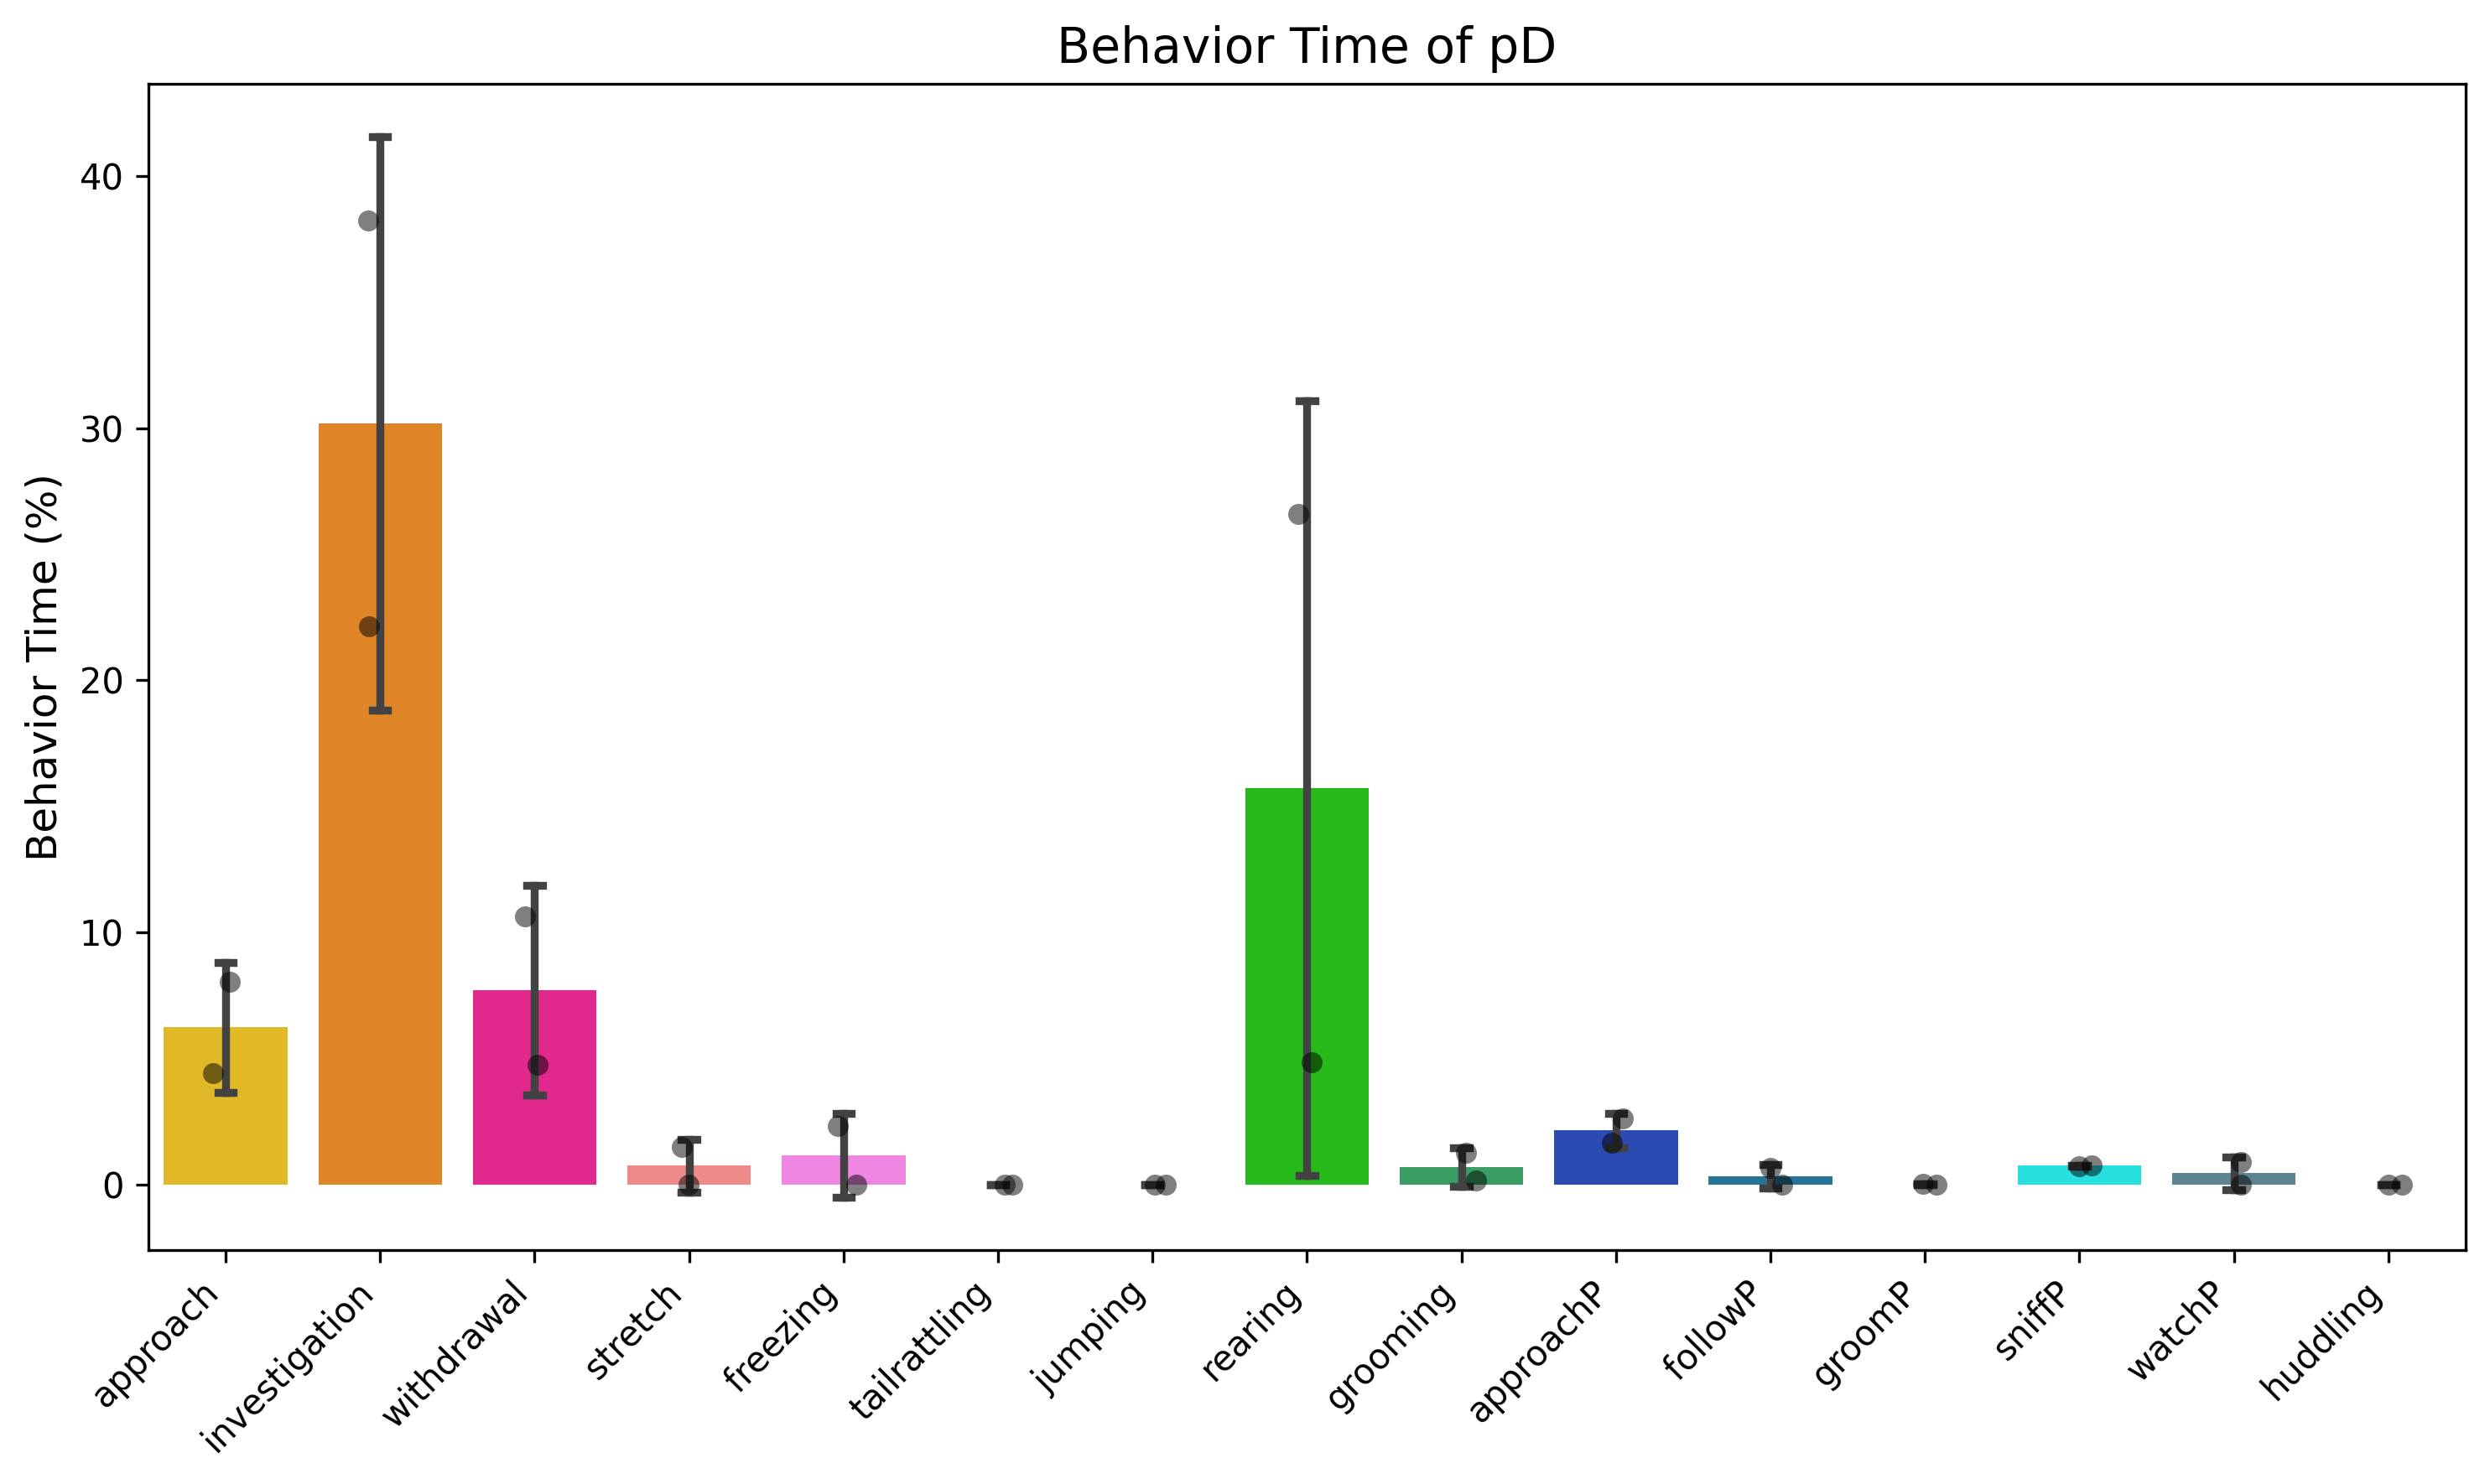

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


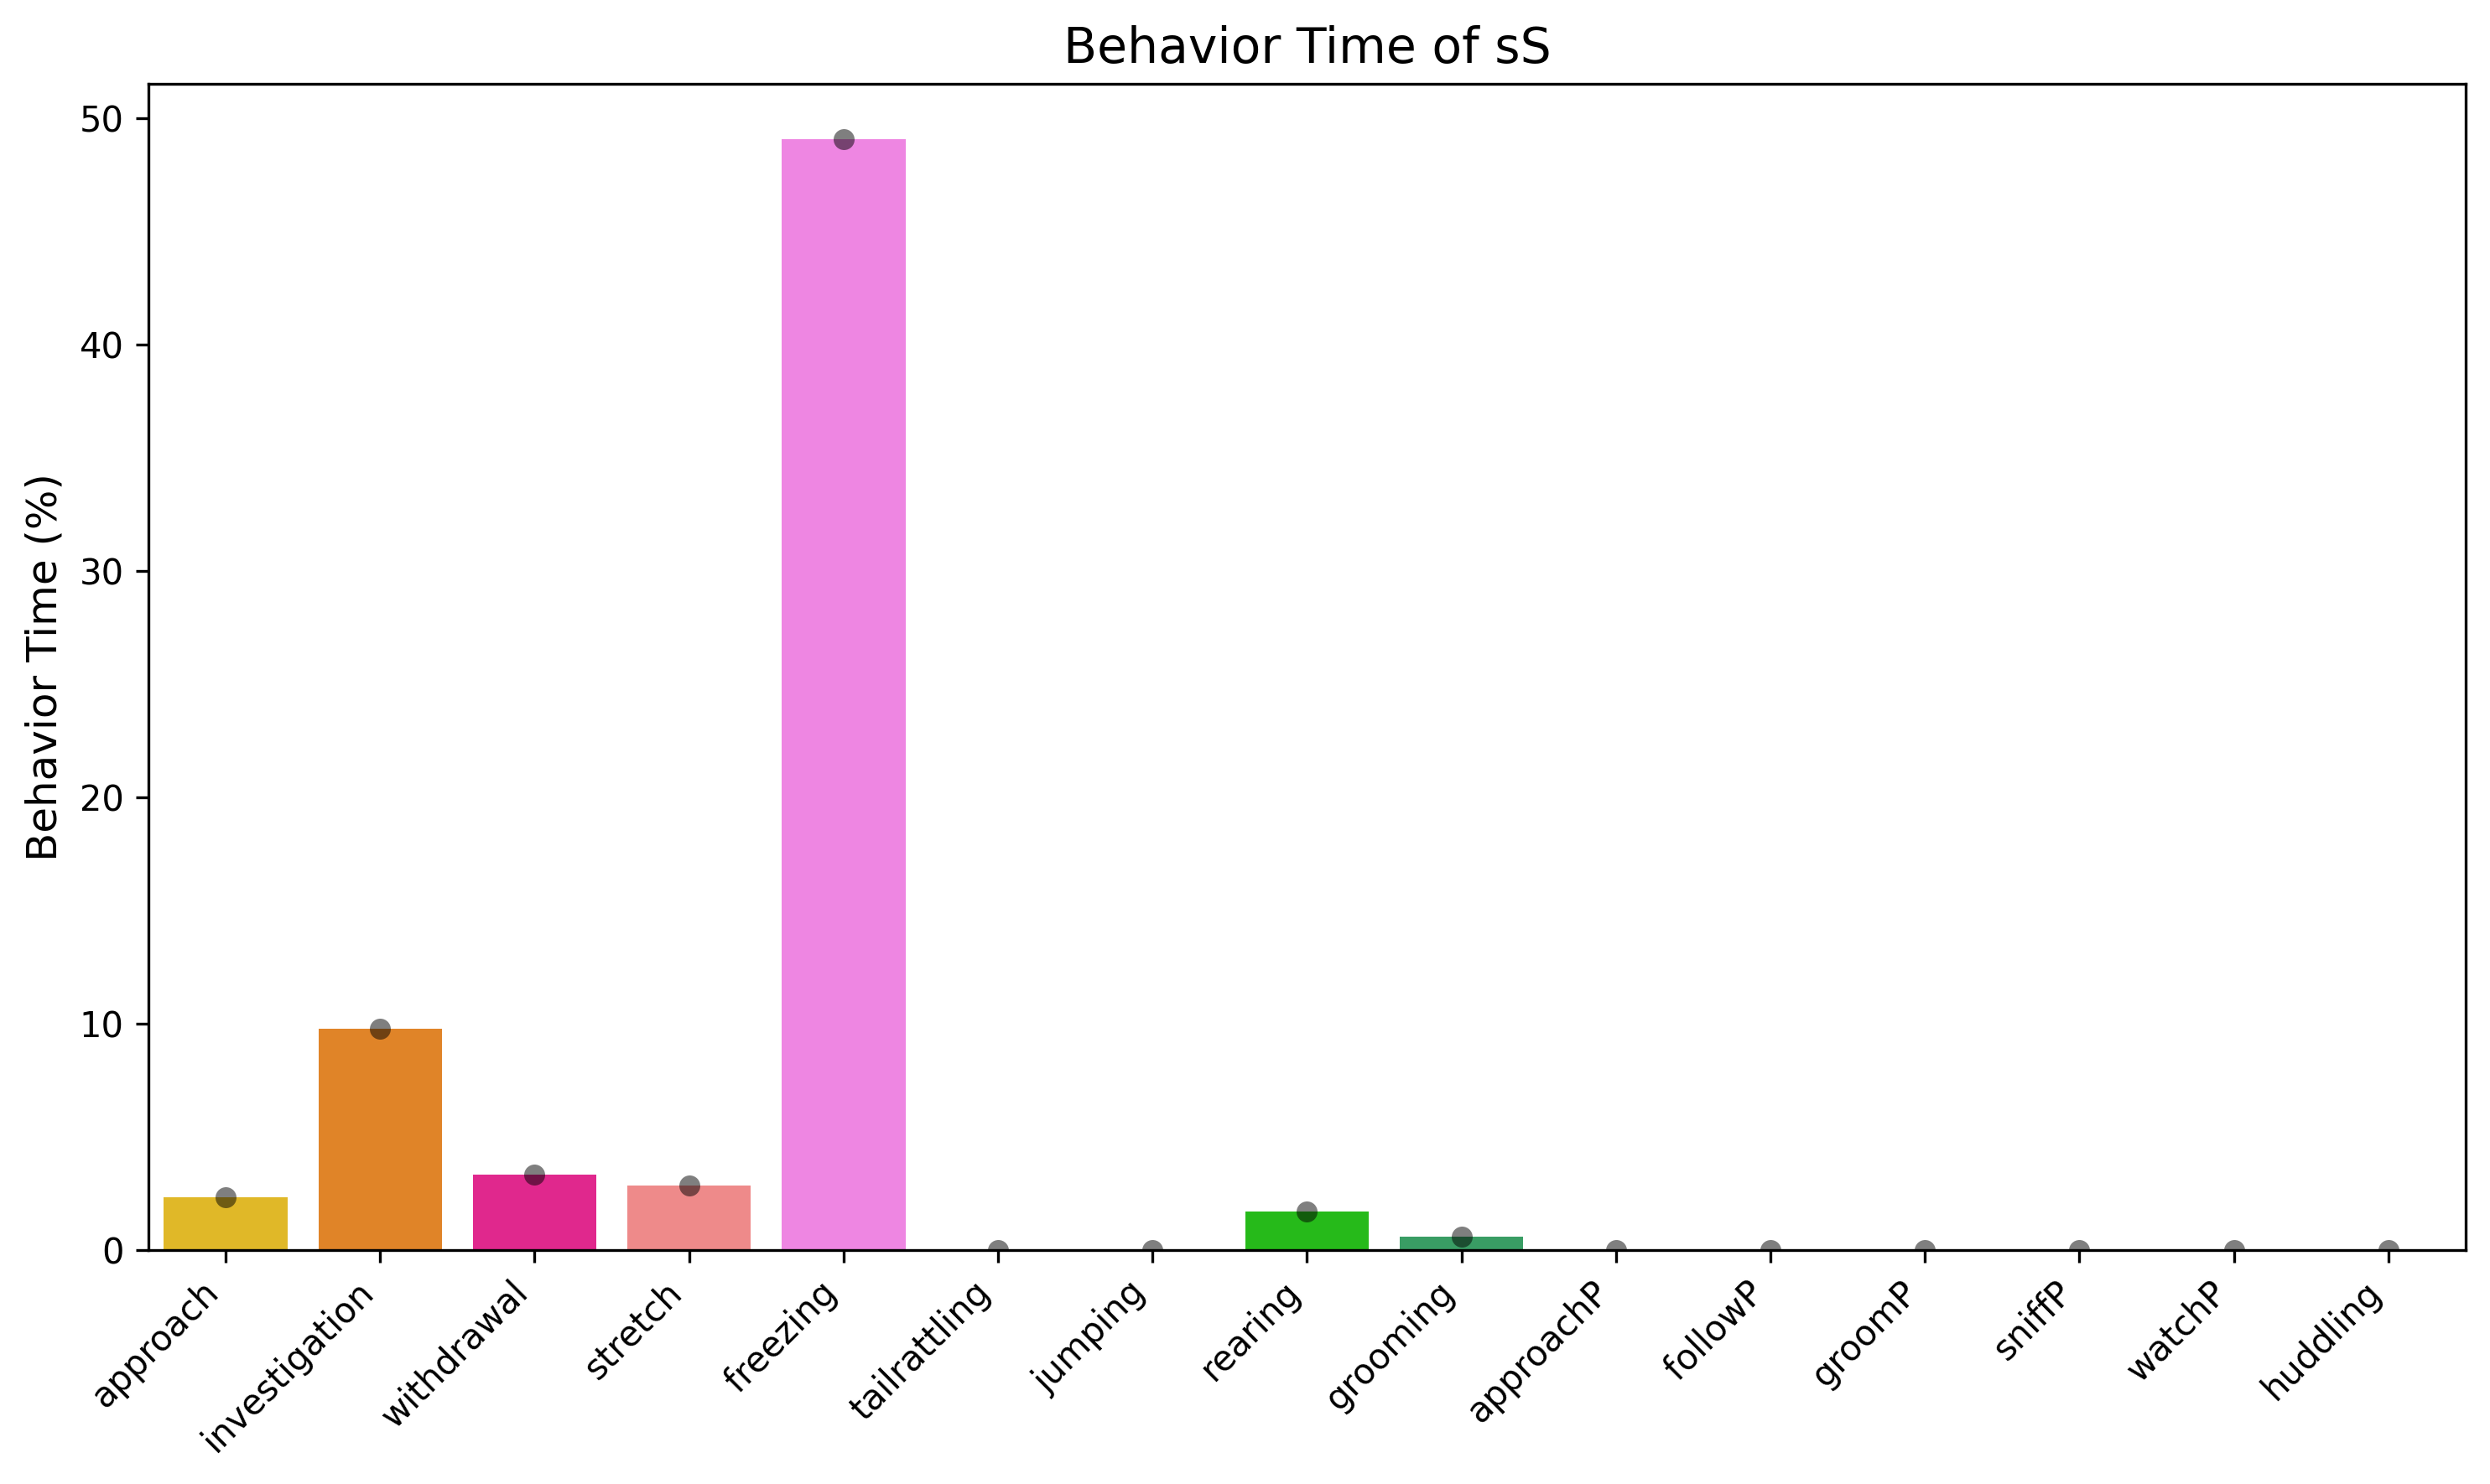

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


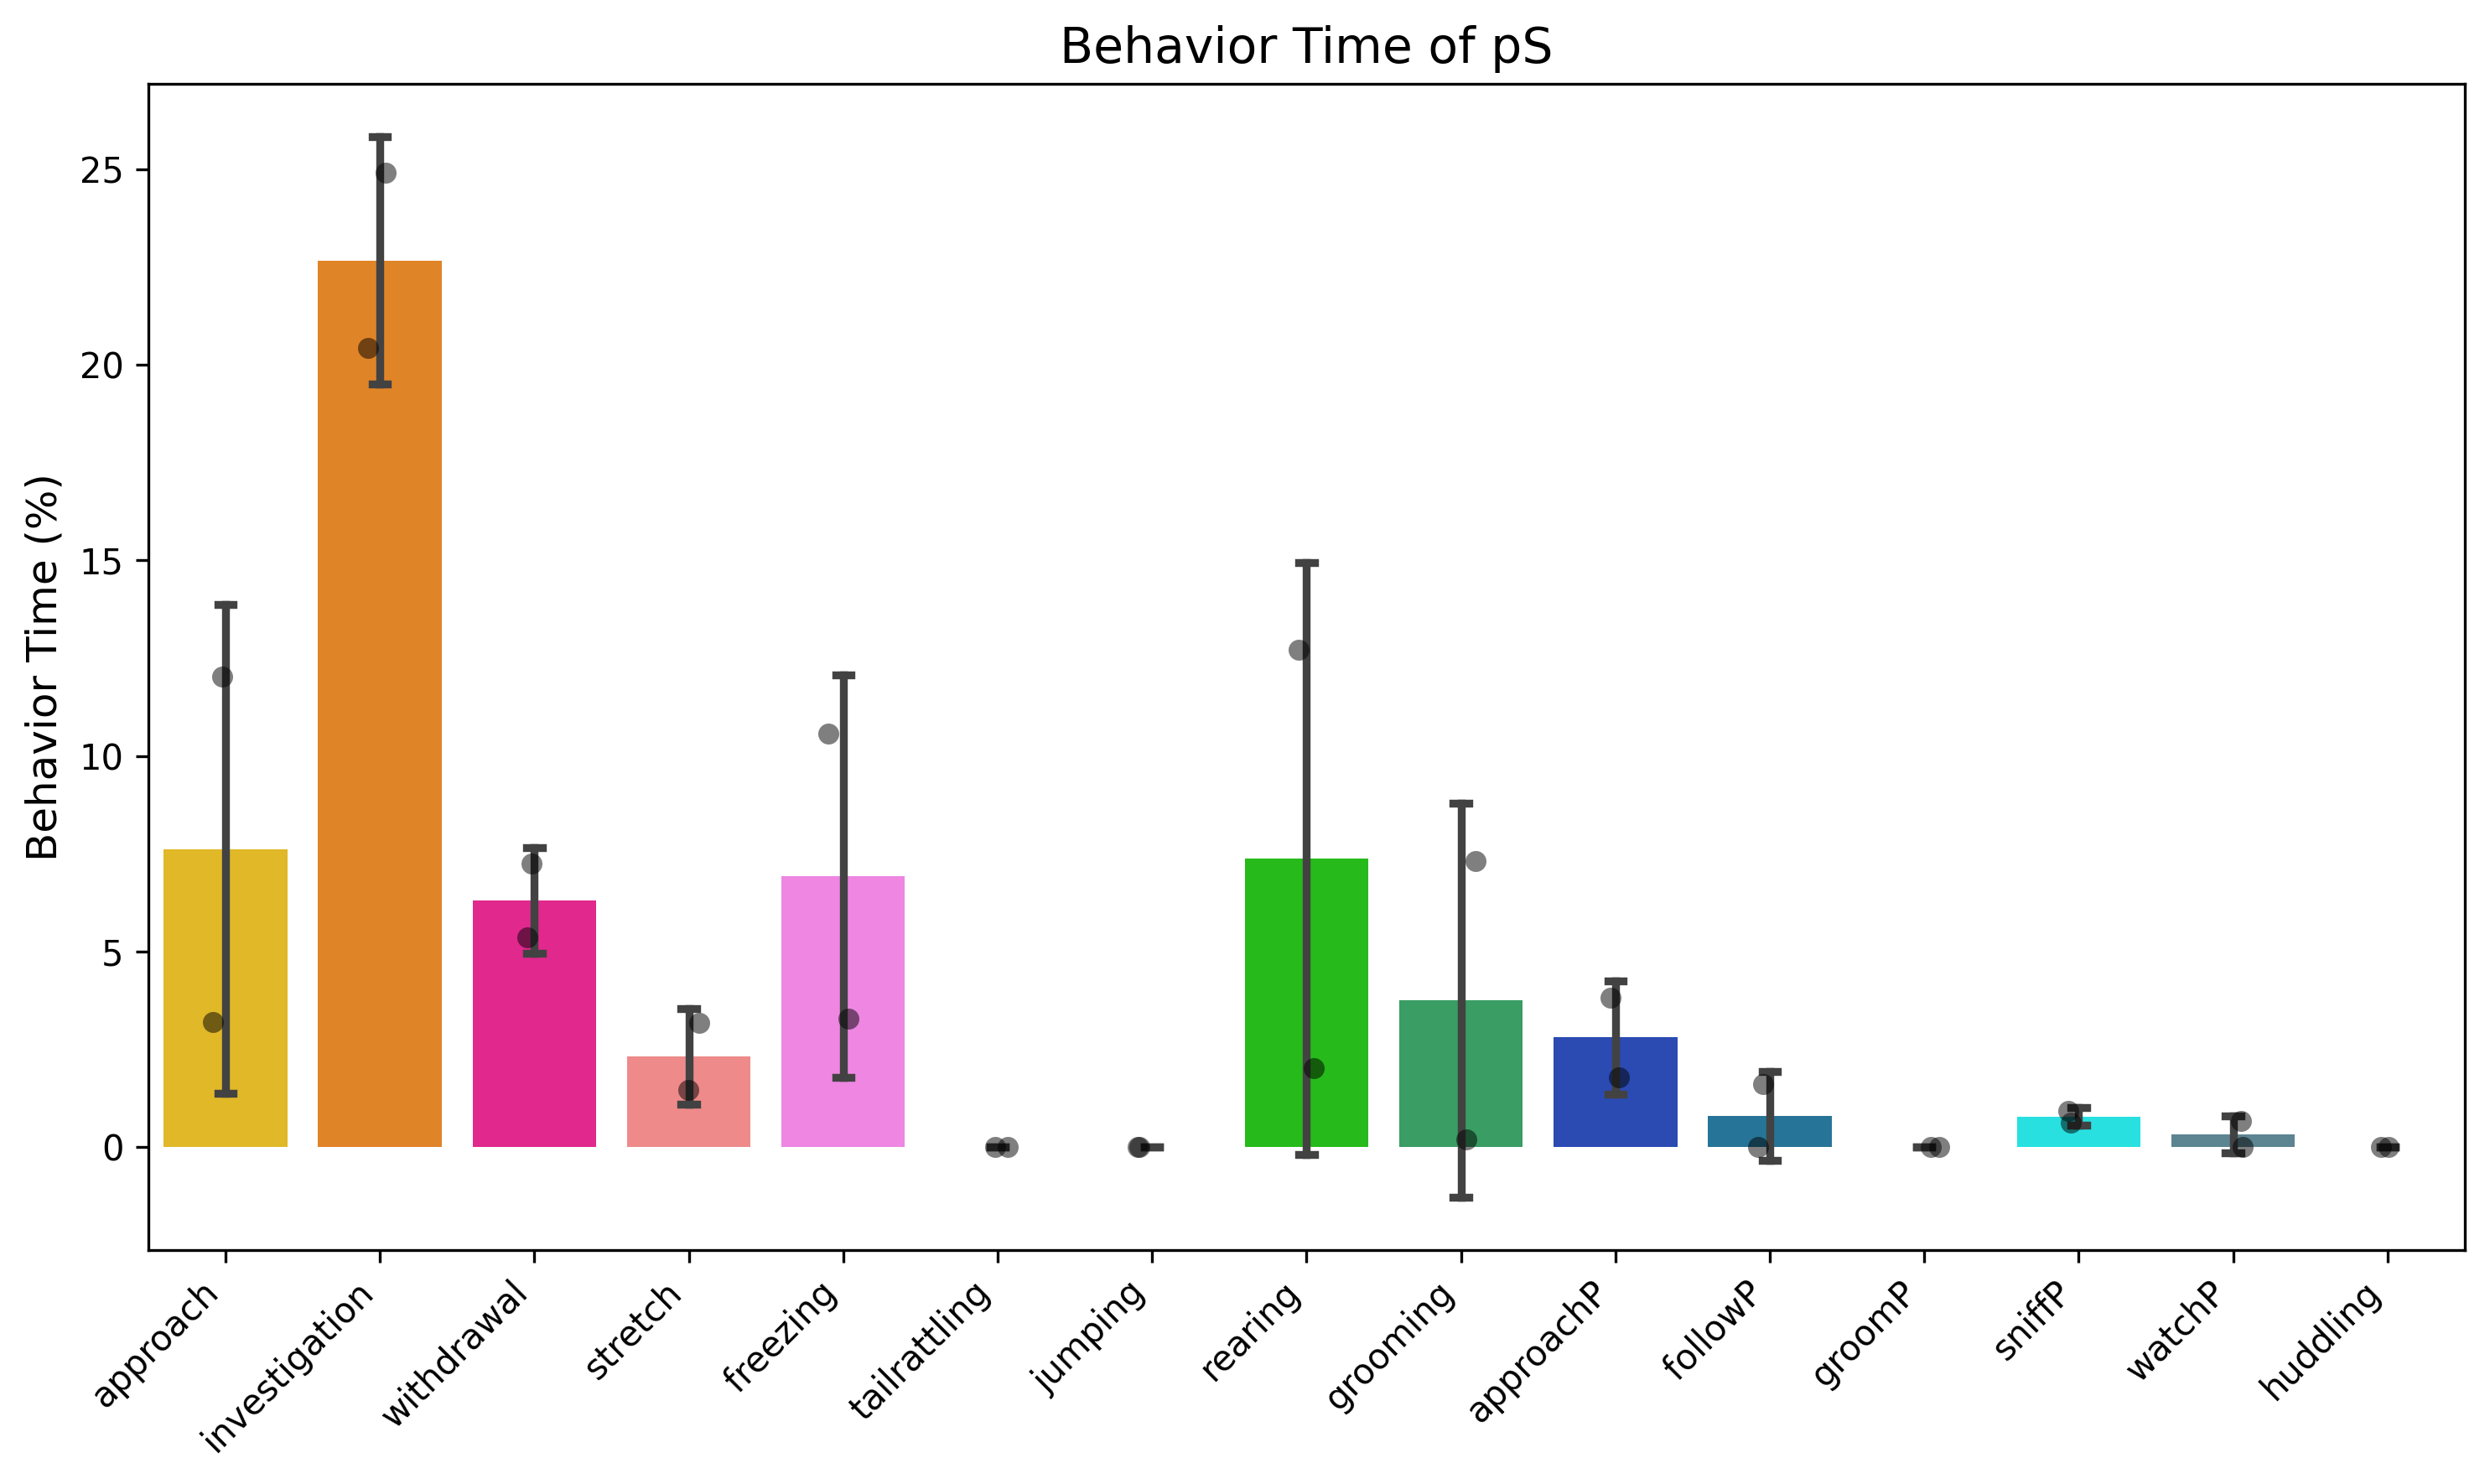

In [11]:
from analyze_data_ret_zj_utils.DataAnalyzer import filter_behavior_in_time_range, calculate_pct, group_data_by_sess_id
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

boi = [
    'approach', 'investigation', 'withdrawal', 'stretch', 
    'freezing', 'tailrattling', 'jumping', 
    'rearing', 'grooming',
    'approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling'
    ]

all_bhvr_data = filter_behavior_in_time_range(bhvr_tuples_dict, toi_dict, boi)
bhvr_pct = calculate_pct(all_bhvr_data, total_time=300)
bhvr_pct_grouped = group_data_by_sess_id(bhvr_pct)

for group in ['pD', 'sS', 'pS']:
    draw_bar_plot(
        bhvr_pct_grouped[group],
        ylabel='Behavior Time (%)',
        title=f'Behavior Time of {group}',
        show_points=True,
        plot_type='bar',
        order=list(bhvr_params.keys()),
        color_dict=bhvr_params,
        # jitter=False
    )

### 4.3 Draw transition networks.

In [12]:
from analyze_data_ret_zj_utils.DataAnalyzer import filter_behavior_in_time_range, calculate_transition_matrices

boi = [
    'approach', 'investigation', 'withdrawal', 'stretch', 
    'freezing', 'tailrattling', 'jumping', 
    'rearing', 'grooming',
    'approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling'
    ]

group_bhvr_dict = {
    'ActDef': ['approachEmRat', 'investigateEmRat', 'withdrawalEmRat', 
               'approach', 'investigation', 'stretch', 'withdrawal'],
    'PsvDef': ['freezing', 'jumping', 'tailrattling'],
    'Soc': ['approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling'],
    'Sol&Nan': ['grooming', 'rearing', 'gap_state']
}

bhvr_series_dict_trans = filter_behavior_in_time_range(bhvr_series_dict, toi_dict, boi)

trans_results = calculate_transition_matrices(
    bhvr_series_dict_trans,
    boi,
    group_bhvr_dict,
    frame_gap_threshold=20
)

all_ret_trans_martices = trans_results['fine_grained']
all_ret_trans_martices_grouped = trans_results['grouped']

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataAnalyzer.py:1013: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8333333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_matrix.loc[state] = normalized_matrix.loc[state] / row_sums[state]
/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataAnalyzer.py:1013: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_matrix.loc[state] = normalized_matrix.loc[state] / row_sums[state]
/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataAnalyzer.py:1013: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.25' has 

In [13]:
from analyze_data_ret_zj_utils.DataAnalyzer import group_transition_matrices

all_ret_trans_martices_grouped_avg = group_transition_matrices(all_ret_trans_martices)
all_ret_trans_martices_grouped_bhvr_avg = group_transition_matrices(all_ret_trans_martices_grouped)

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:590: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


sD: is empty, skipping.


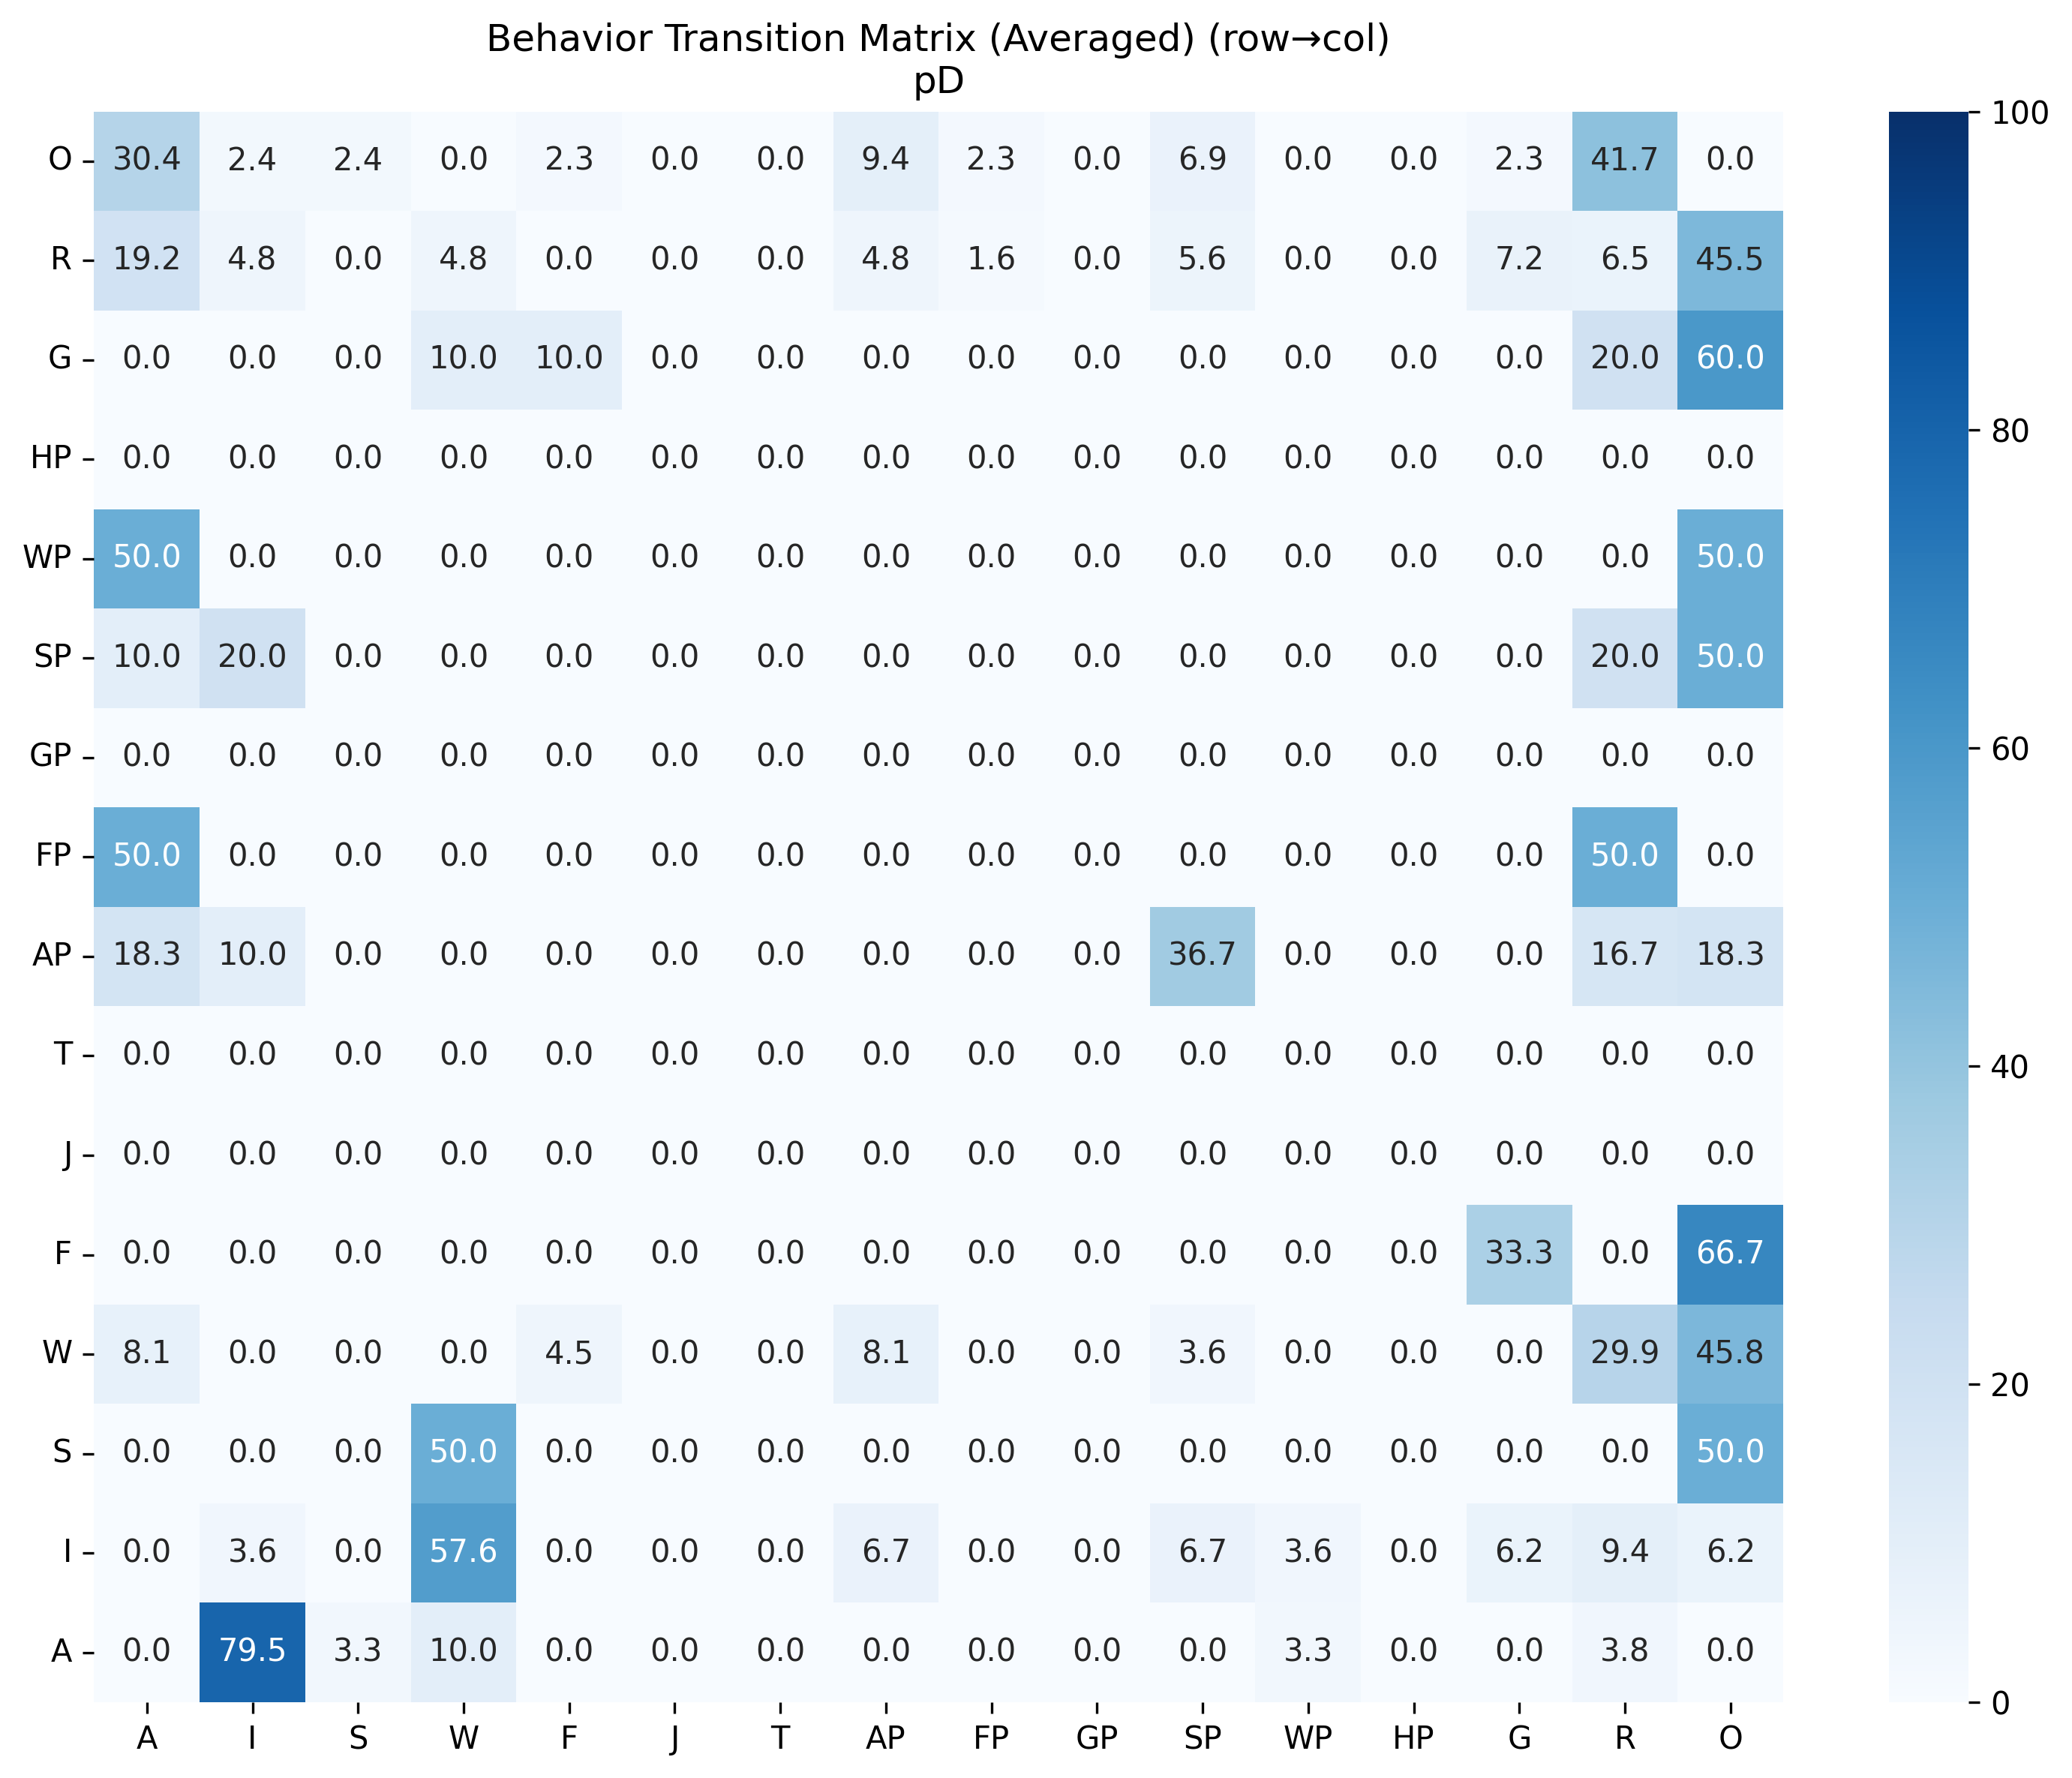

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:590: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


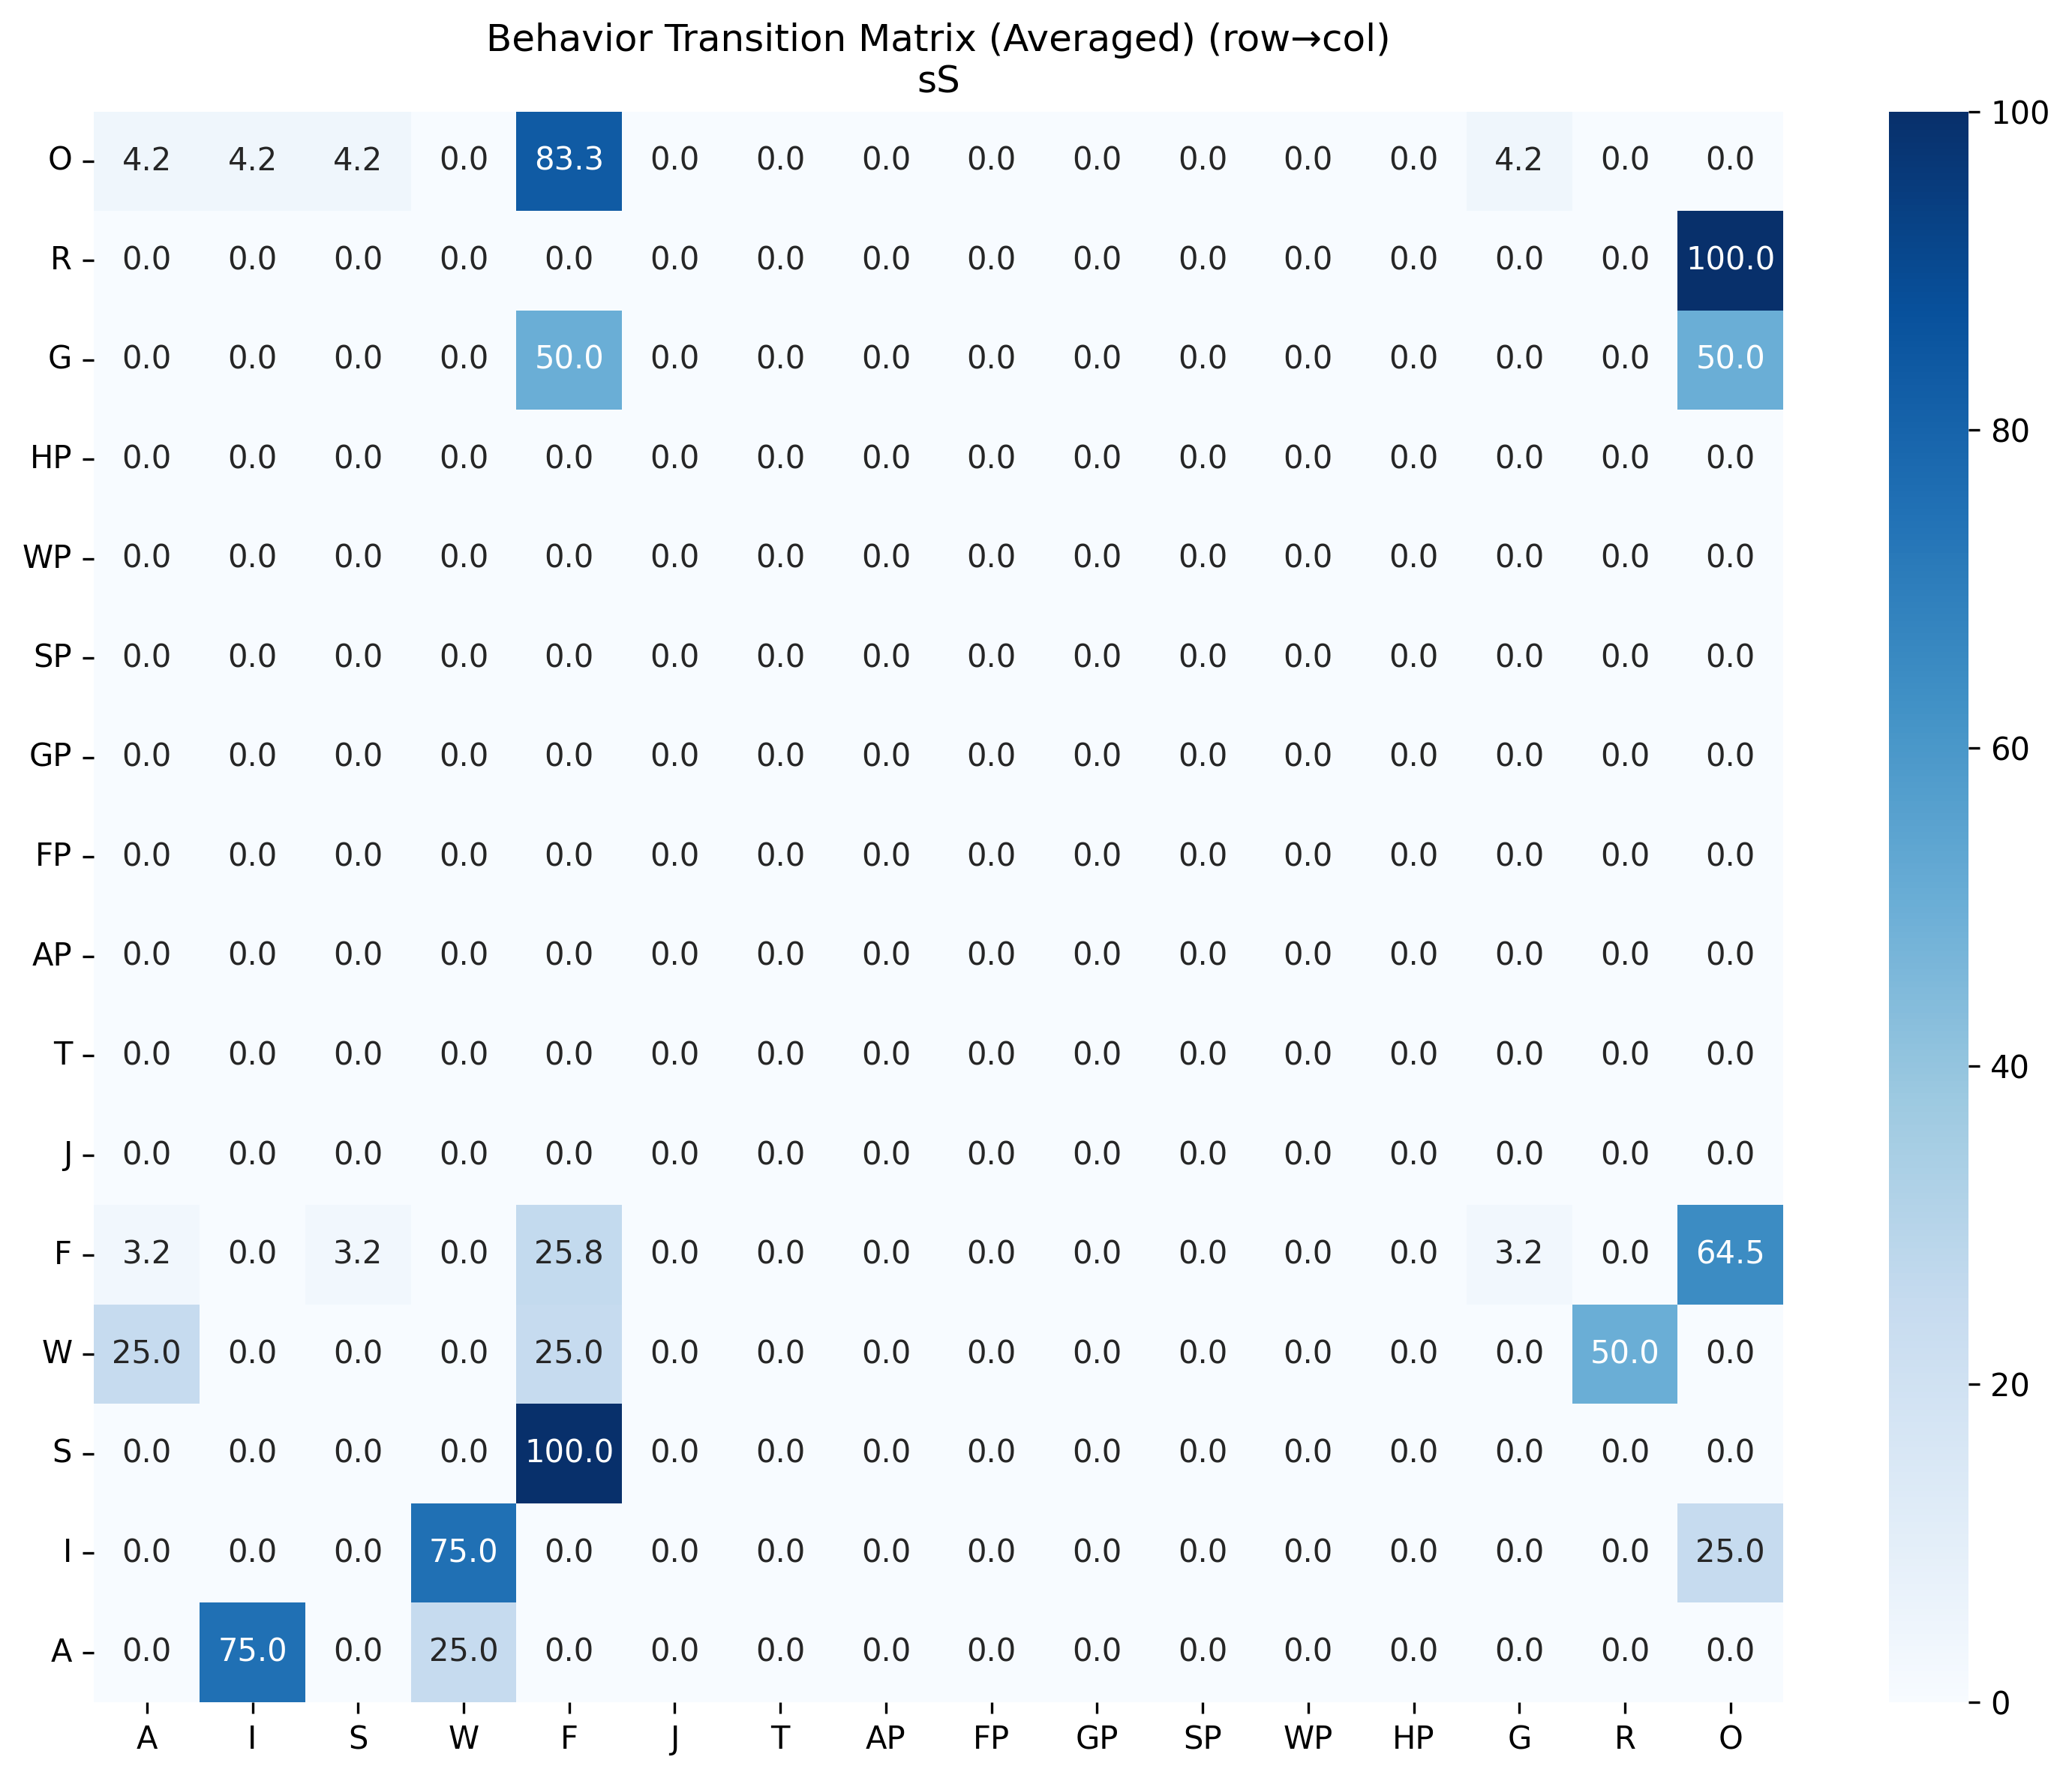

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:590: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


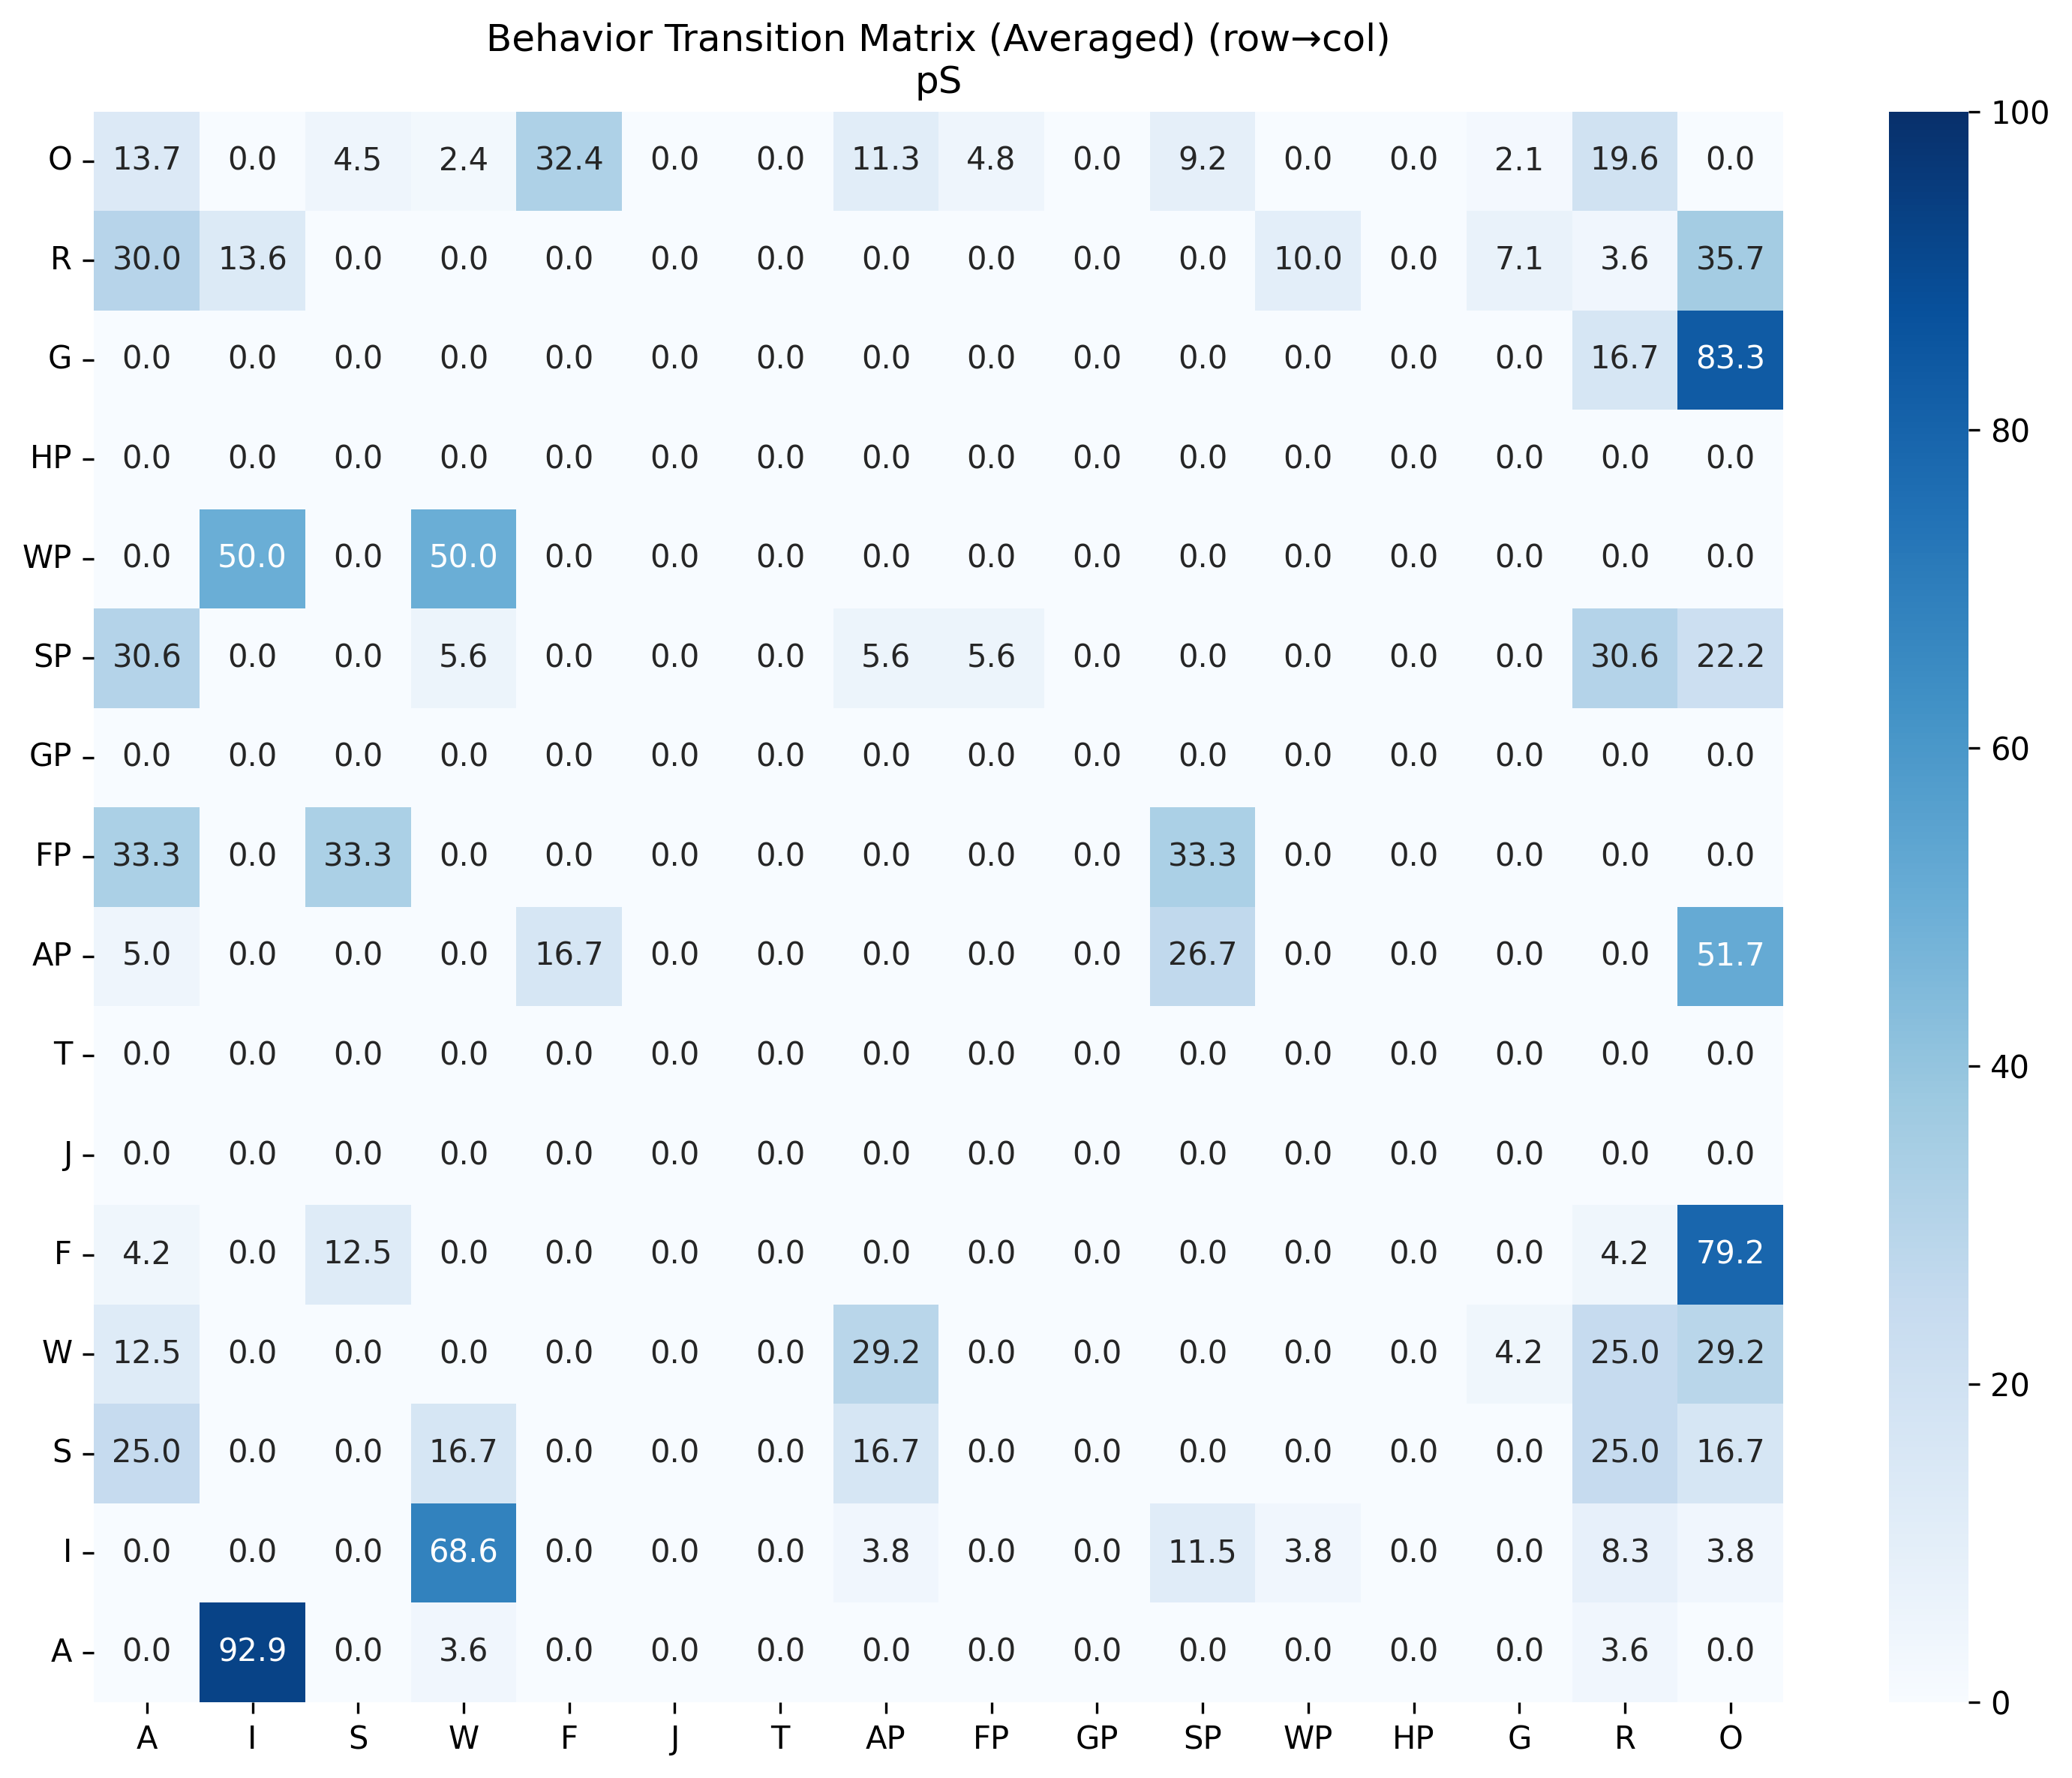

In [14]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_transition_heatmap

ret_bhvr_abbrev_dict = {
    'approachEmRat': 'AER',
    'investigateEmRat': 'IER',
    'withdrawalEmRat': 'WER',
    'approach': 'A',
    'investigation': 'I',
    'stretch': 'S',
    'withdrawal': 'W',
    'freezing': 'F',
    'jumping': 'J',
    'tailrattling': 'T',
    'approachP': 'AP',
    'followP': 'FP',
    'groomP': 'GP',
    'sniffP': 'SP',
    'watchP': 'WP',
    'huddling': 'HP',
    'grooming': 'G',
    'rearing': 'R',
    'gap_state': 'O'
}

matrix_order = [
    'approachEmRat', 'investigateEmRat', 'withdrawalEmRat', 
    'approach', 'investigation', 'stretch', 'withdrawal', 
    'freezing', 'jumping', 'tailrattling', 
    'approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling', 
    'grooming', 'rearing', 'gap_state'
]

heatmap_results = draw_transition_heatmap(
    all_ret_trans_martices_grouped_avg,
    ret_bhvr_abbrev_dict,
    matrix_order=matrix_order,
    threshold=0.0,
    figsize=(10, 8),
    cmap="Blues",
    vmin=0,
    vmax=100,
    title_prefix="Behavior Transition Matrix (Averaged)",
    save_path=None
)

sD: is empty, skipping.


/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:654: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


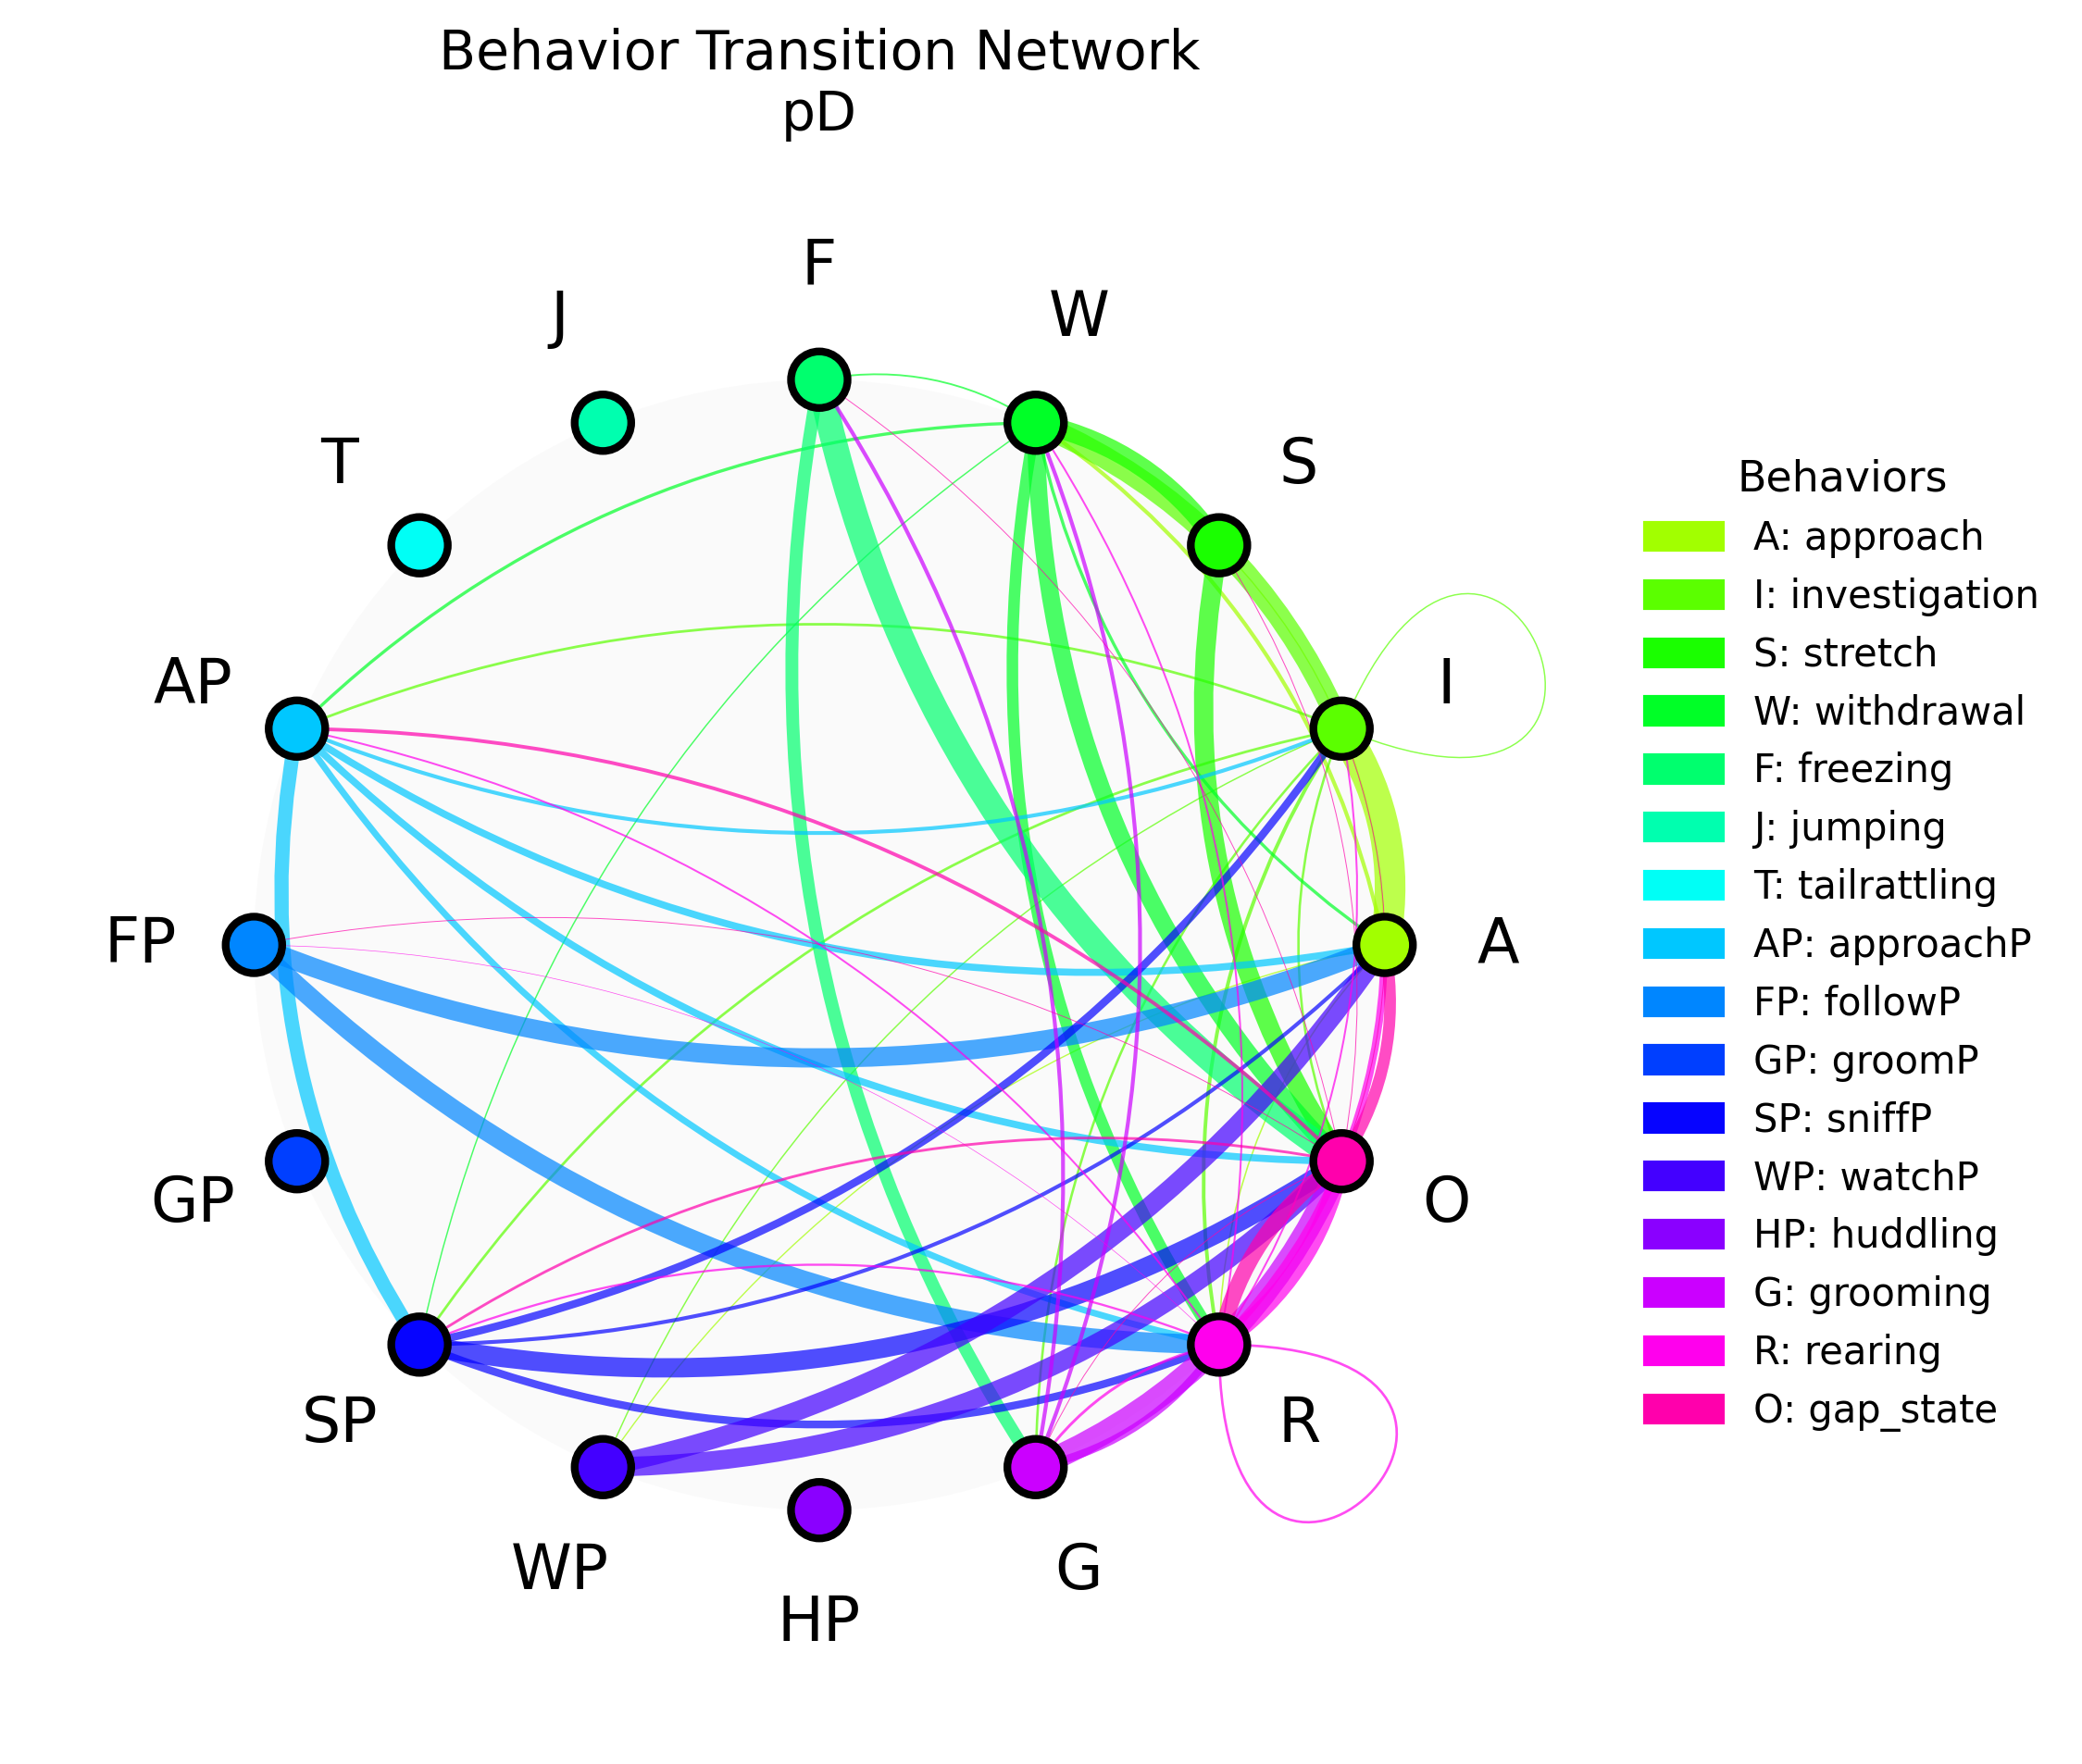

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:654: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


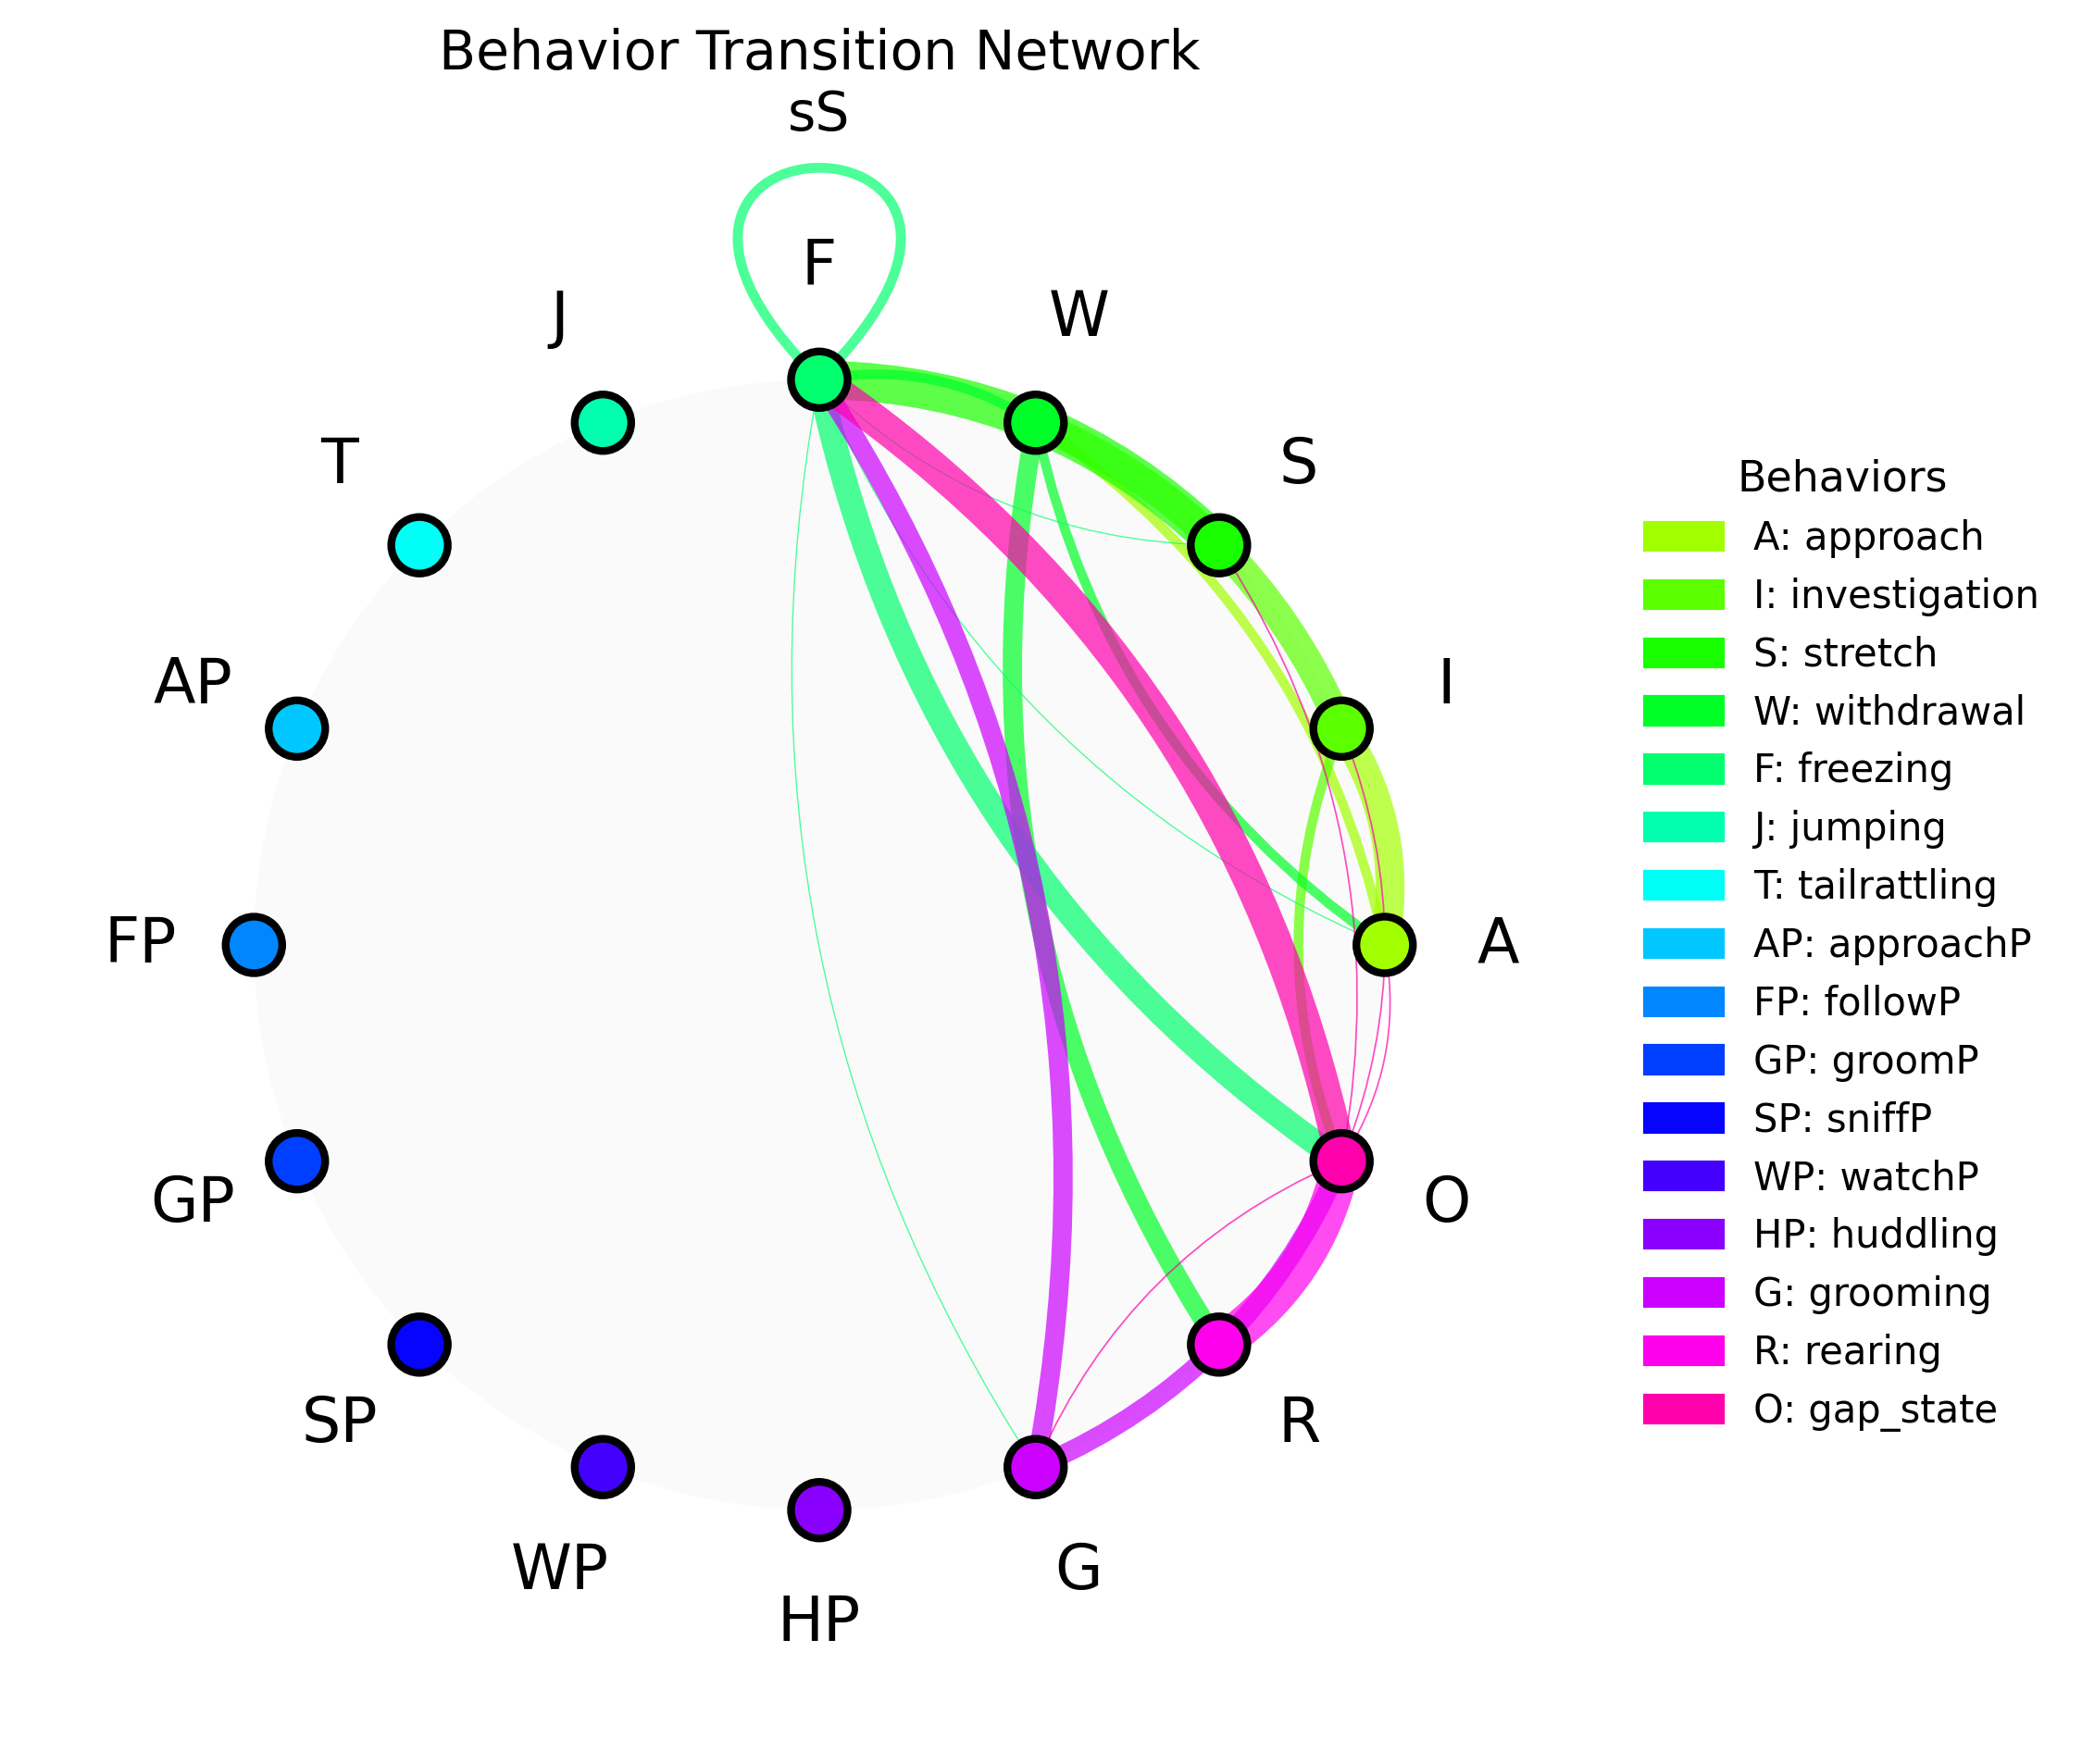

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:654: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged_all = df_merged_rows.groupby(level=0, axis=1, sort=False).sum()


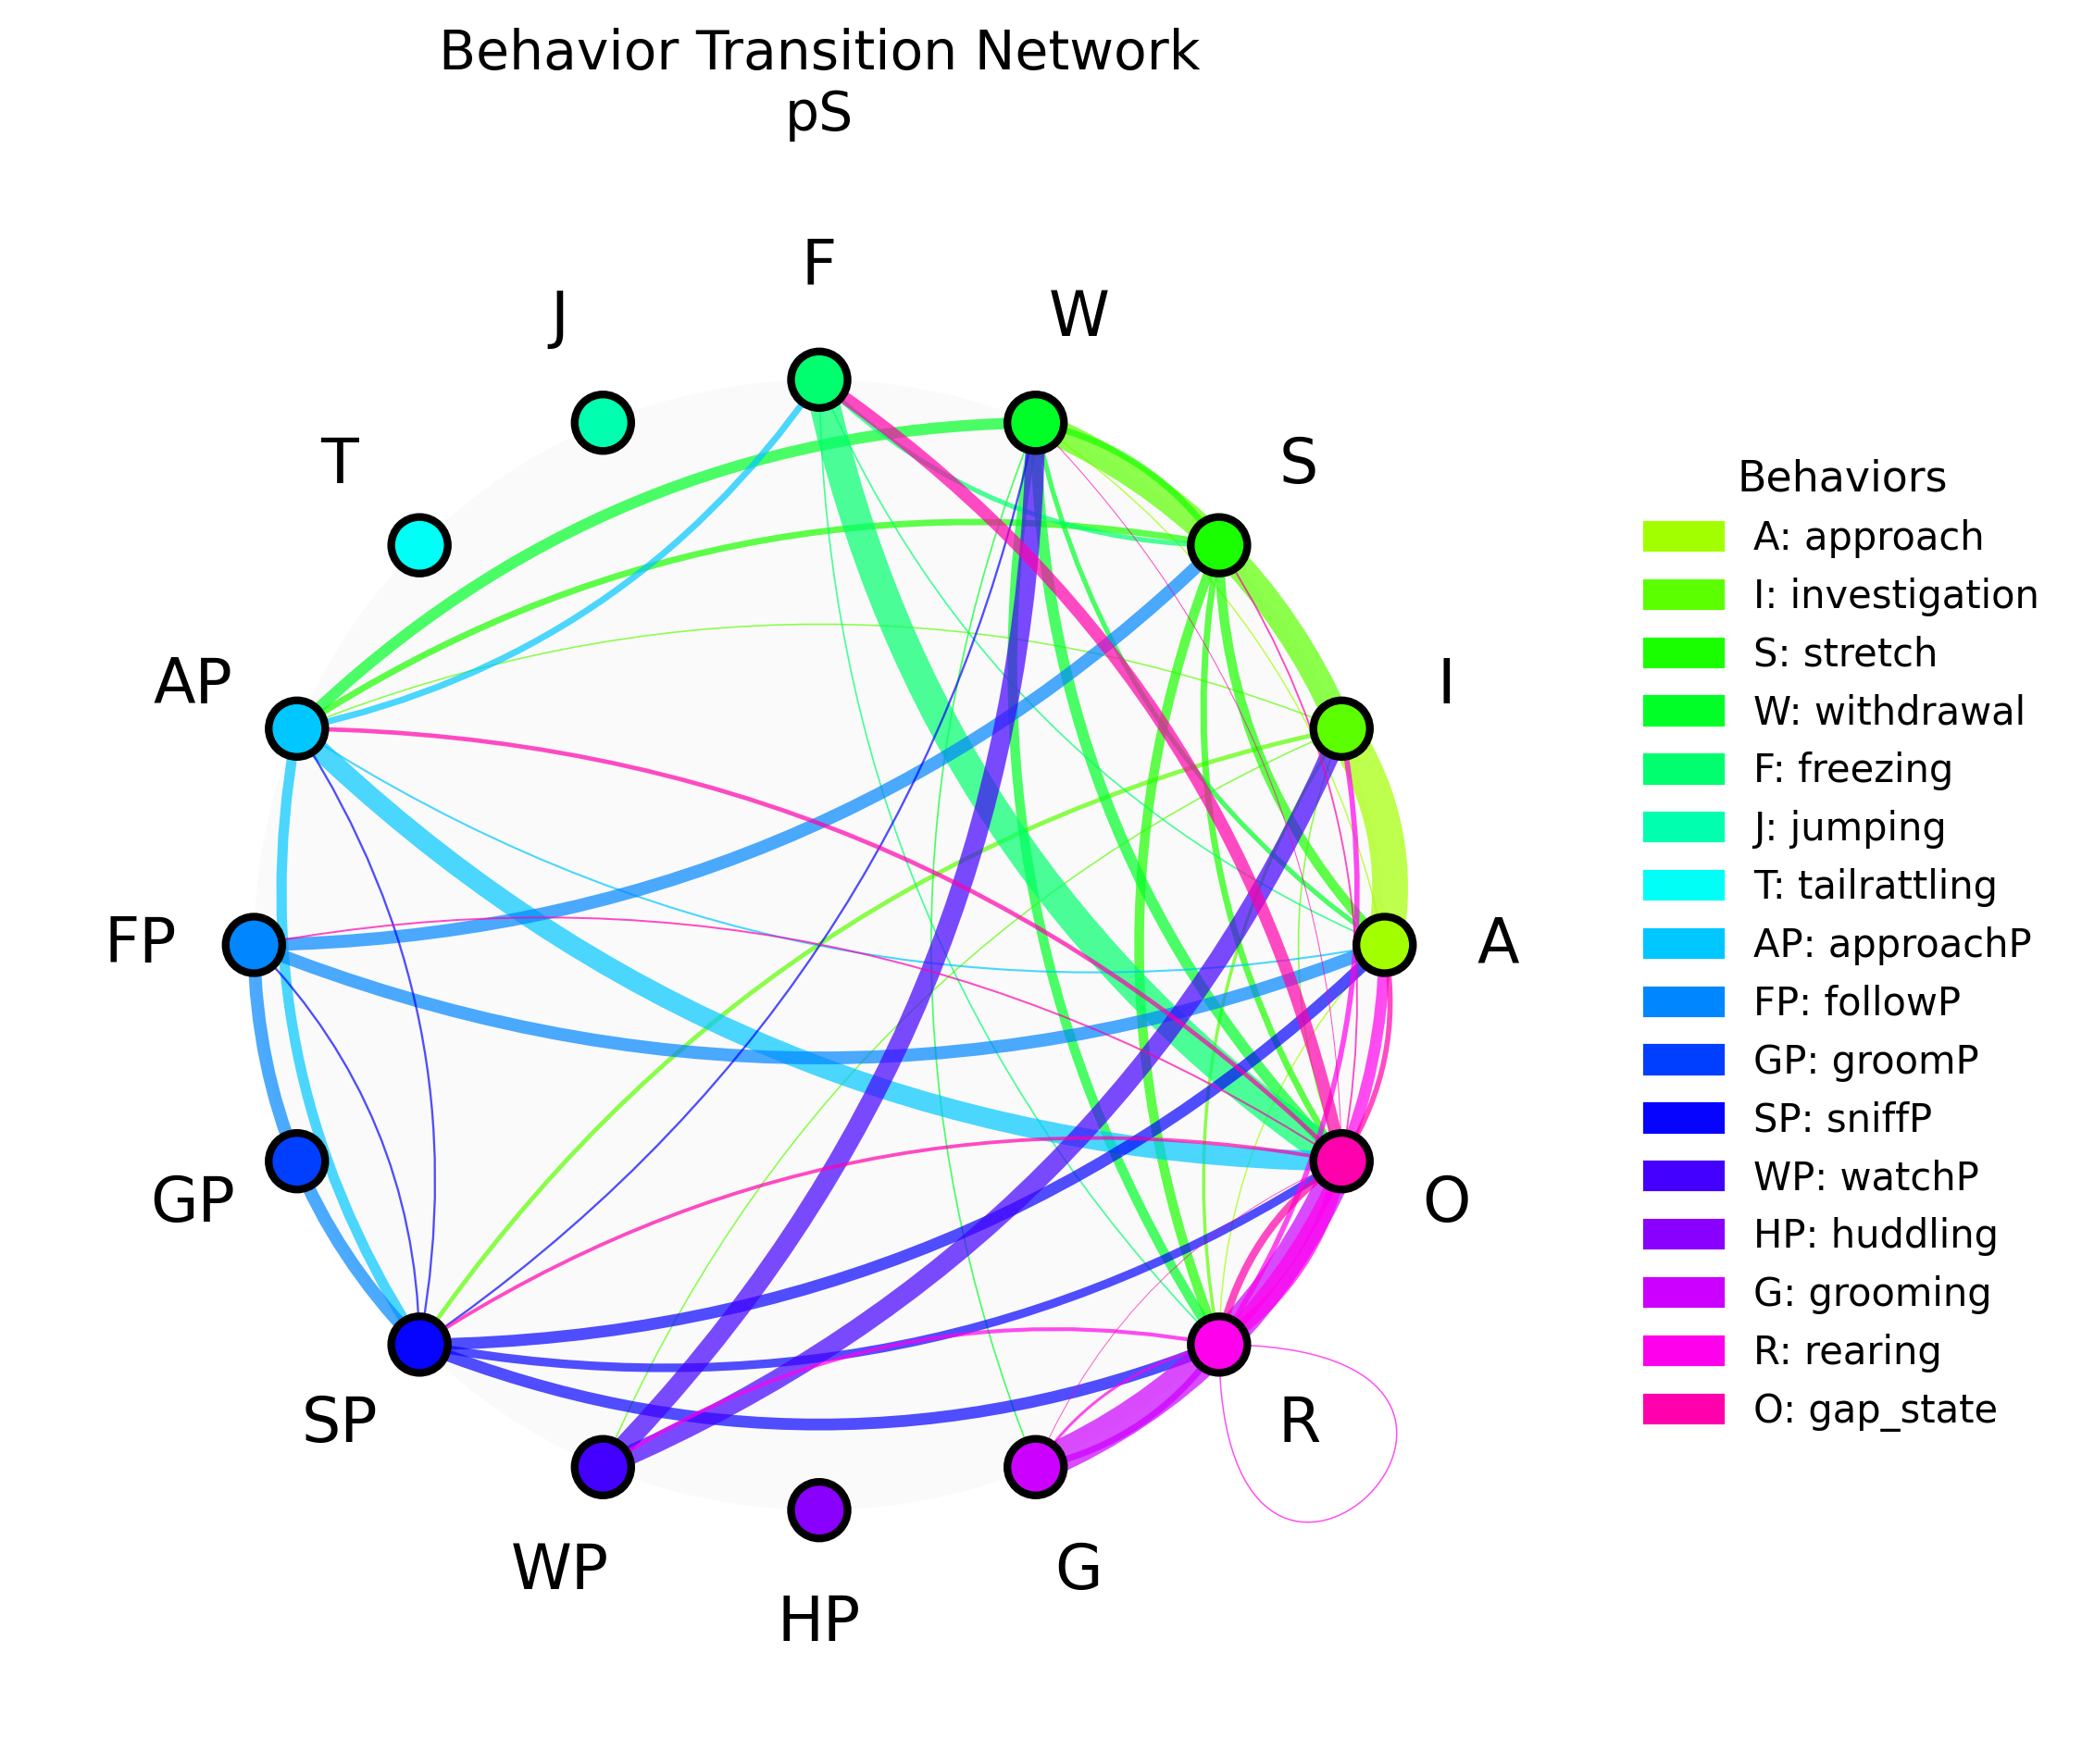

In [15]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_transition_network
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np

abbrevs = list(ret_bhvr_abbrev_dict.values())
vals = np.linspace(0.1, 0.9, len(abbrevs))
cmap = cm.hsv
ret_bhvr_color_dict = {abbr: mcolors.to_hex(cmap(v)) for abbr, v in zip(abbrevs, vals)}

network_results = draw_transition_network(
    all_ret_trans_martices_grouped_avg,
    ret_bhvr_abbrev_dict,
    bhvr_color_dict=ret_bhvr_color_dict,
    matrix_order=matrix_order,
    threshold=0.0,
    figsize=(8, 6),
    node_radius=0.05,
    label_offset=0.20,
    line_width_scale=10,
    title_prefix="Behavior Transition Network",
    show_legend=True,
    save_path=None
)

### 4.4 Draw heatmaps.

In [16]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_heatmap, filter_coordinates_in_time_range, group_heatmap_results

coord_dlc_dict_heatmap = filter_coordinates_in_time_range(coord_dlc_dict, toi_dict)
heatmap_results = calculate_heatmap(coord_dlc_dict_heatmap)
heatmap_results_grouped = group_heatmap_results(heatmap_results)

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataAnalyzer.py:1167: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.stack(stack, axis=0), axis=0)


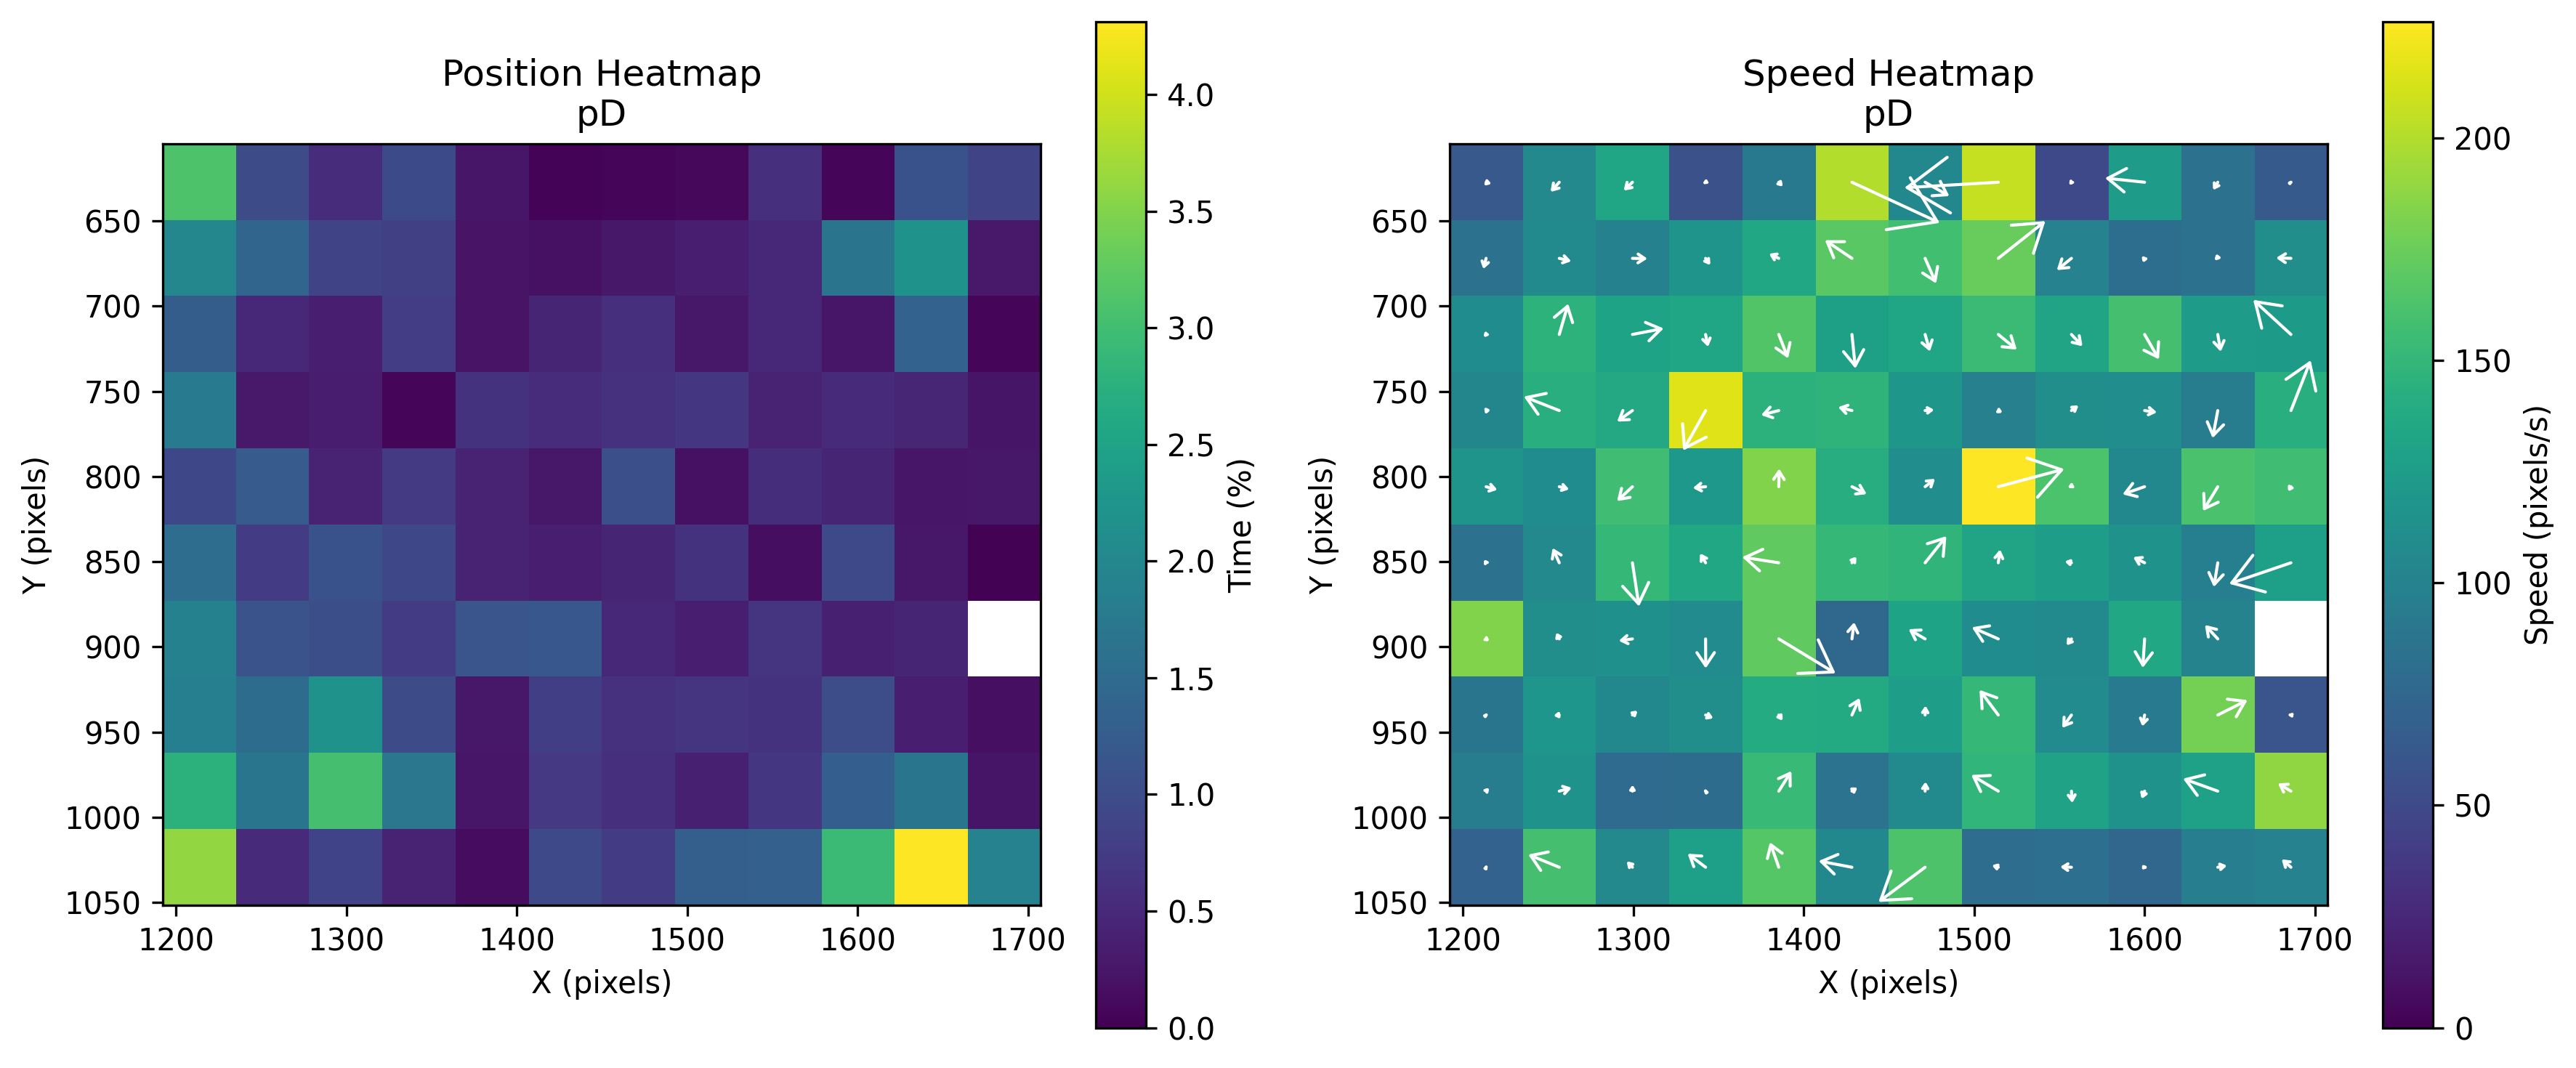

/home/gxj/.conda/envs/gxj/lib/python3.9/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


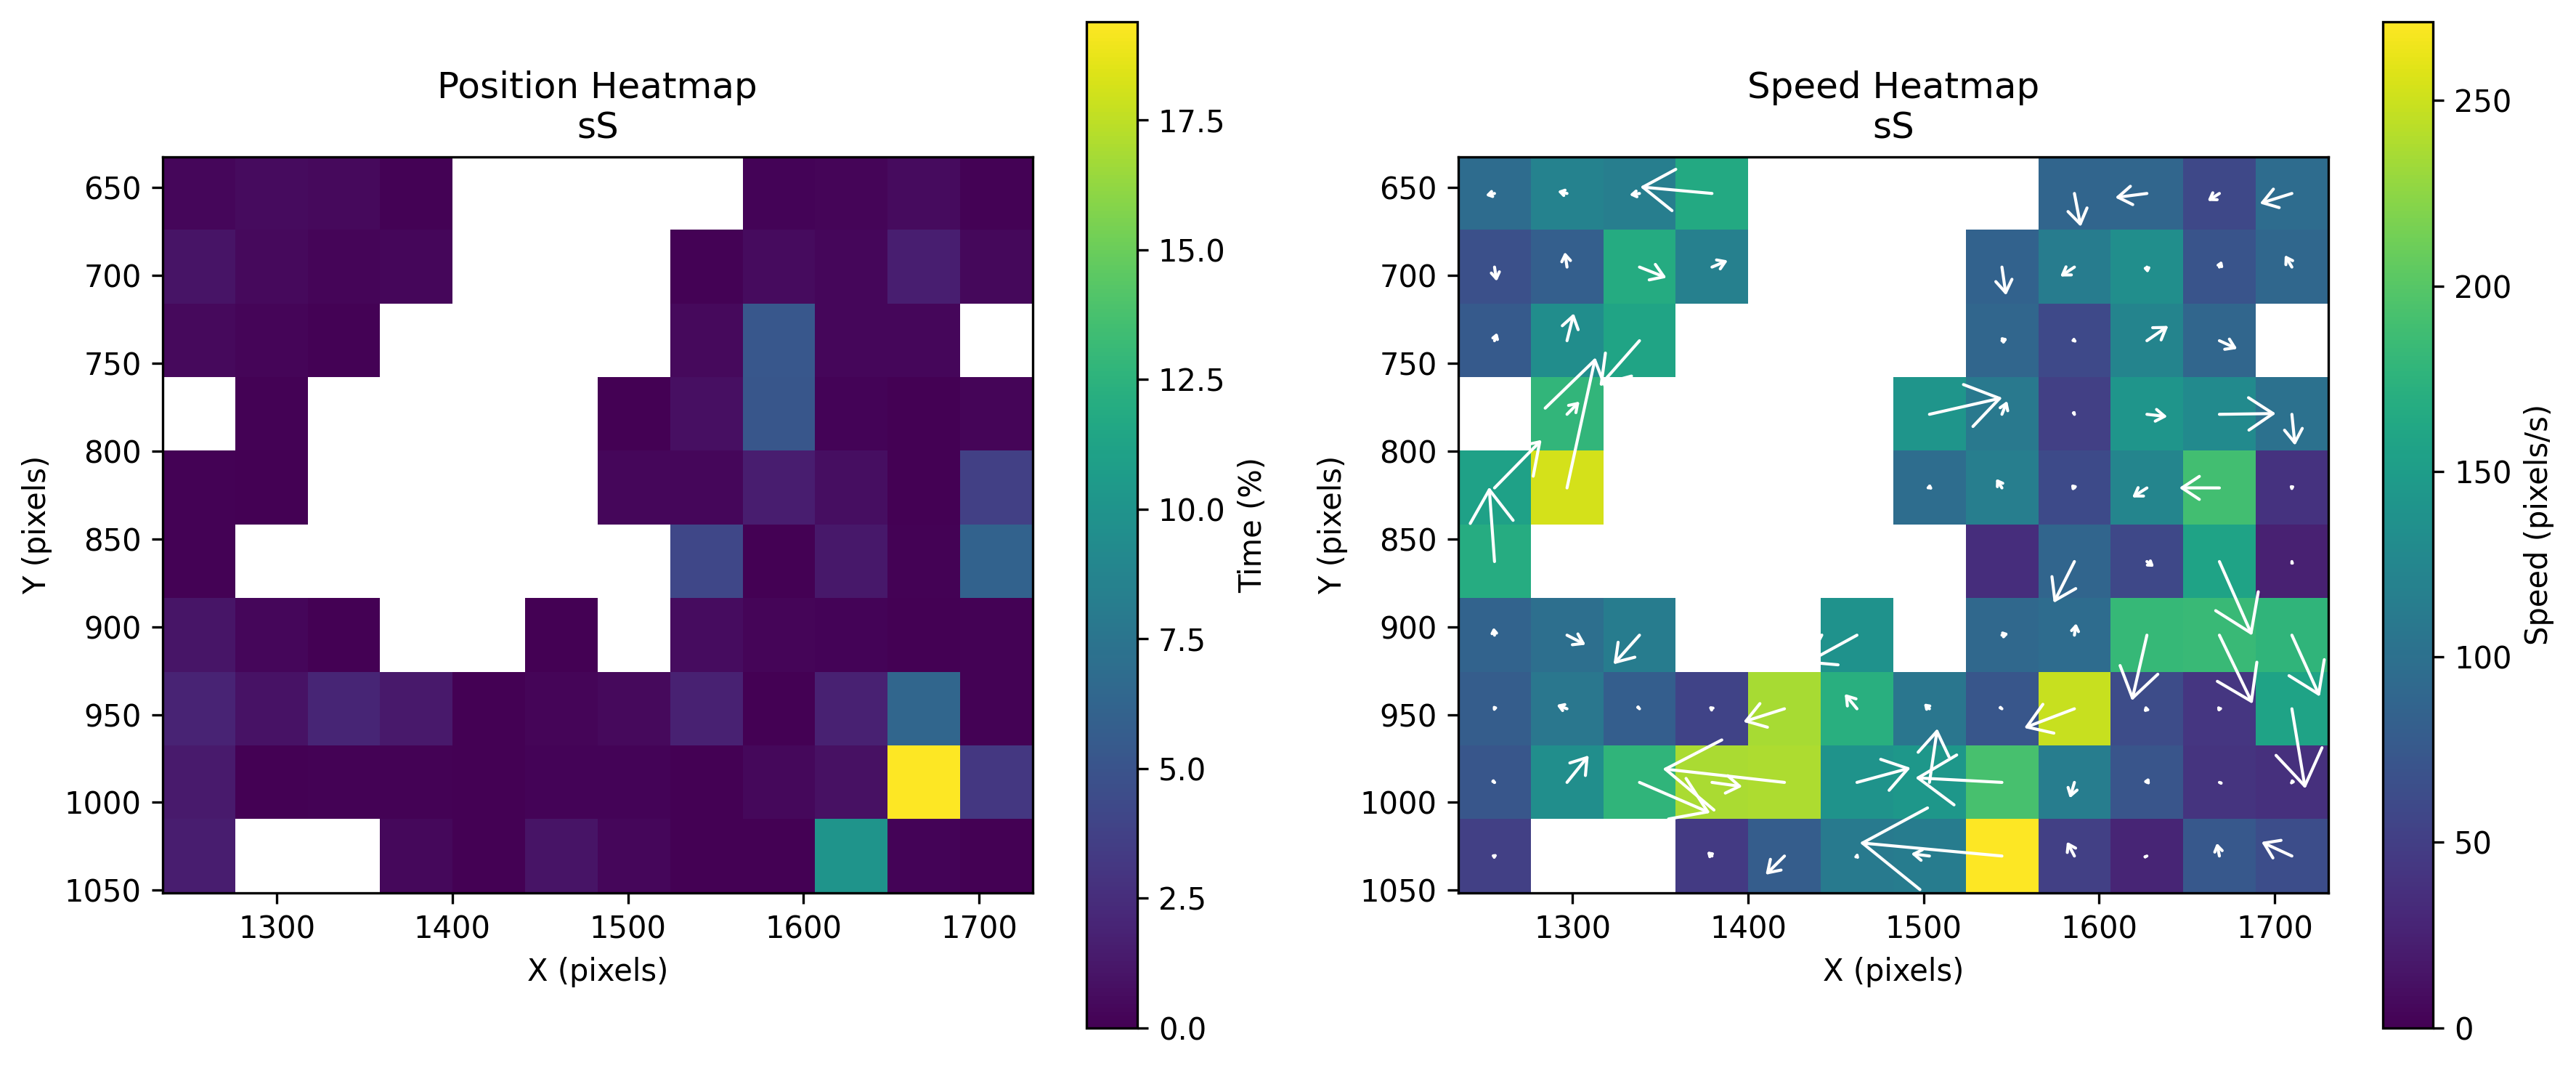

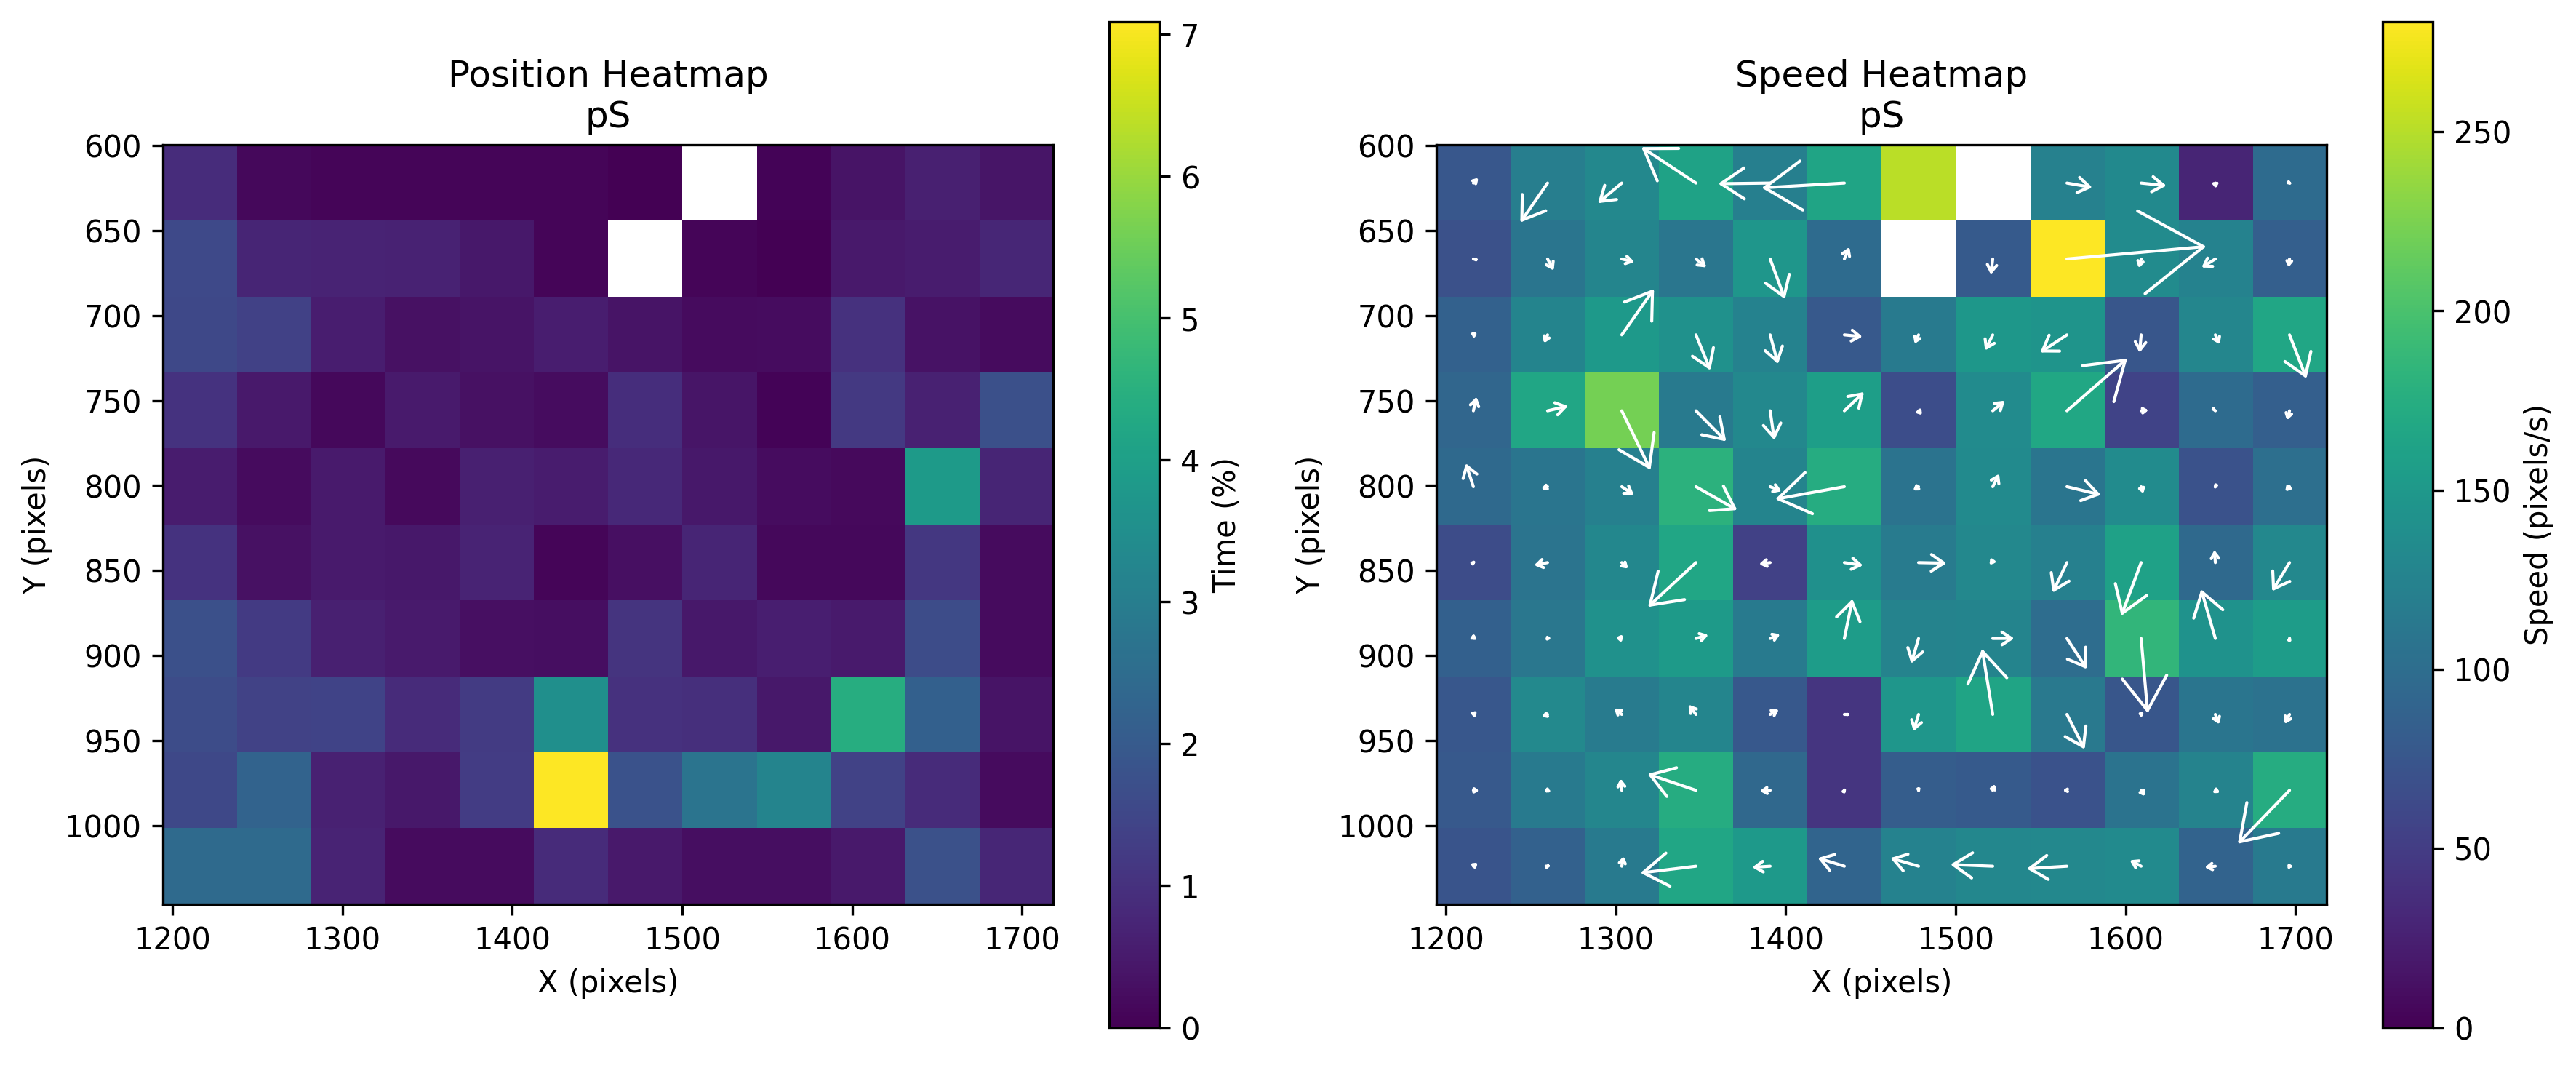

In [17]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_heatmap

draw_heatmap(heatmap_results_grouped)

### 4.5 Behavior decision.

In [18]:
from analyze_data_ret_zj_utils.DataAnalyzer import filter_behavior_in_time_range, group_data_by_sess_id, calculate_grouped_behavior_time_from_series

group_bhvr_dict = {
    'ActDef': ['approach', 'investigation', 'stretch', 'withdrawal'],
    'PsvDef': ['freezing', 'jumping', 'tailrattling'],
    'Soc': ['approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling'],
    'Sol': ['grooming', 'rearing'],
    'Nan': []
    }
bhvr_series_dict_dec = filter_behavior_in_time_range(bhvr_series_dict, toi_dict)
bhvr_series_dict_dec_grouped = group_data_by_sess_id(bhvr_series_dict_dec)
frame_dict, time_dict, pct_dict = calculate_grouped_behavior_time_from_series(
    bhvr_series_dict_dec_grouped,
    group_bhvr_dict
    )
bhvr_dec = pct_dict


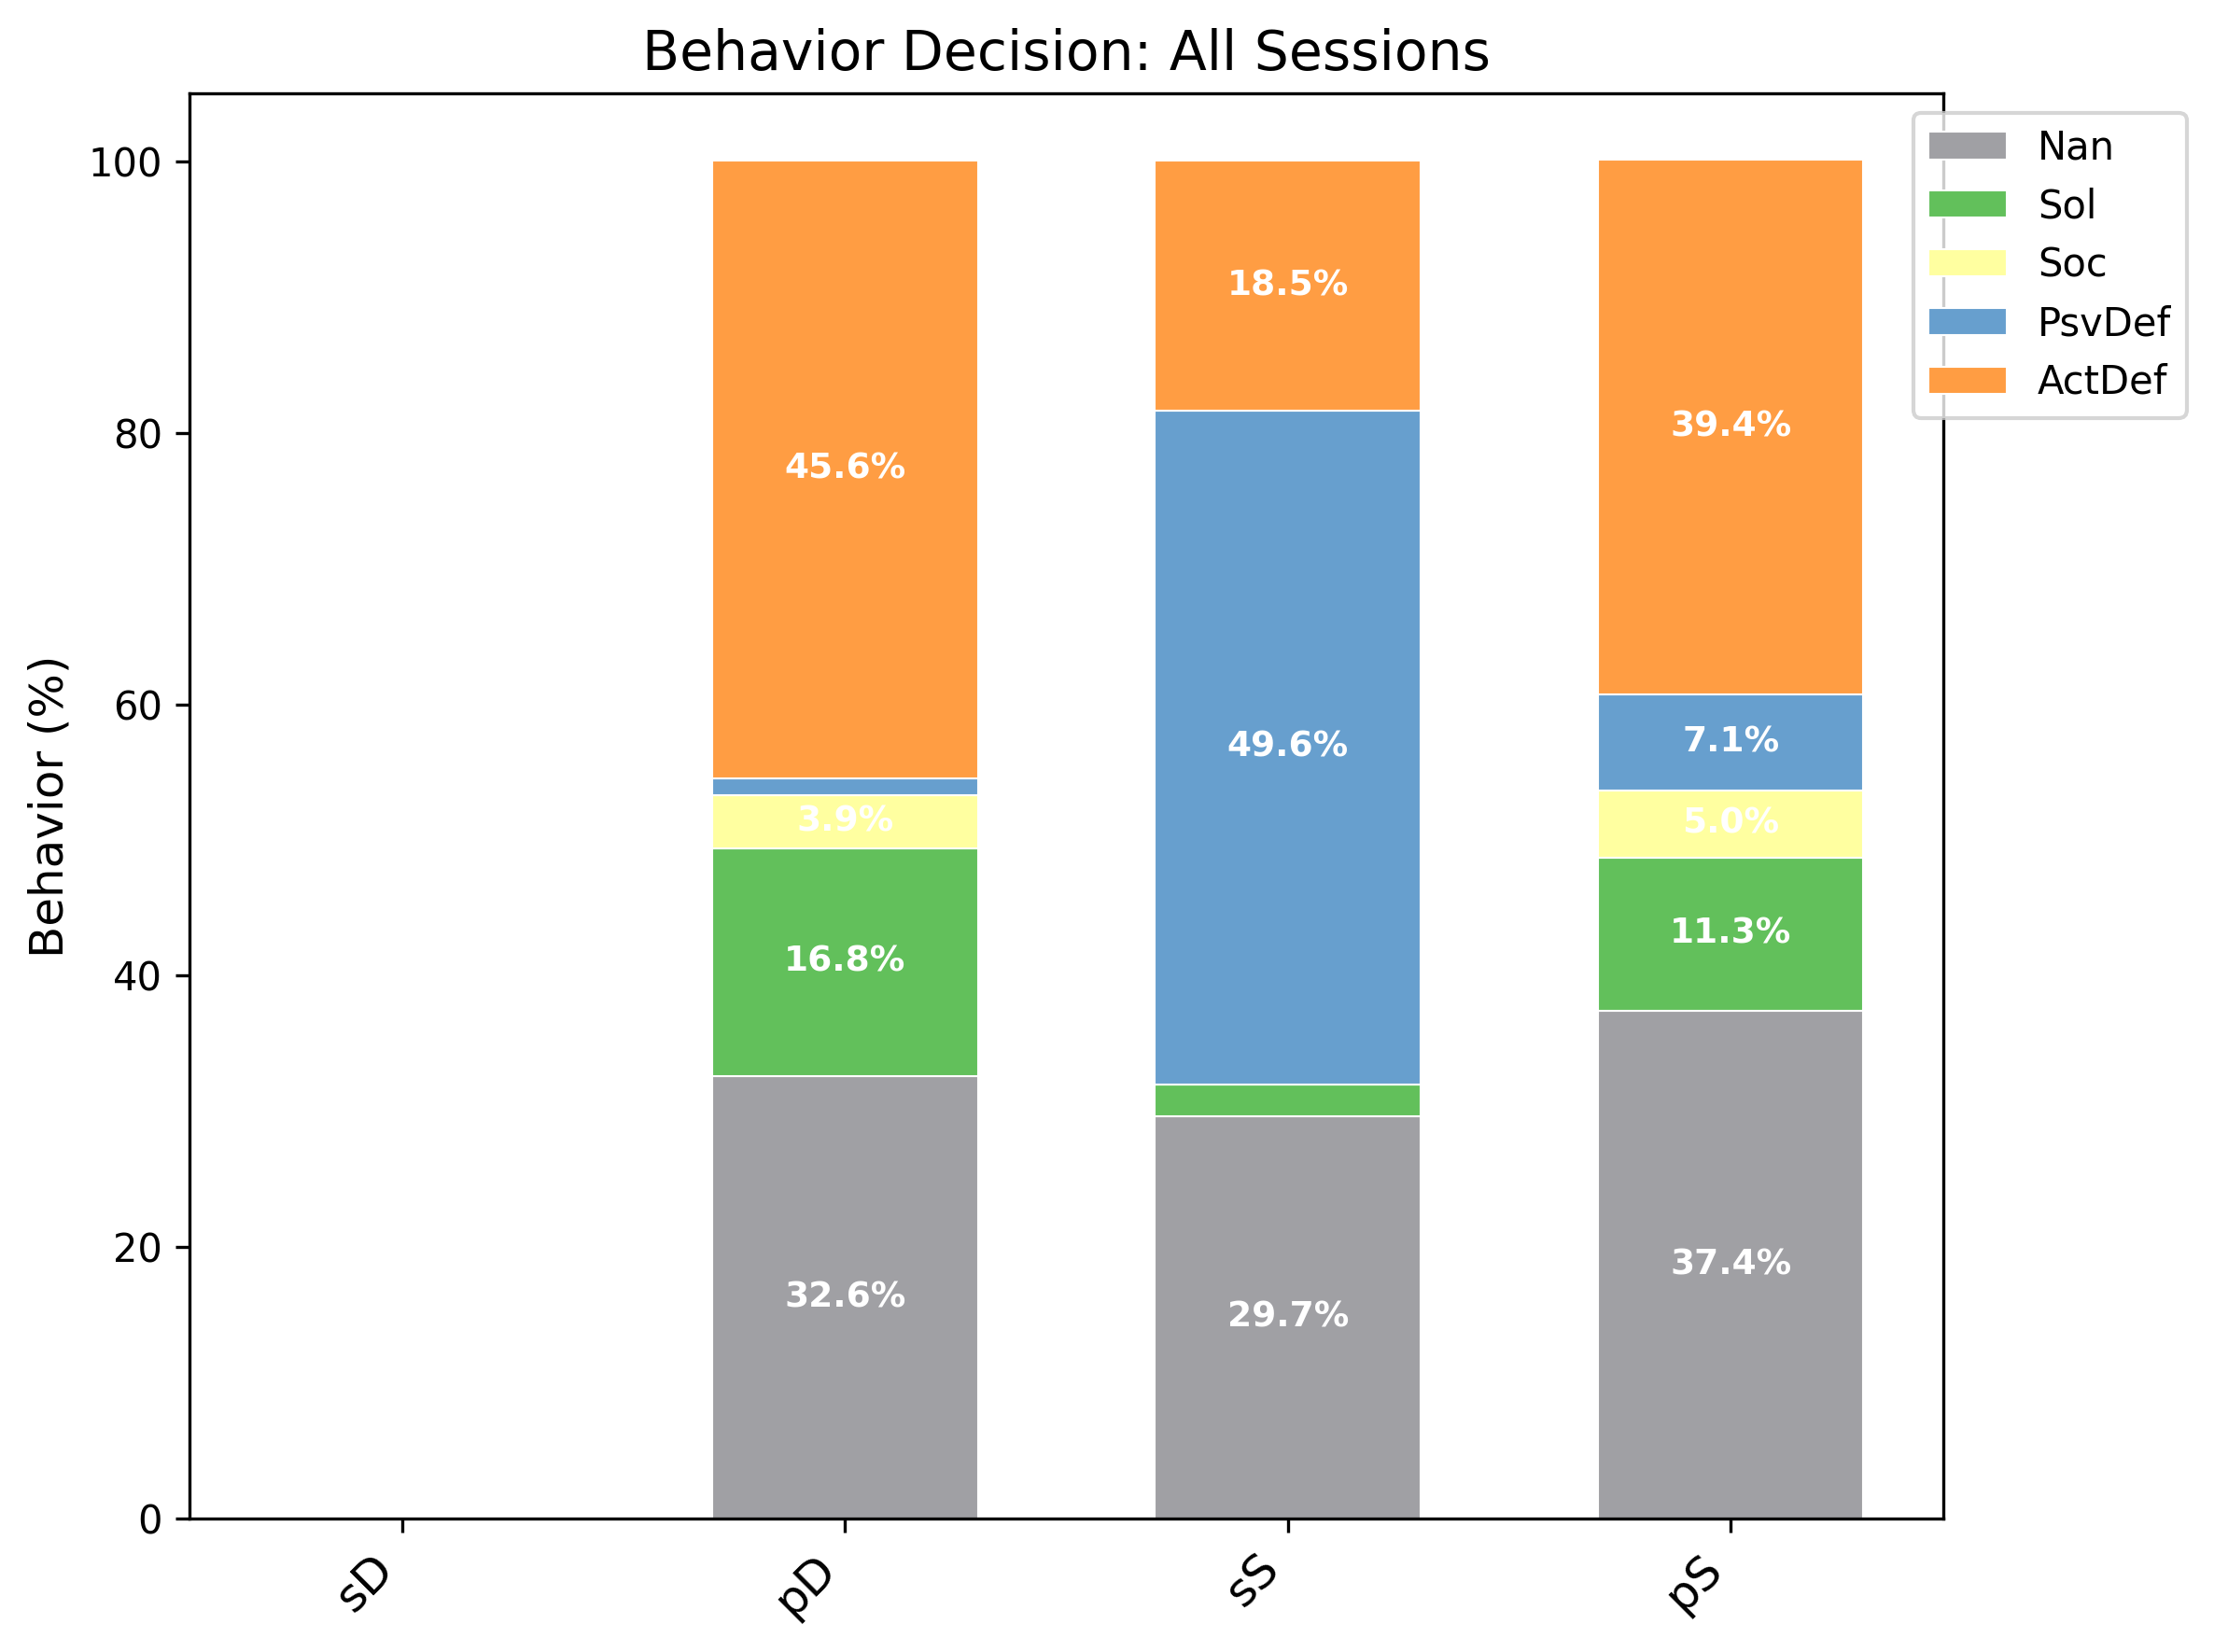

In [19]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_stacked_bar_plot

dec_color_dict = {
    'ActDef': '#ff9d43',
    'PsvDef': '#679fce',
    'Soc': '#ffffa0',
    'Sol': '#62c05b',
    'Nan': '#a0a0a4',
}
draw_stacked_bar_plot(
    pct_dict,
    category_order=['Nan', 'Sol', 'Soc', 'PsvDef', 'ActDef'],
    color_dict=dec_color_dict,
    title='Behavior Decision: All Sessions',
    ylabel='Behavior (%)',
)

### 4.6 Passive defense.

#### 4.6.1 Draw all passive defense time.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


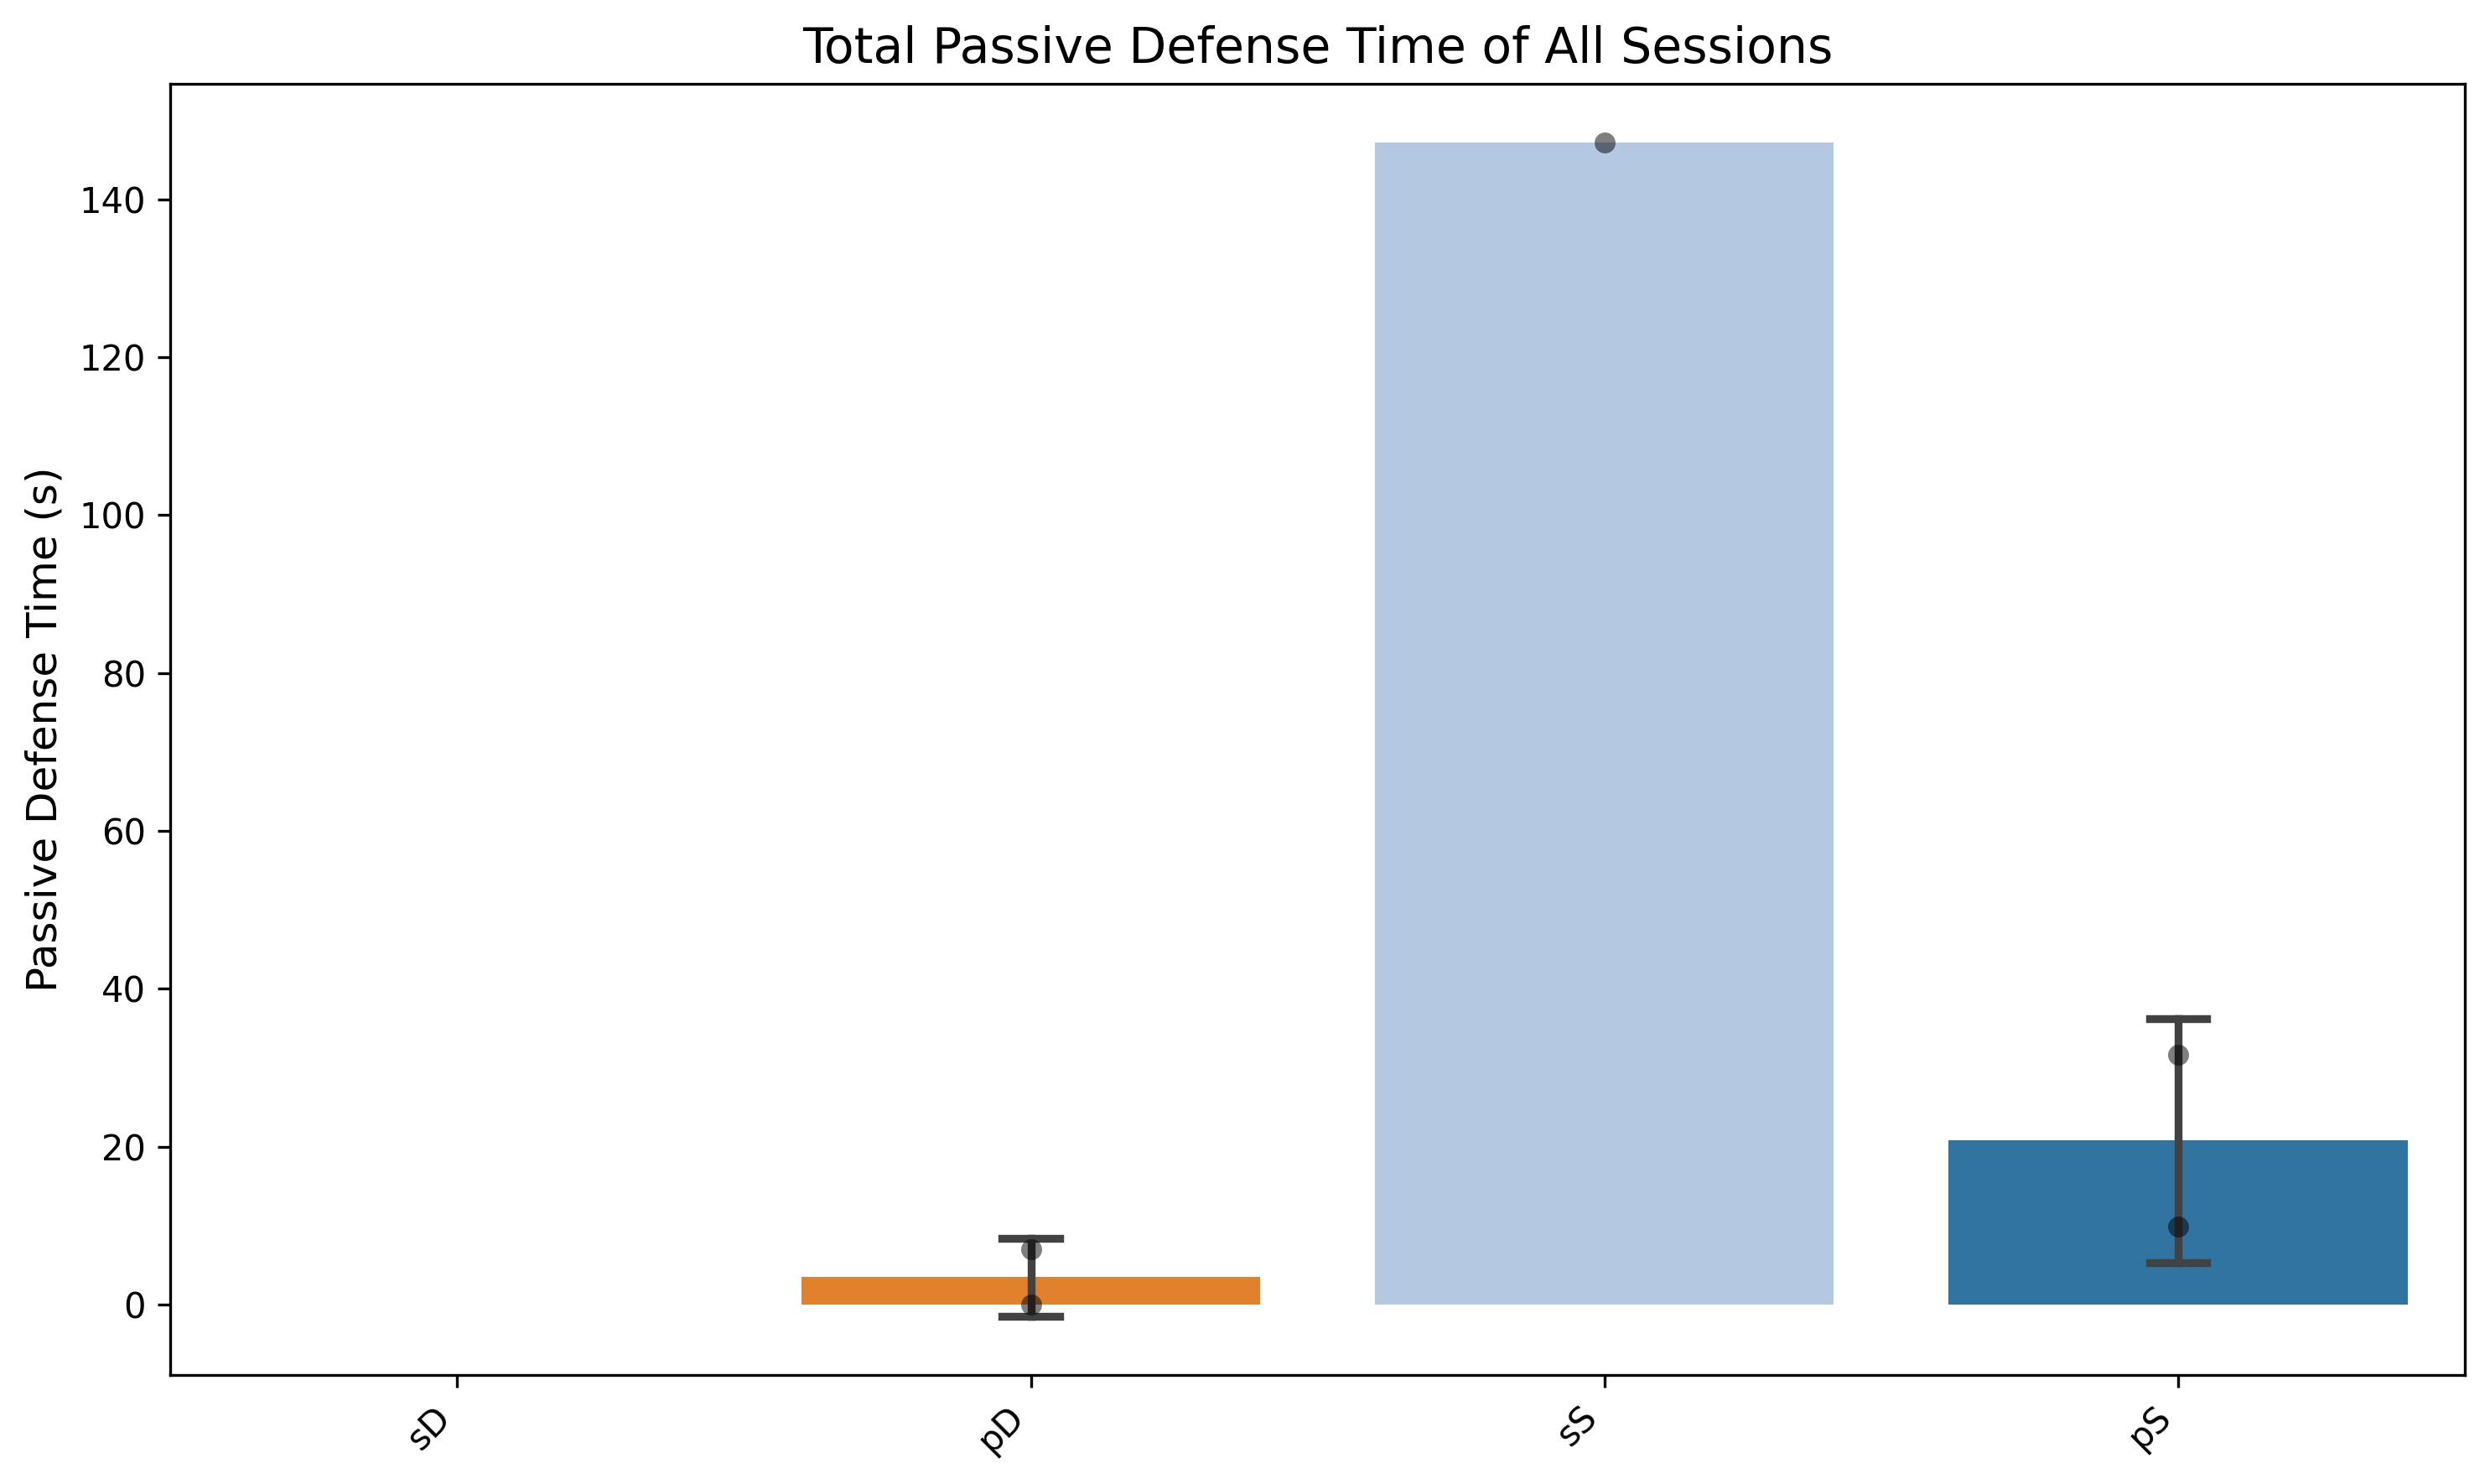

In [20]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    merge_filtered_behaviors, 
    calculate_total_time, 
    calculate_all_time, 
    flatten_bhvr_tuples, 
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

PsvDef_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['freezing', 'tailrattling', 'jumping']
    )

PsvDef_data_merged = merge_filtered_behaviors(PsvDef_data, merged_name='PsvDef')
total_PsvDef_time = calculate_total_time(PsvDef_data_merged)

all_PsvDef_times = calculate_all_time(PsvDef_data_merged)

total_PsvDef_time_grouped = group_data_by_sess_id(total_PsvDef_time)
total_PsvDef_time_grouped_flat = flatten_bhvr_tuples(total_PsvDef_time_grouped)

all_PsvActDef_times_df = flatten_to_dataframe(total_PsvDef_time_grouped_flat, value_column='time_sec')
draw_bar_plot(
    total_PsvDef_time_grouped_flat,
    ylabel='Passive Defense Time (s)',
    title='Total Passive Defense Time of All Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

#### 4.6.2 Draw Passive defense distribution.

In [21]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    merge_filtered_behaviors,
    sync_start_time,
    )
from analyze_data_ret_zj_utils.DataLoader import convert_bhvr_tuples2series

PsvDef_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['freezing', 'tailrattling', 'jumping']
    )

PsvDef_data_merged = merge_filtered_behaviors(PsvDef_data, merged_name='PsvDef')
PsvDef_data_synced = sync_start_time(PsvDef_data_merged, toi_dict)

In [22]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_behavior_pct_by_time_bins, group_bhvr_pct_by_time_bins

time_bins = [(0, 1200), (1200, 2400), (2400, 3600), (3600, 4800), (4800, 6000)]
PsvDef_pct_by_time_bins, key_labels = calculate_behavior_pct_by_time_bins(
    PsvDef_data_synced, 
    time_bins)
PsvDef_pct_by_time_bins_grouped = group_bhvr_pct_by_time_bins(PsvDef_pct_by_time_bins)

/home/gxj/.conda/envs/gxj/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


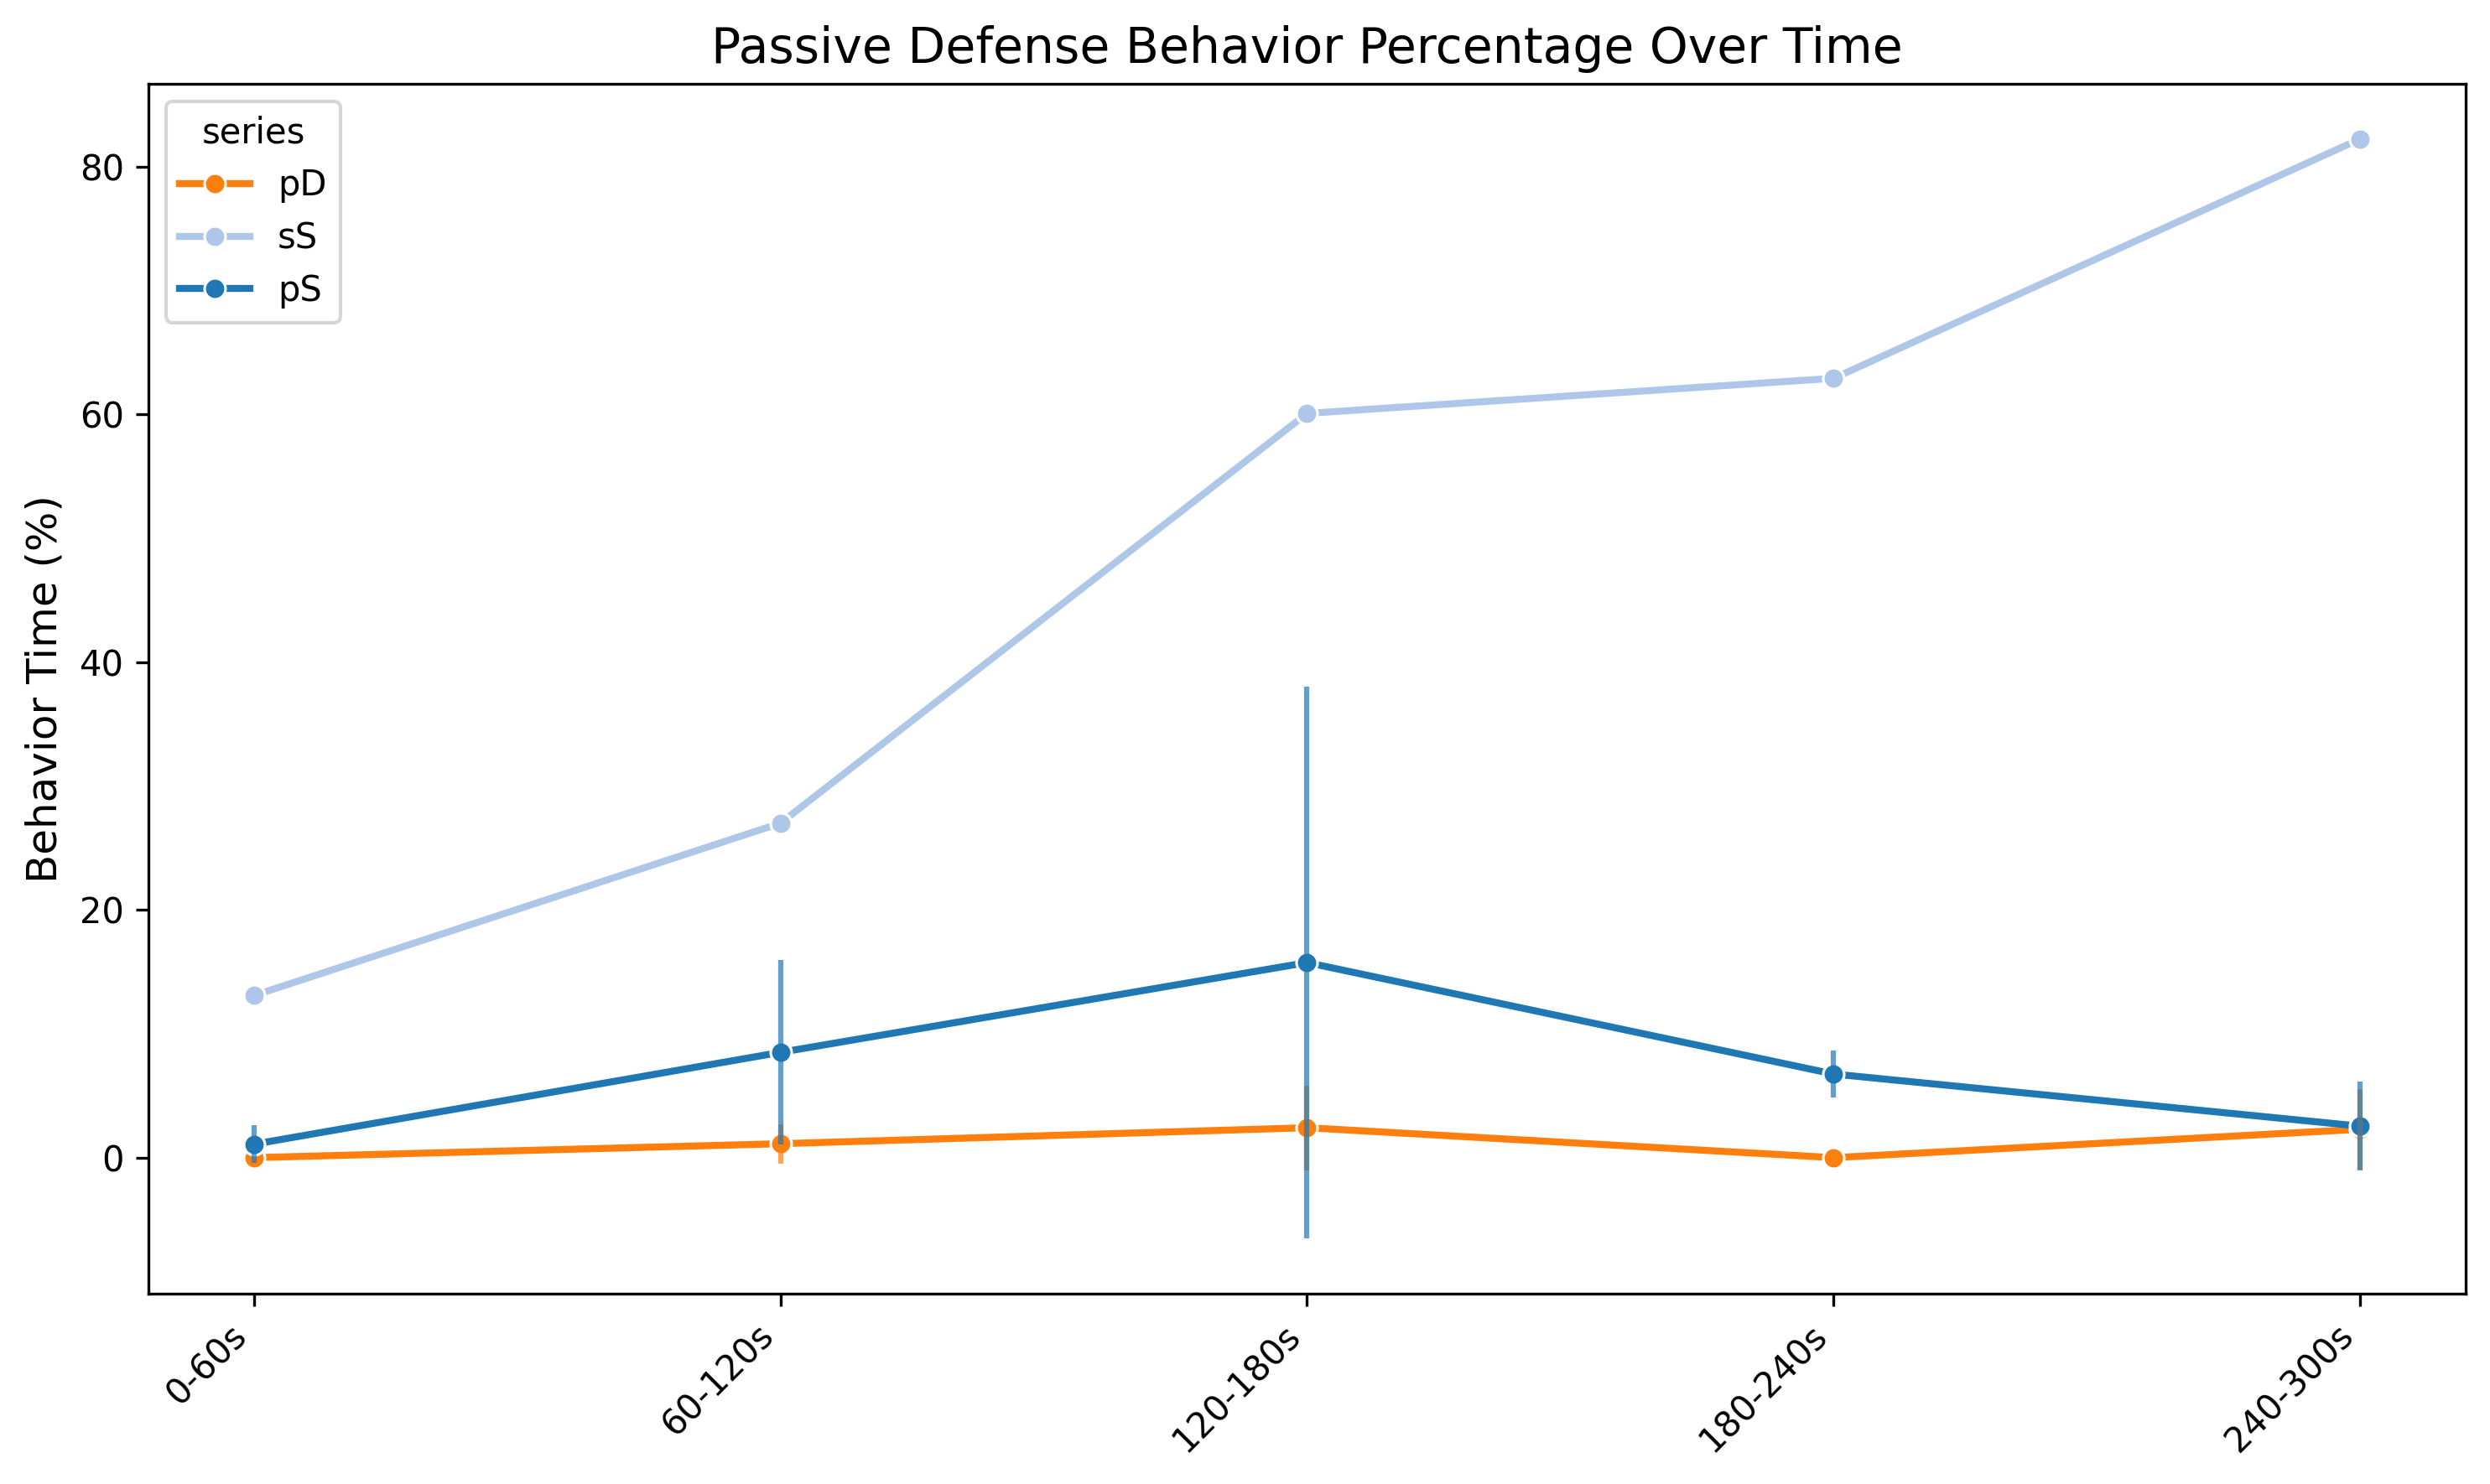

In [23]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_line_plot

draw_line_plot(
    PsvDef_pct_by_time_bins_grouped,
    ylabel='Behavior Time (%)',
    title='Passive Defense Behavior Percentage Over Time',
    xticks=key_labels,
    color_dict=group_color_dict, 
)

#### 4.6.3 Draw all and total freezing time.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


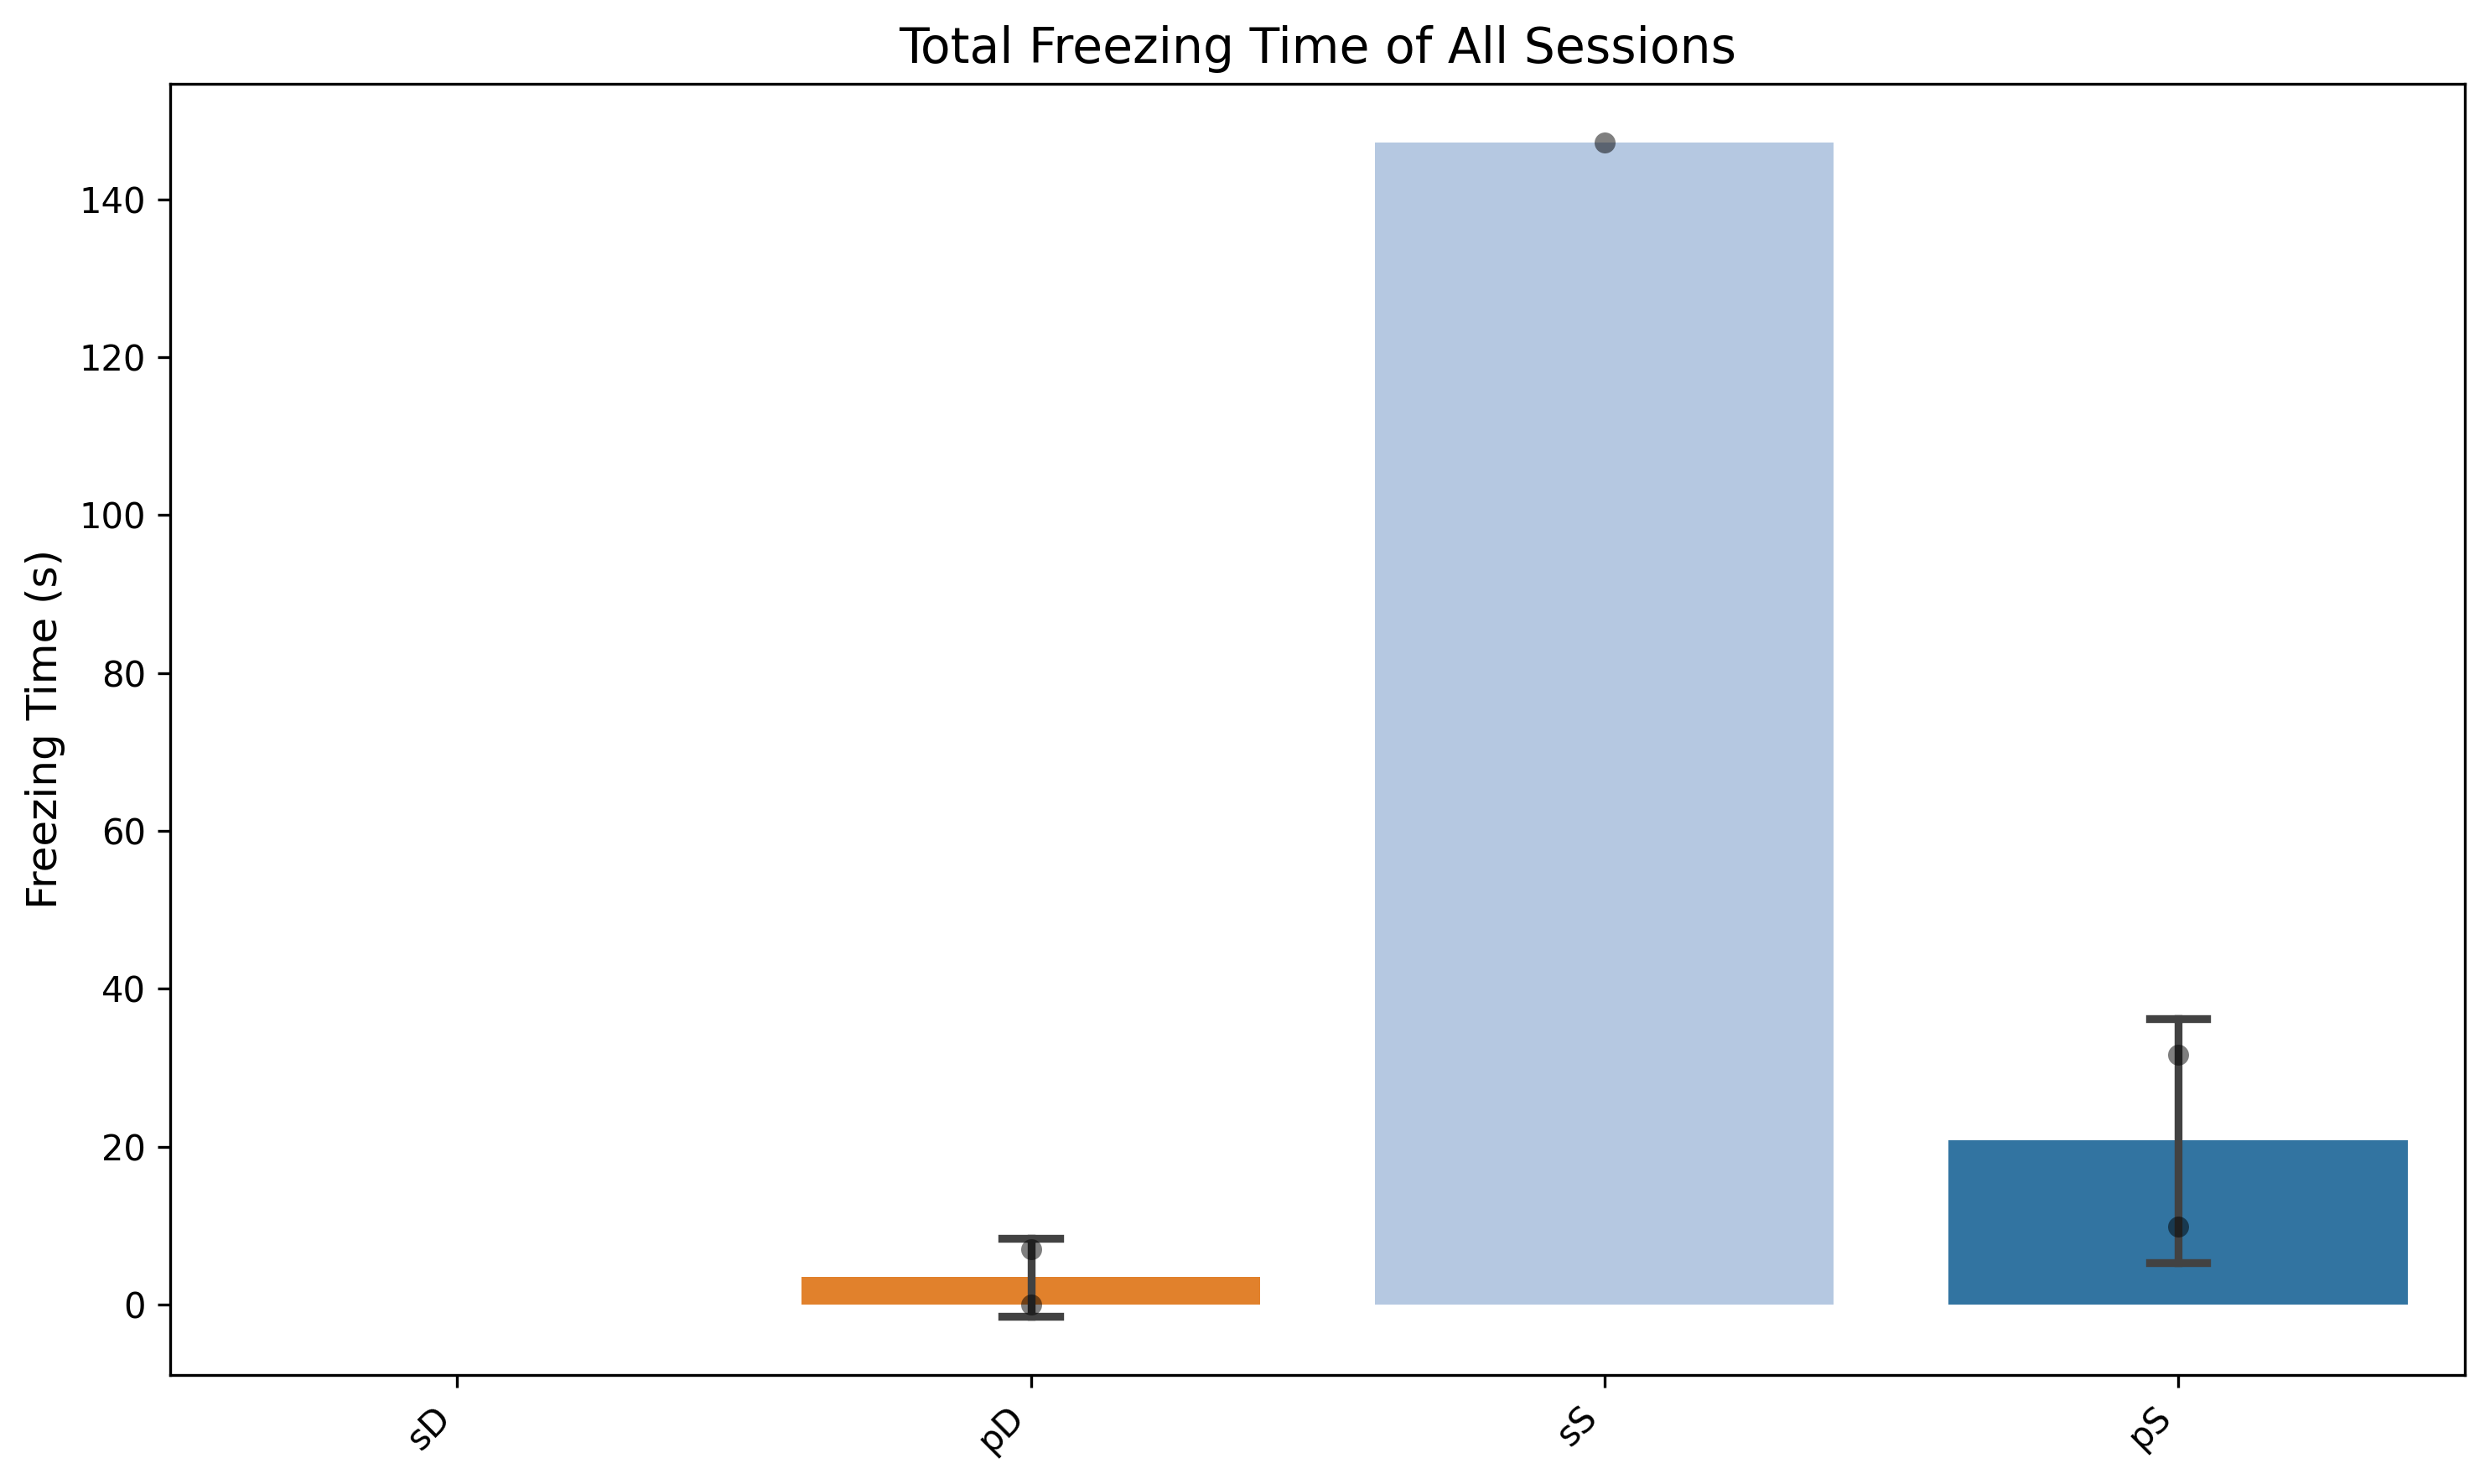

In [24]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    calculate_total_time, 
    calculate_all_time, 
    flatten_bhvr_tuples, 
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

freezing_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list='freezing'
    )

total_freezing_time = calculate_total_time(
    freezing_data
    )

all_freezing_times = calculate_all_time(
    freezing_data
    )

total_freezing_time_grouped = group_data_by_sess_id(total_freezing_time)
total_freezing_time_grouped_flat = flatten_bhvr_tuples(total_freezing_time_grouped)

all_freezing_times_df = flatten_to_dataframe(total_freezing_time_grouped_flat, value_column='time_sec')

draw_bar_plot(
    total_freezing_time_grouped_flat,
    ylabel='Freezing Time (s)',
    title='Total Freezing Time of All Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

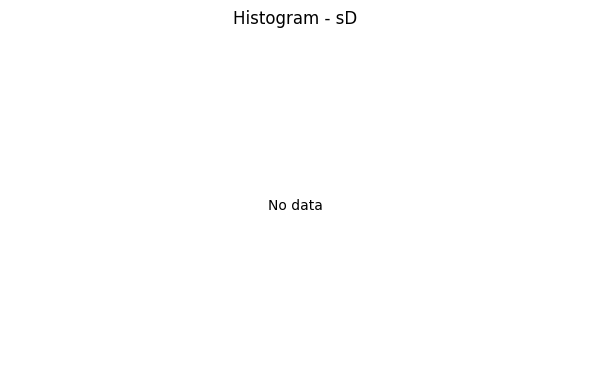

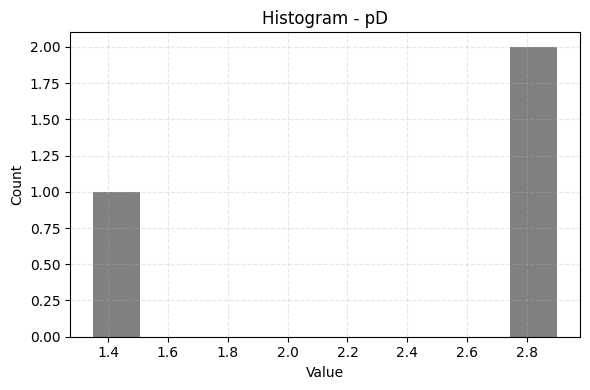

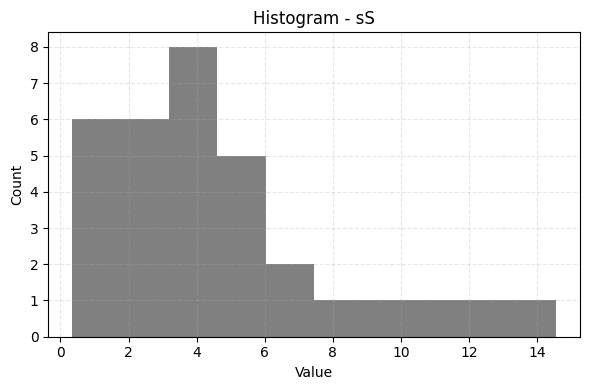

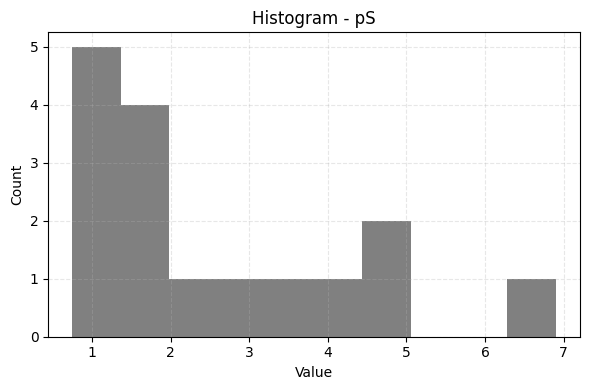

In [25]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    calculate_all_time, 
    flatten_bhvr_tuples, 
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_histogram

freezing_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list='freezing'
    )

all_freezing_times = calculate_all_time(
    freezing_data
    )
all_freezing_time_grouped = group_data_by_sess_id(all_freezing_times)
all_freezing_times_flat = flatten_bhvr_tuples(all_freezing_time_grouped)
draw_histogram(all_freezing_times_flat, mode='split', bins=10, figsize=(6,4))

### 4.7 Active defense.

#### 4.7.1 Draw all activate defense time.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


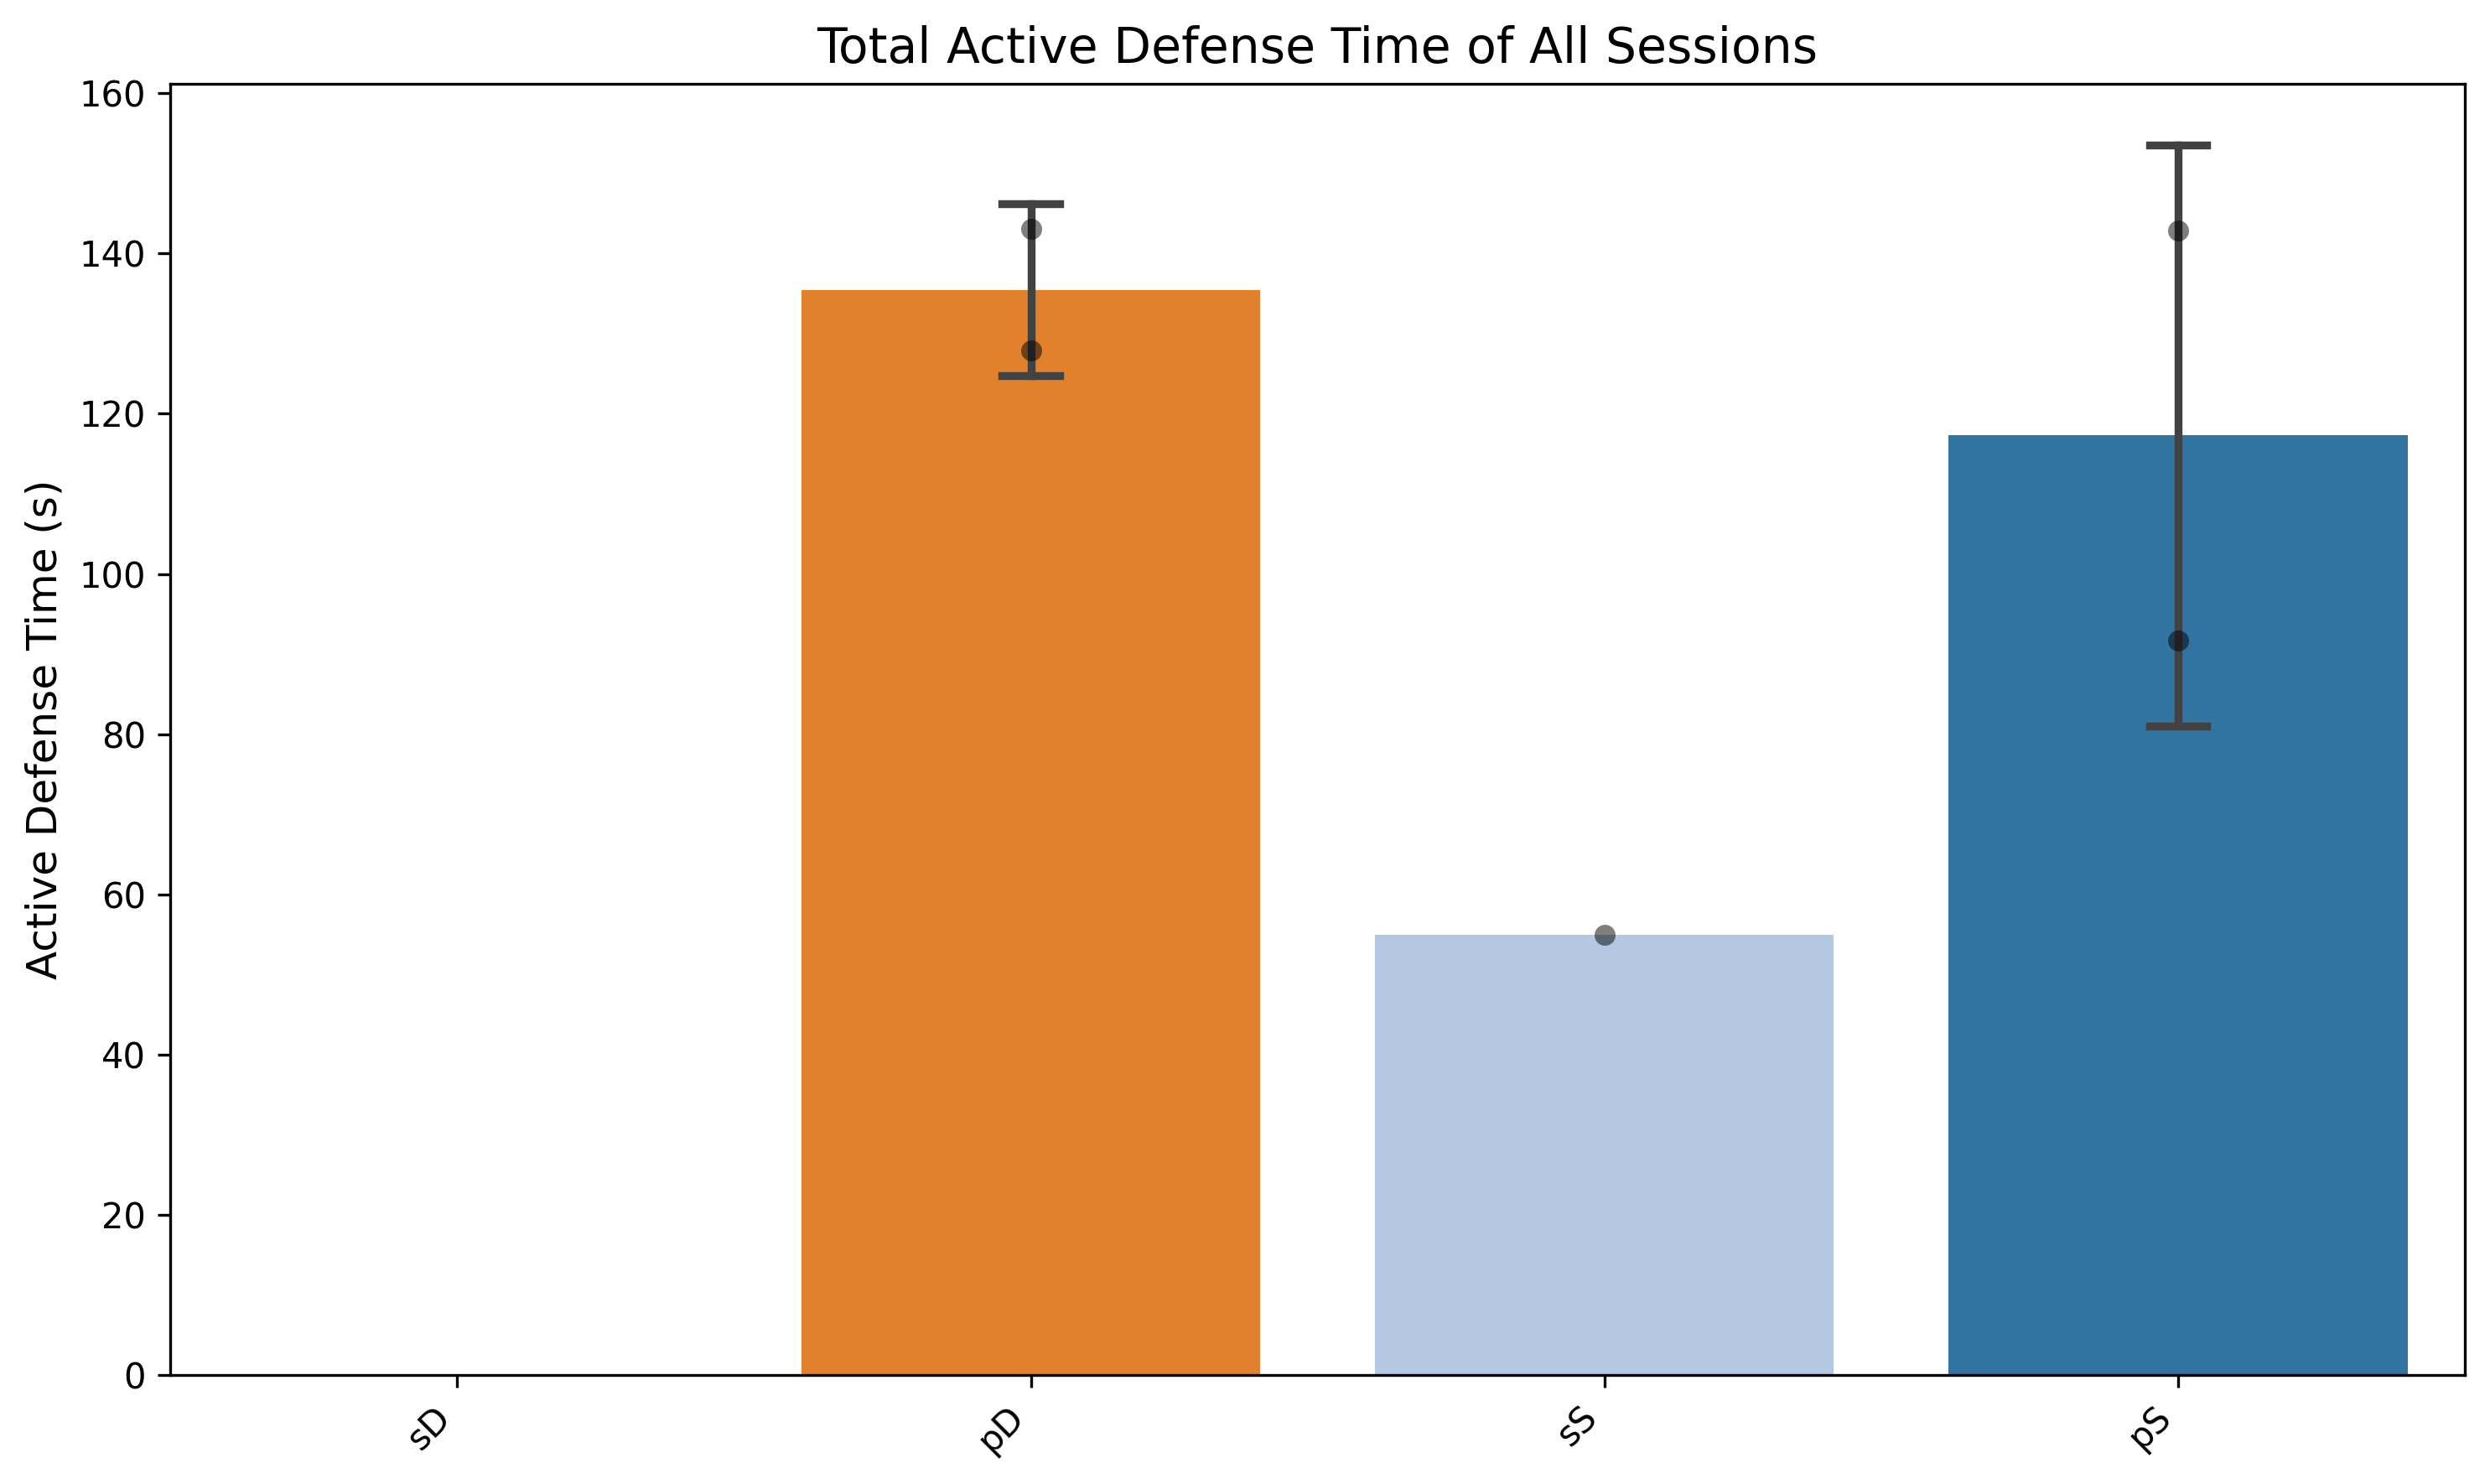

In [26]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    merge_filtered_behaviors, 
    calculate_total_time, 
    calculate_all_time, 
    flatten_bhvr_tuples, 
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

ActDef_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['approach', 'investigation', 'withdrawal', 'stretch']
    )

ActDef_data_merged = merge_filtered_behaviors(ActDef_data, merged_name='ActDef')
total_ActDef_time = calculate_total_time(
    ActDef_data_merged
    )

all_ActDef_times = calculate_all_time(
    ActDef_data_merged
    )

total_ActDef_time_grouped = group_data_by_sess_id(total_ActDef_time)
total_ActDef_time_grouped_flat = flatten_bhvr_tuples(total_ActDef_time_grouped)

all_ActDef_times_df = flatten_to_dataframe(total_ActDef_time_grouped_flat, value_column='time_sec')

draw_bar_plot(
    total_ActDef_time_grouped_flat,
    ylabel='Active Defense Time (s)',
    title='Total Active Defense Time of All Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

#### 4.7.2 Draw Active defense distribution.

In [27]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    merge_filtered_behaviors,
    sync_start_time,
    )
from analyze_data_ret_zj_utils.DataLoader import convert_bhvr_tuples2series

ActDef_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['approach', 'investigation', 'withdrawal', 'stretch']
    )

ActDef_data_merged = merge_filtered_behaviors(ActDef_data, merged_name='ActDef')
ActDef_data_synced = sync_start_time(ActDef_data_merged, toi_dict)

In [28]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_behavior_pct_by_time_bins, group_bhvr_pct_by_time_bins

time_bins = [(0, 1200), (1200, 2400), (2400, 3600), (3600, 4800), (4800, 6000)]
ActDef_pct_by_time_bins, key_labels = calculate_behavior_pct_by_time_bins(
    ActDef_data_synced, 
    time_bins)
ActDef_pct_by_time_bins_grouped = group_bhvr_pct_by_time_bins(ActDef_pct_by_time_bins)


/home/gxj/.conda/envs/gxj/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


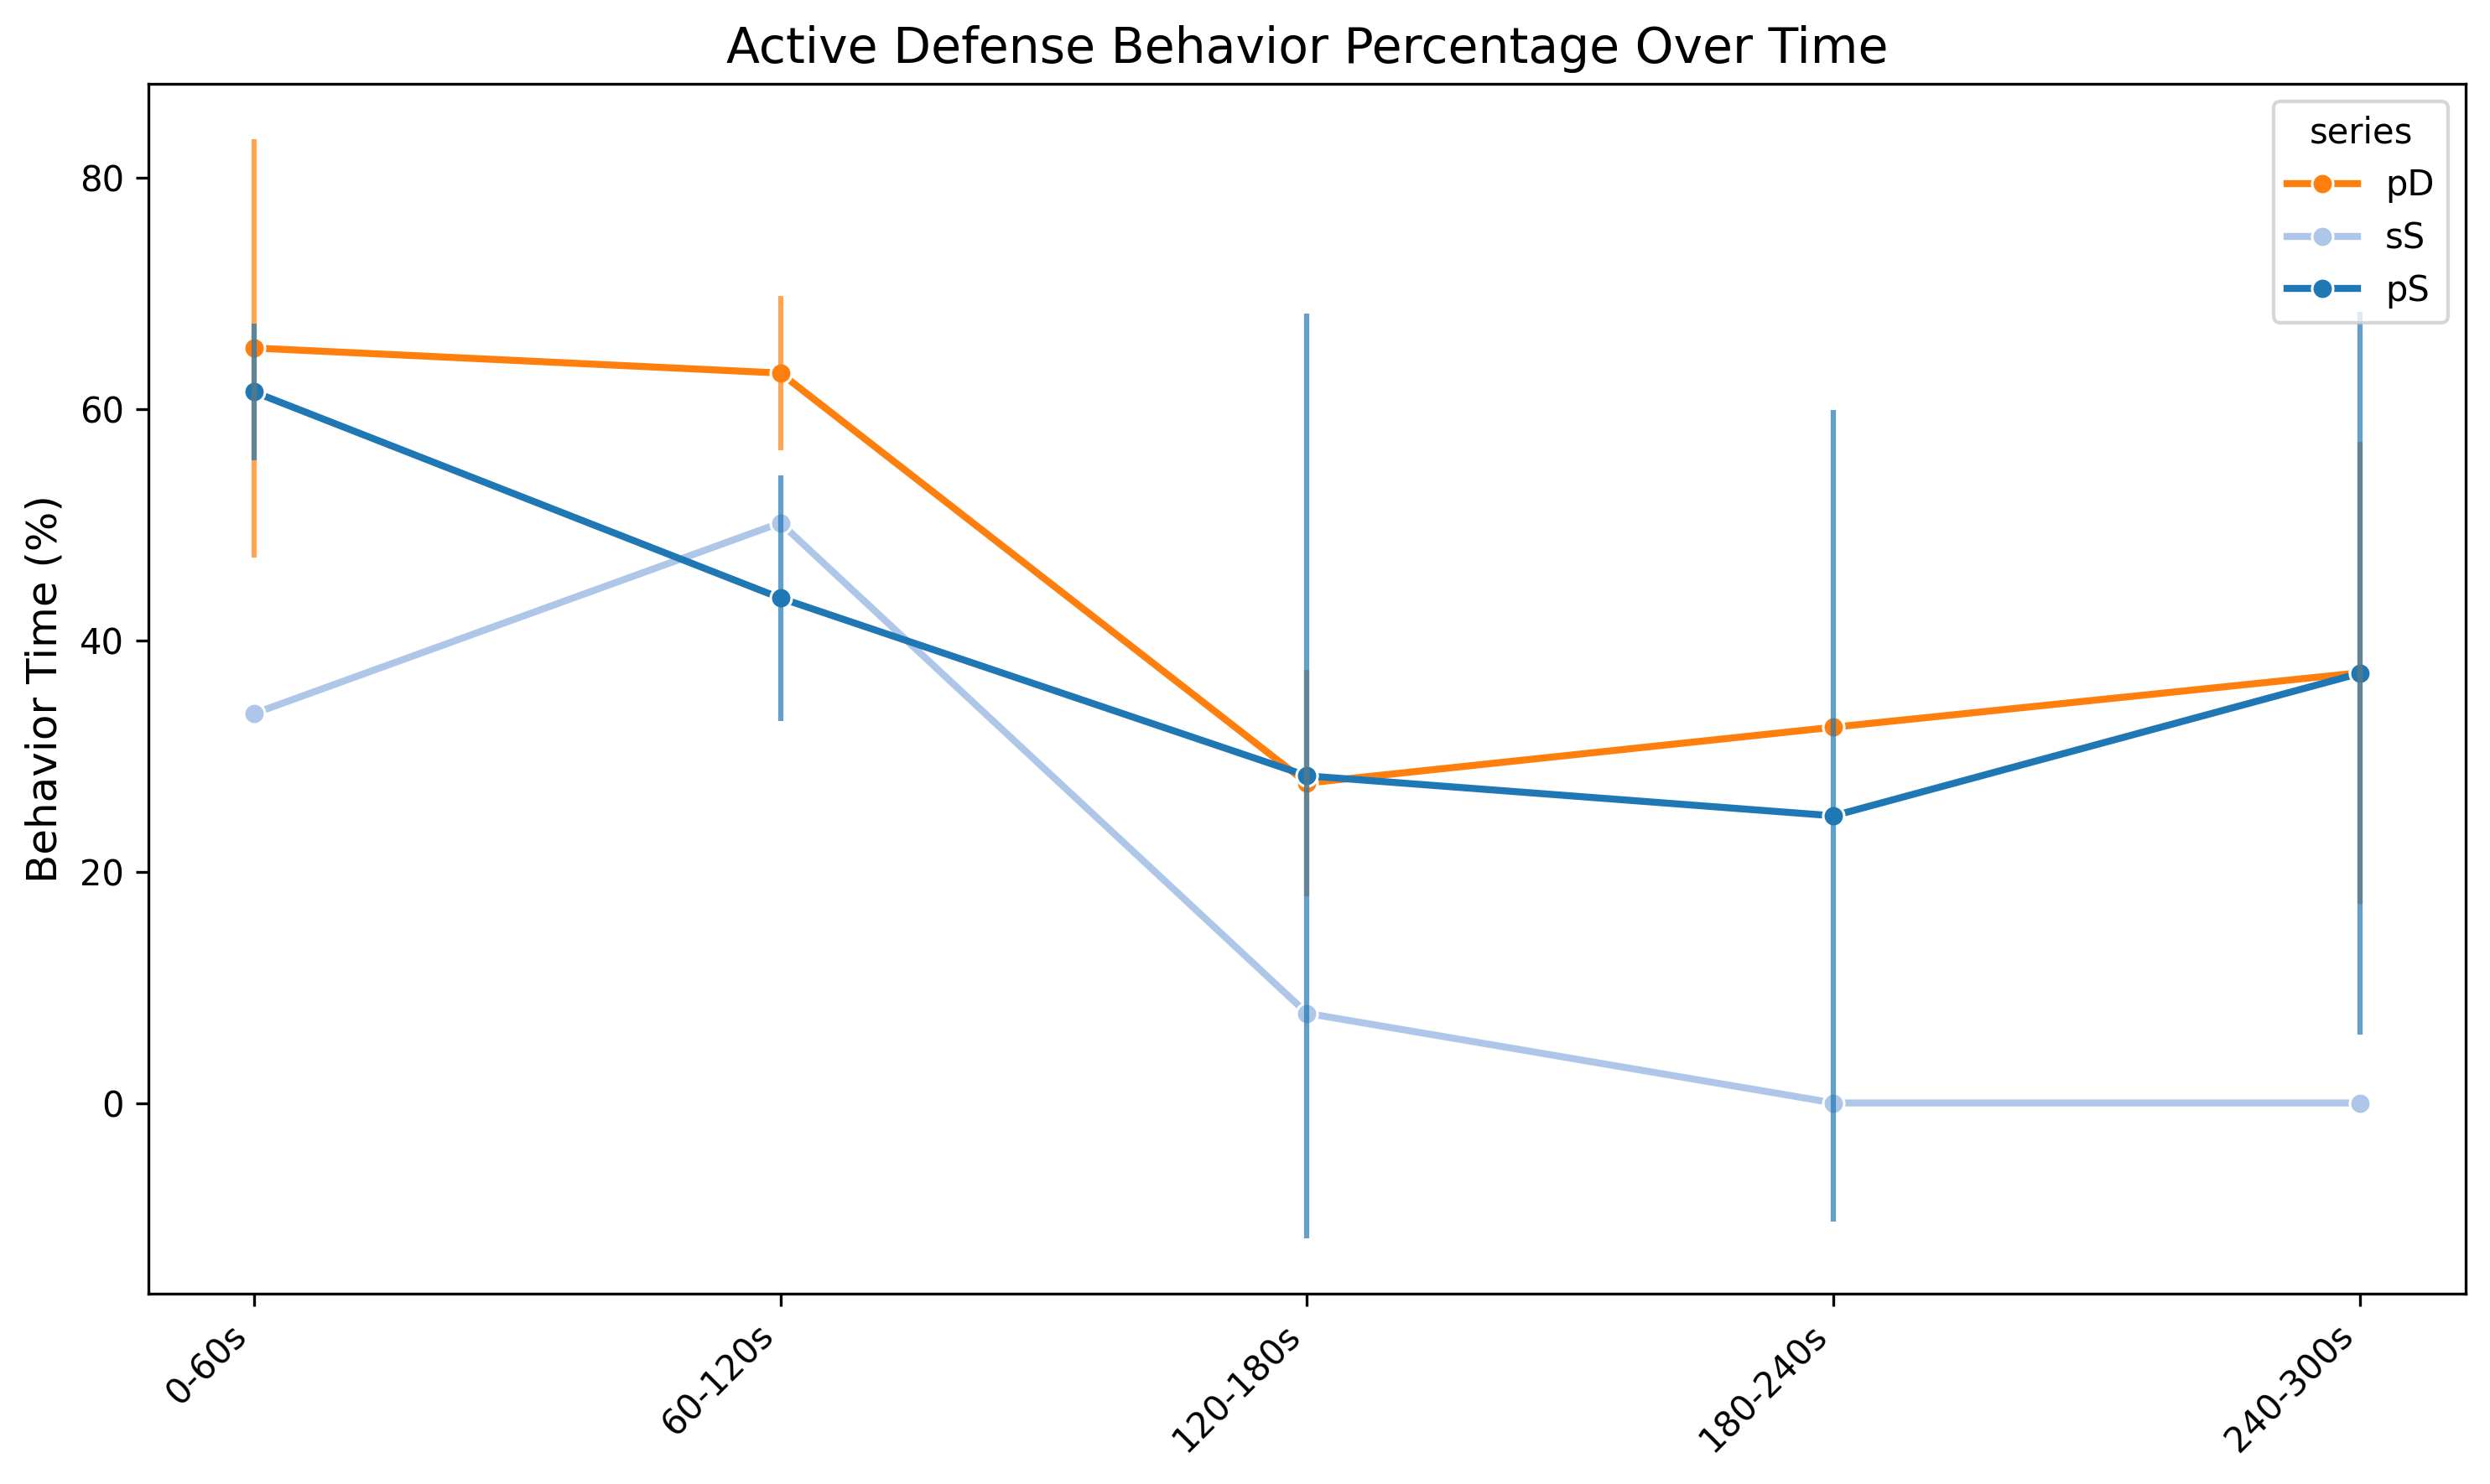

In [29]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_line_plot

draw_line_plot(
    ActDef_pct_by_time_bins_grouped,
    ylabel='Behavior Time (%)',
    title='Active Defense Behavior Percentage Over Time',
    xticks=key_labels,
    color_dict=group_color_dict, 
)

#### 4.7.3 Draw first approach latency.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


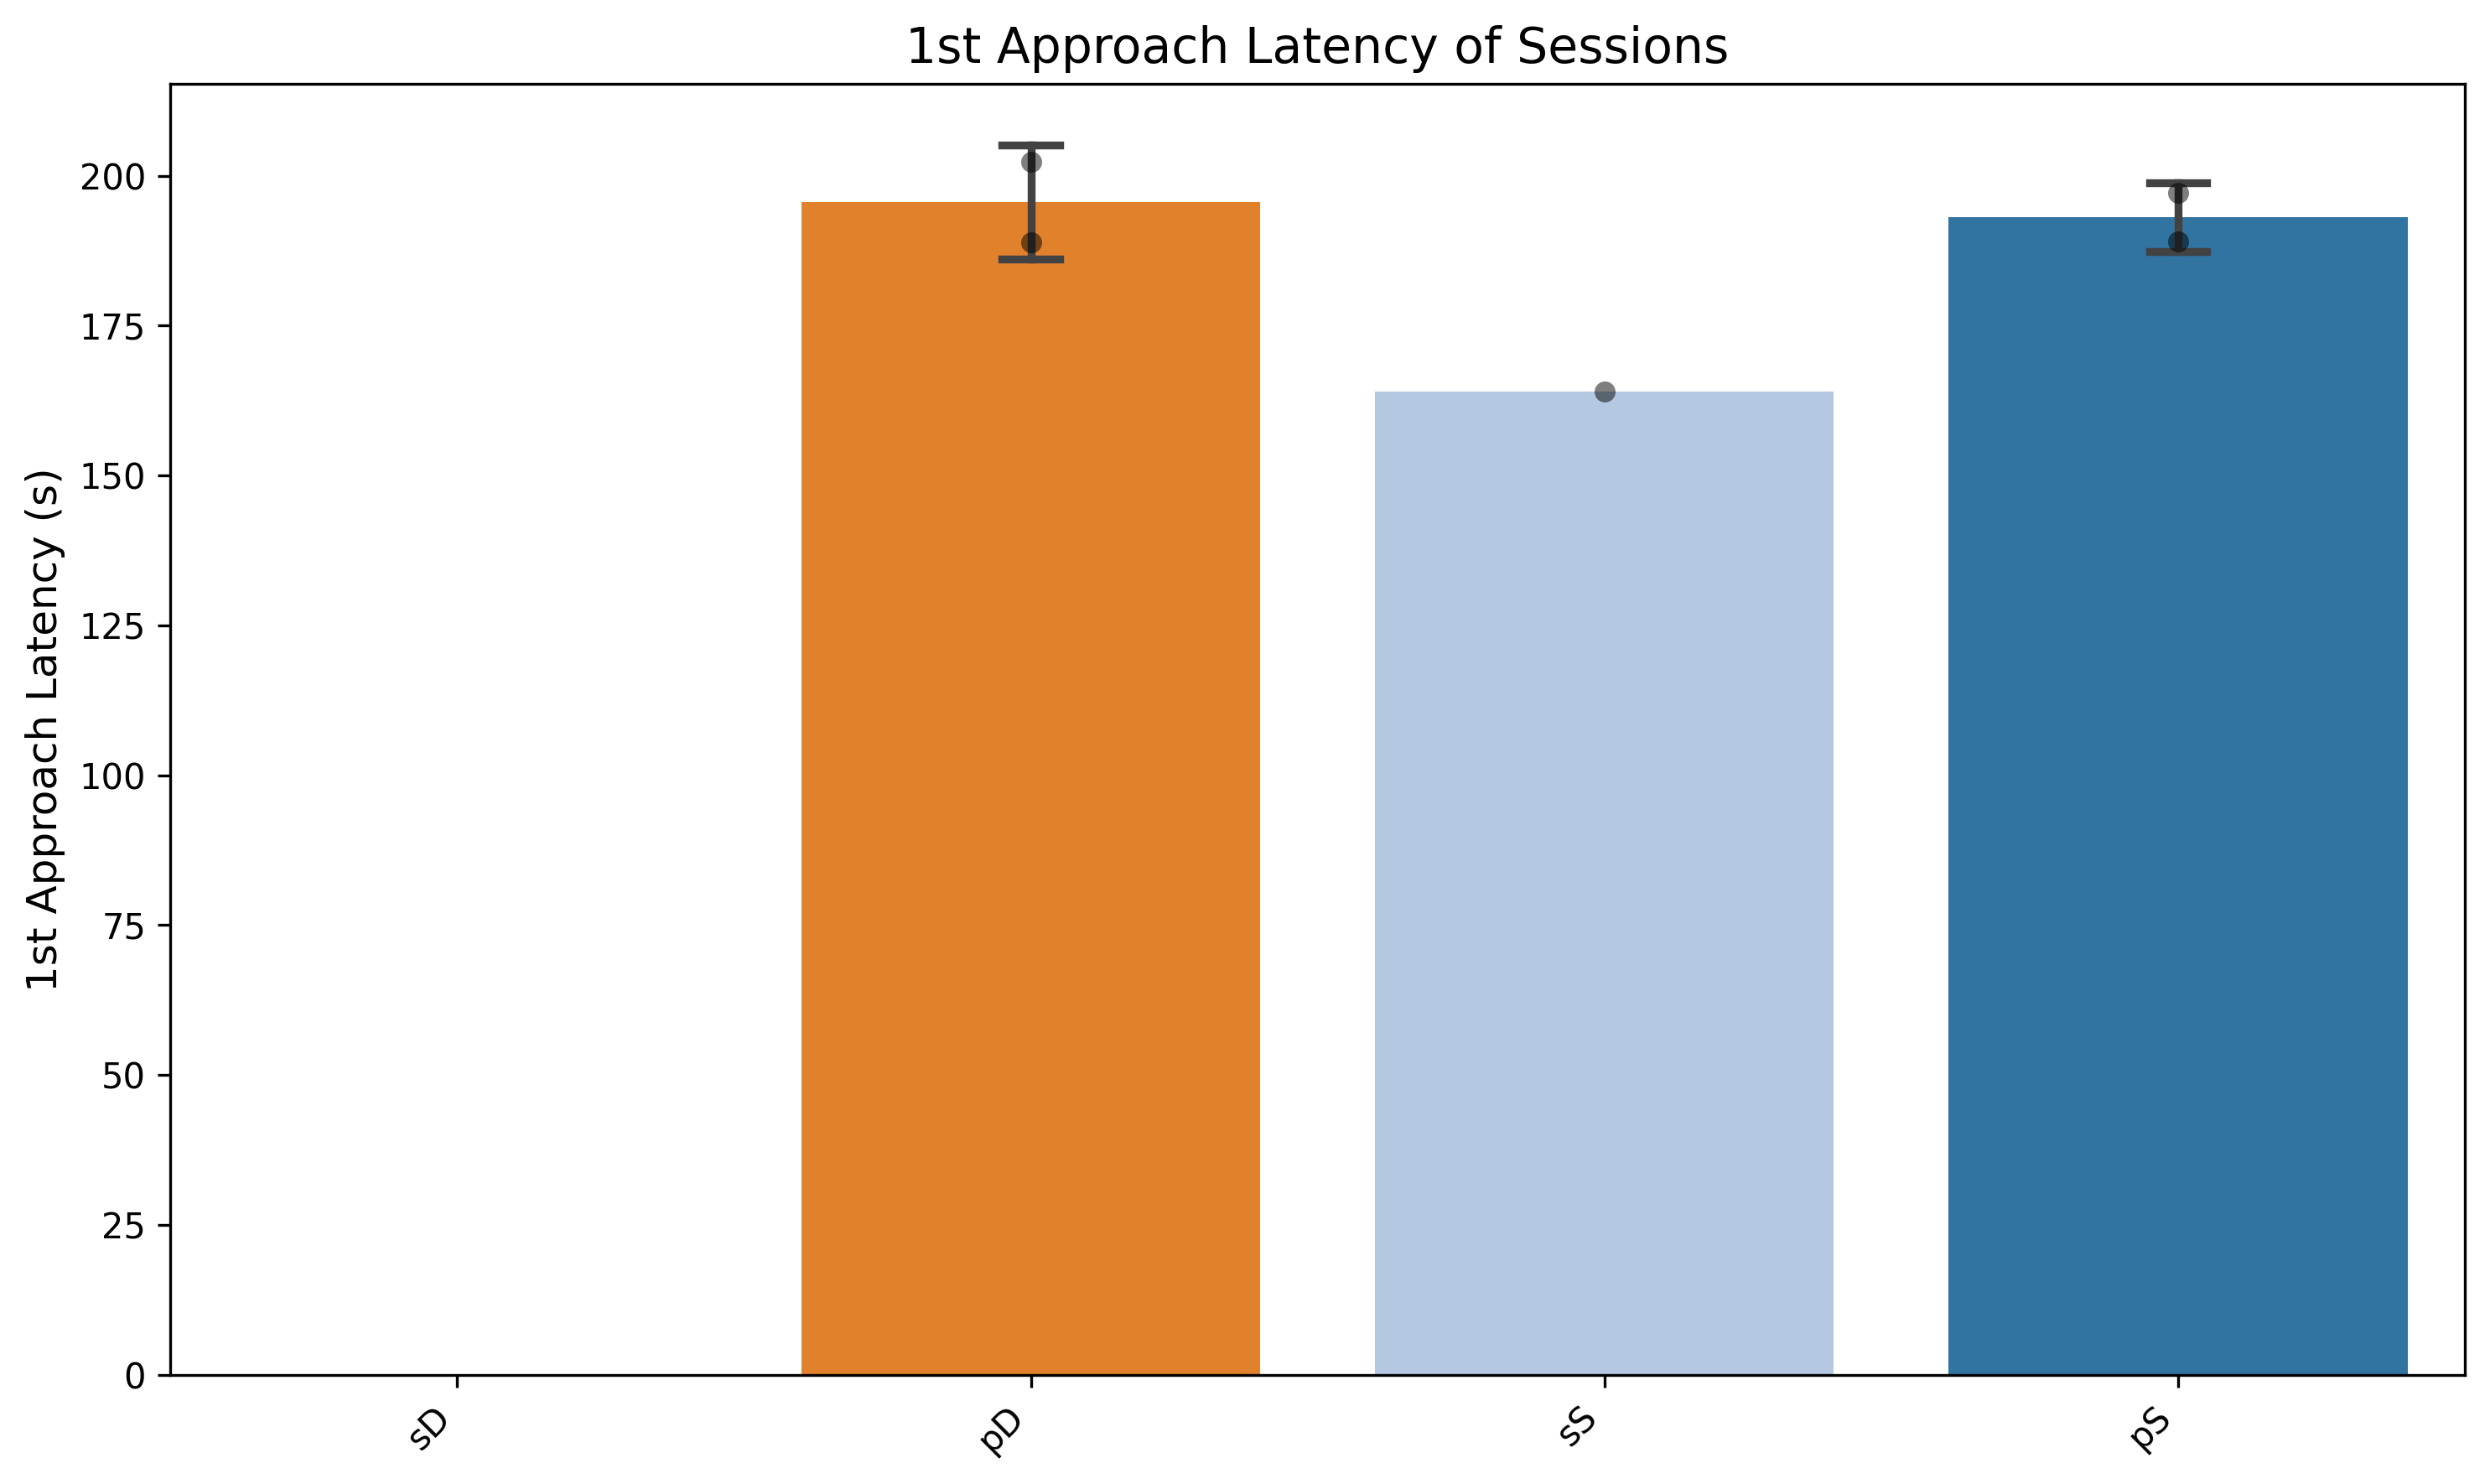

In [30]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range,
    sync_start_time, 
    calculate_latency, 
    flatten_bhvr_tuples,
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

approach_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['approach']
    )

approach_data_synced = sync_start_time(
    approach_data, 
    toi=toi_dict
    )

first_approach_latency = calculate_latency(
    approach_data, 
    first=True
    )

first_approach_latency_grouped = group_data_by_sess_id(first_approach_latency)
first_approach_latency_flat = flatten_bhvr_tuples(first_approach_latency_grouped)
first_approach_latency_df = flatten_to_dataframe(first_approach_latency_flat, value_column='time_sec')

draw_bar_plot(
    first_approach_latency_flat,
    ylabel='1st Approach Latency (s)',
    title='1st Approach Latency of Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

#### 4.7.4 Draw approach frequency.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


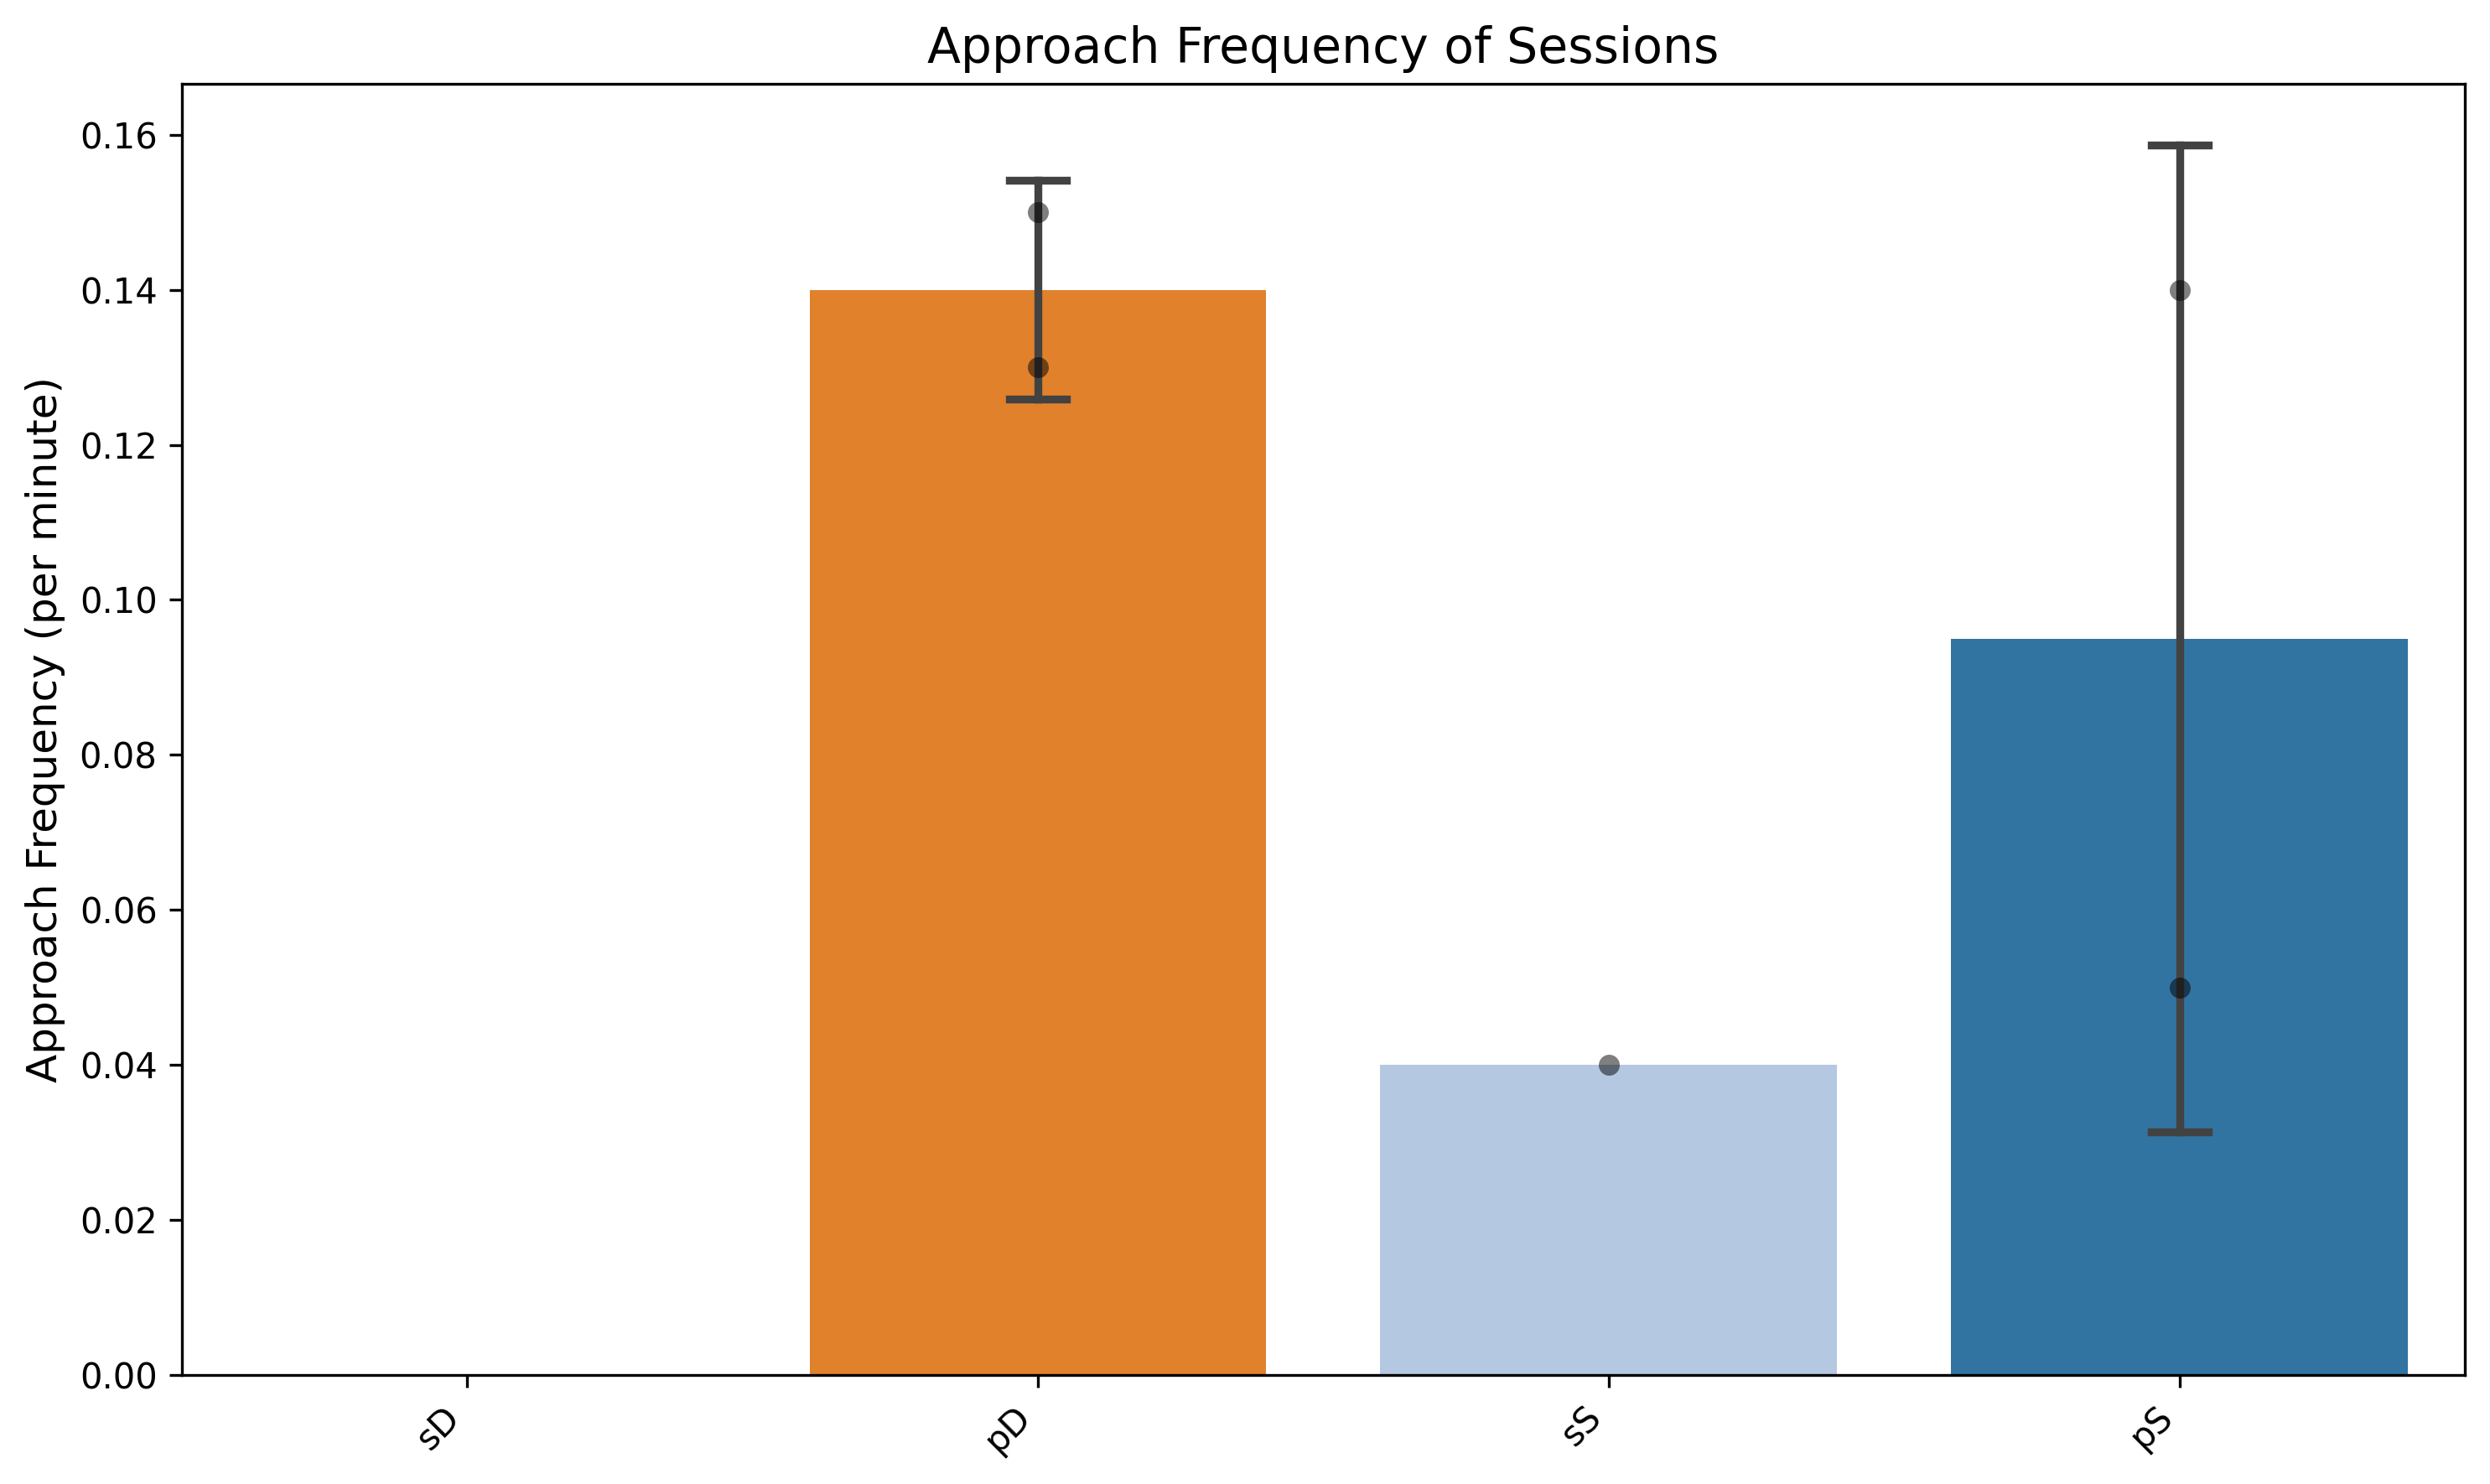

In [31]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range,
    sync_start_time, 
    calculate_frequency, 
    flatten_bhvr_tuples,
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

approach_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['approach']
    )

approach_data_synced = sync_start_time(
    approach_data, 
    toi=toi_dict
    )

approach_frequency = calculate_frequency(
    approach_data, 
    total_time=6000
    )

approach_frequency_grouped = group_data_by_sess_id(approach_frequency)
approach_frequency_flat = flatten_bhvr_tuples(approach_frequency_grouped)
approach_frequency_df = flatten_to_dataframe(approach_frequency_flat, value_column='frequency')

draw_bar_plot(
    approach_frequency_flat,
    ylabel='Approach Frequency (per minute)',
    title='Approach Frequency of Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

#### 4.7.5 Draw all investigate time.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


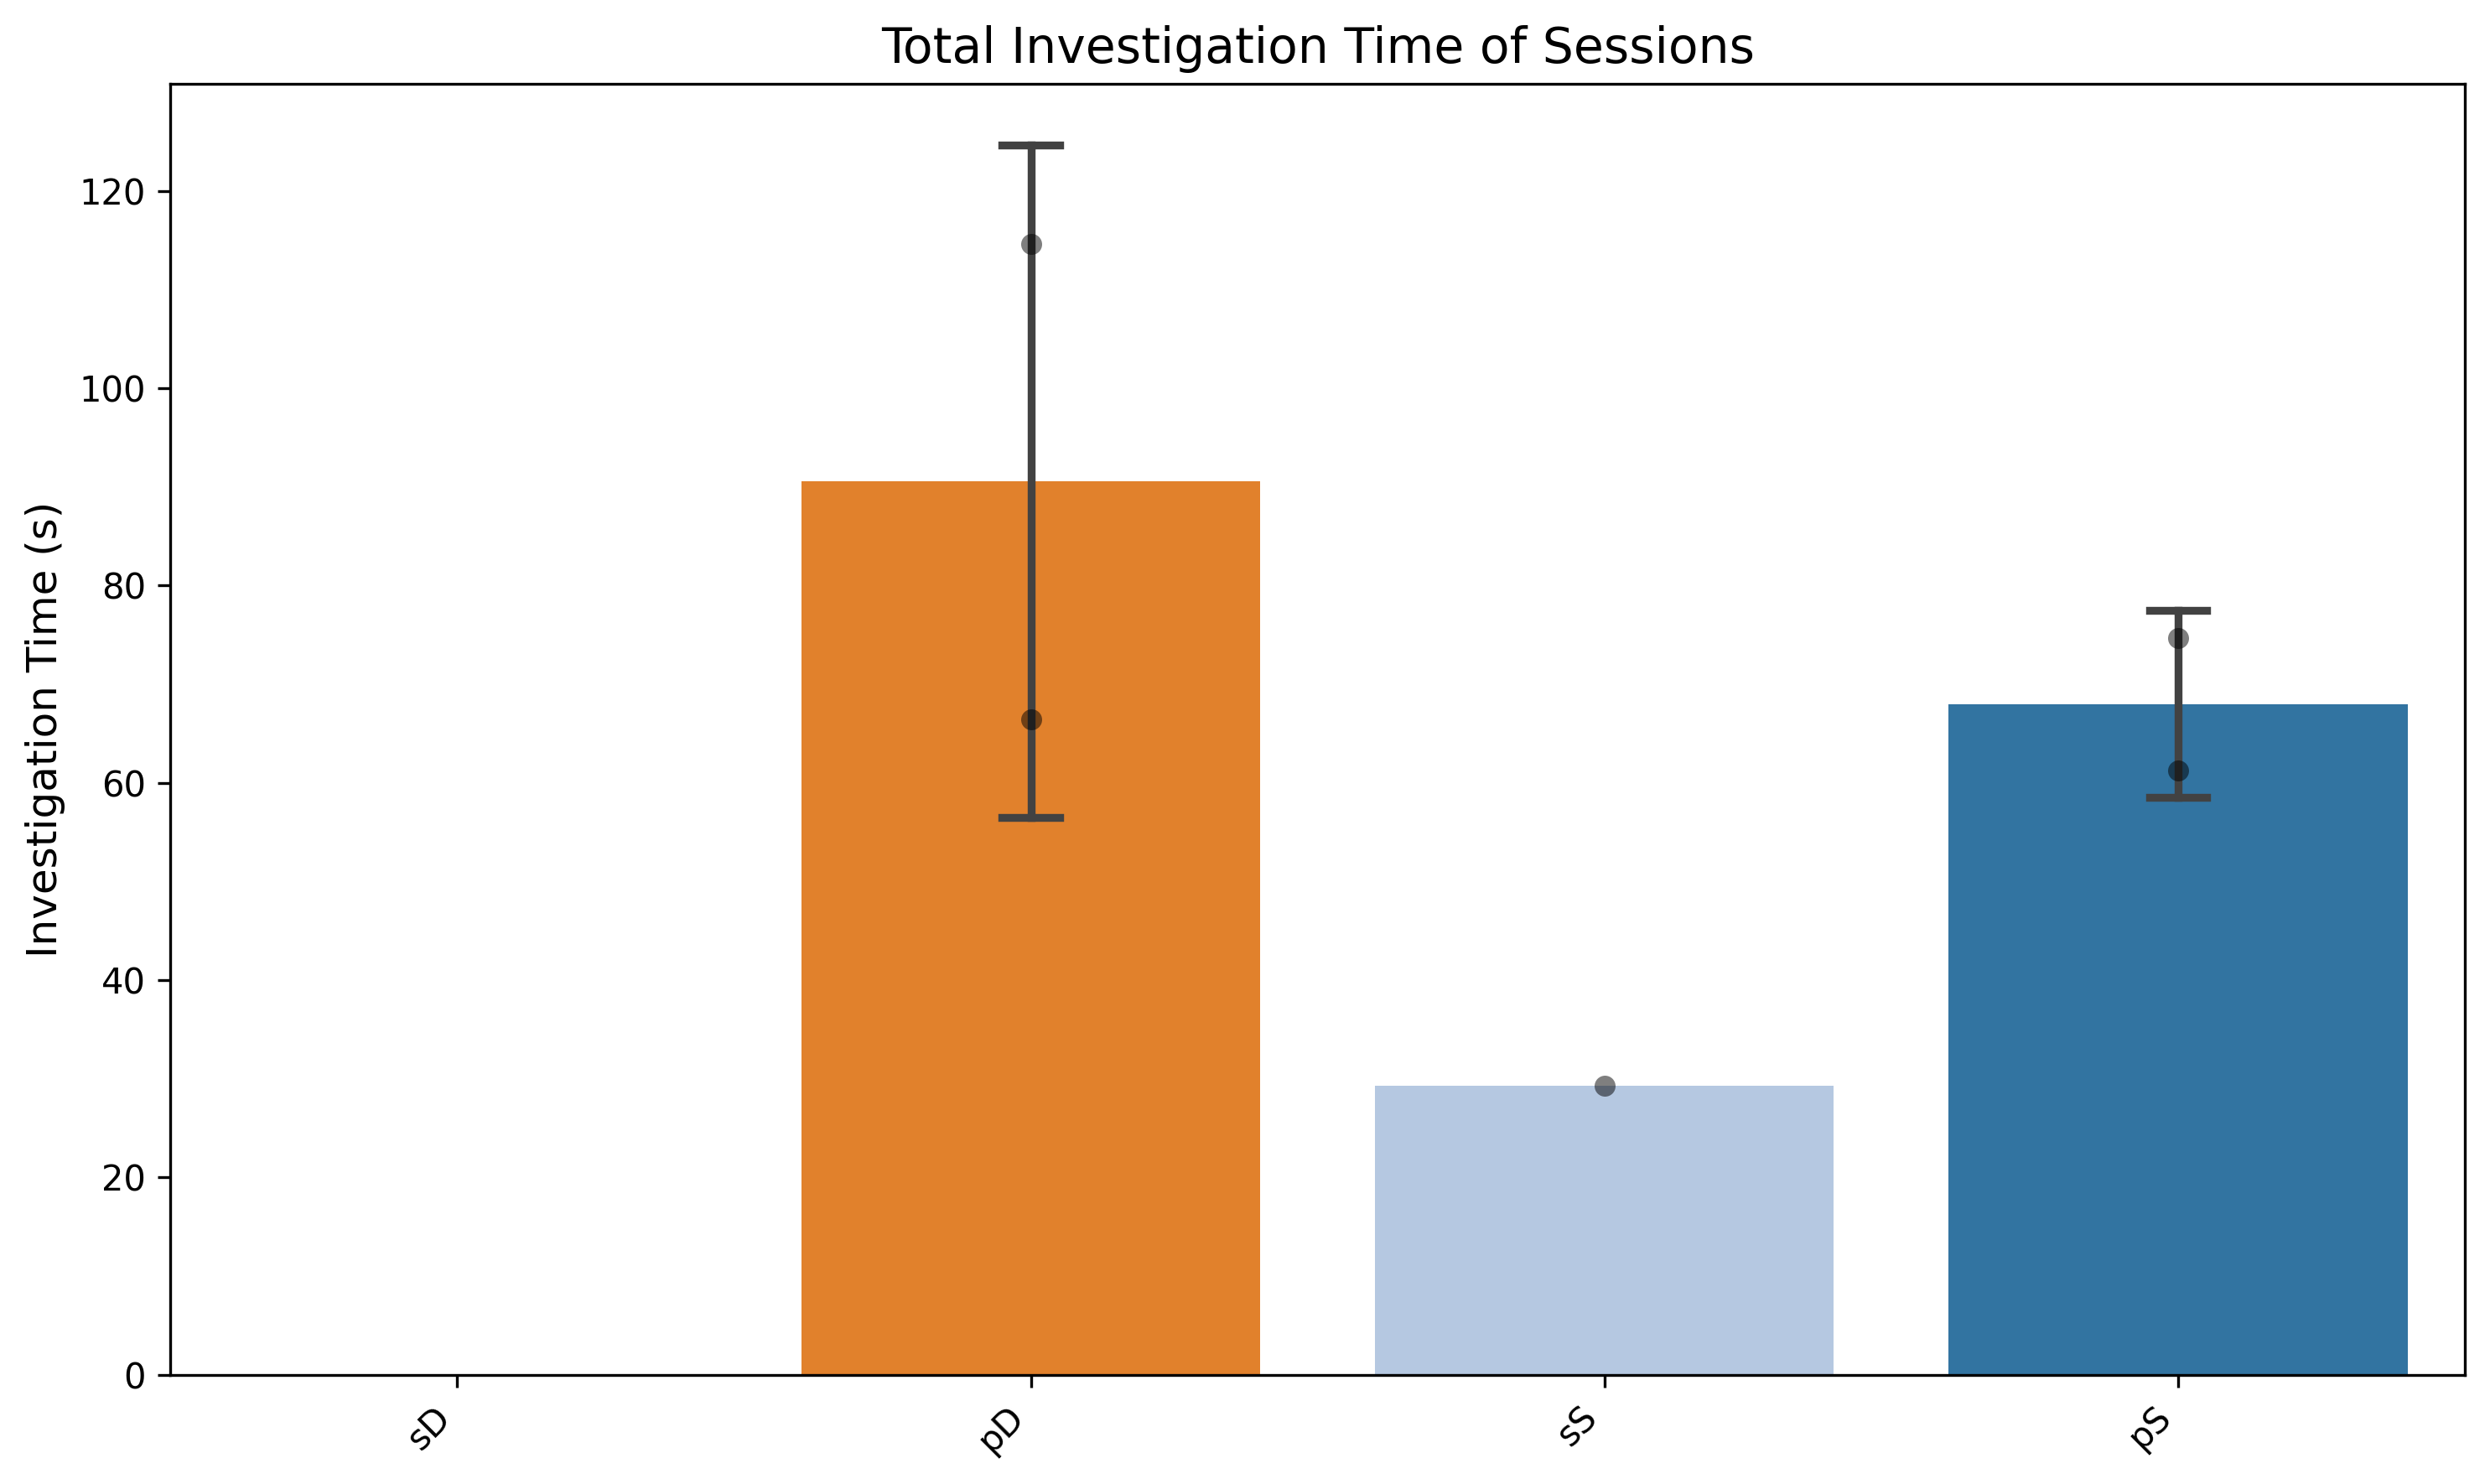

In [32]:
from analyze_data_ret_zj_utils.DataAnalyzer import filter_behavior_in_time_range, calculate_total_time, calculate_all_time
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

investigation_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['investigation']
    )

total_investigation_time = calculate_total_time(
    investigation_data
    )

total_investigation_time_grouped = group_data_by_sess_id(total_investigation_time)
total_investigation_time_flat = flatten_bhvr_tuples(total_investigation_time_grouped)
total_investigation_time_df = flatten_to_dataframe(total_investigation_time_flat, value_column='time_sec')

draw_bar_plot(
    total_investigation_time_flat,
    ylabel='Investigation Time (s)',
    title='Total Investigation Time of Sessions',
    show_points=True, 
    color_dict=group_color_dict, 
    jitter=False
)

### 4.8 Neutral solitary behavior.

#### 4.8.1 Draw grooming disturibution.

In [33]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    sync_start_time,
    )
from analyze_data_ret_zj_utils.DataLoader import convert_bhvr_tuples2series

grooming_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['grooming']
    )

grooming_data_synced = sync_start_time(grooming_data, toi_dict)

In [34]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_behavior_pct_by_time_bins, group_bhvr_pct_by_time_bins

time_bins = [(0, 1200), (1200, 2400), (2400, 3600), (3600, 4800), (4800, 6000)]
grooming_pct_by_time_bins, key_labels = calculate_behavior_pct_by_time_bins(
    grooming_data_synced, 
    time_bins)
grooming_pct_by_time_bins_grouped = group_bhvr_pct_by_time_bins(grooming_pct_by_time_bins)

/home/gxj/.conda/envs/gxj/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


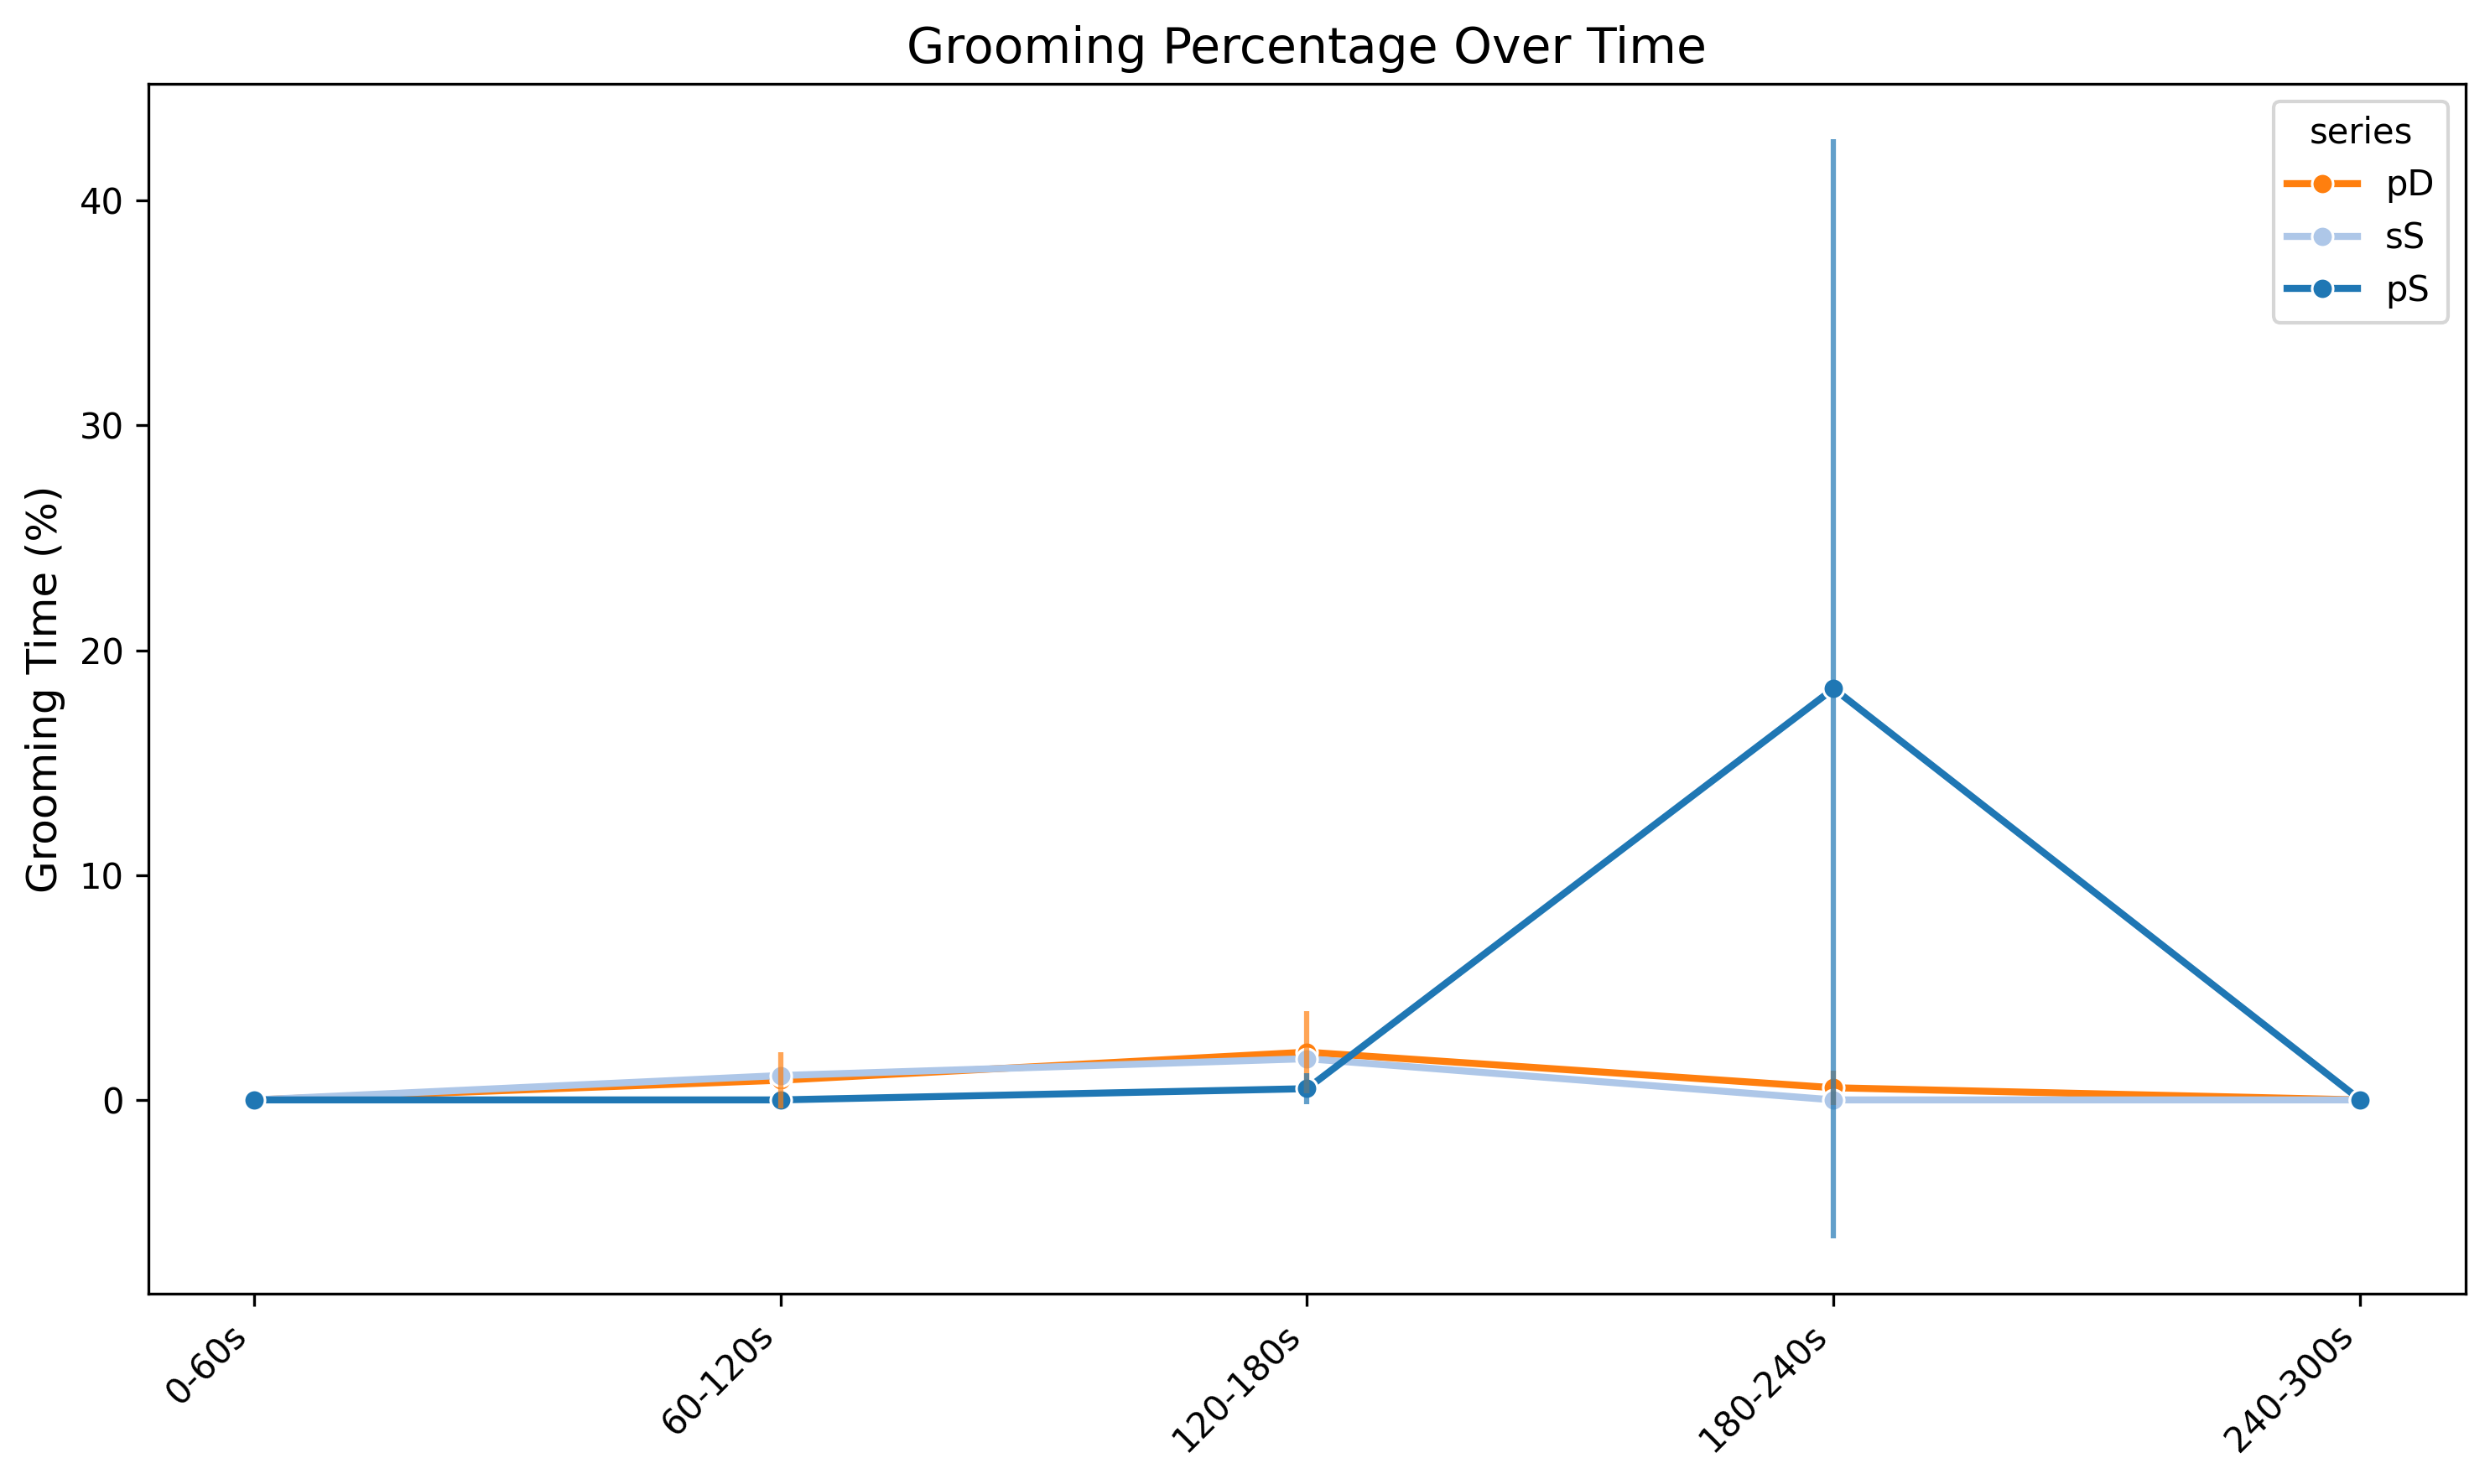

In [35]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_line_plot

draw_line_plot(
    grooming_pct_by_time_bins_grouped,
    ylabel='Grooming Time (%)',
    title='Grooming Percentage Over Time',
    xticks=key_labels,
    color_dict=group_color_dict, 
)

#### 4.8.2 Draw rearing disturibution.

In [36]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    sync_start_time,
    )
from analyze_data_ret_zj_utils.DataLoader import convert_bhvr_tuples2series

rearing_data = filter_behavior_in_time_range(
    bhvr_tuples_dict, 
    toi=toi_dict,
    bhvr_list=['rearing']
    )

rearing_data_synced = sync_start_time(rearing_data, toi_dict)

In [37]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_behavior_pct_by_time_bins, group_bhvr_pct_by_time_bins

time_bins = [(0, 1200), (1200, 2400), (2400, 3600), (3600, 4800), (4800, 6000)]
rearing_pct_by_time_bins, key_labels = calculate_behavior_pct_by_time_bins(
    rearing_data_synced, 
    time_bins)
rearing_pct_by_time_bins_grouped = group_bhvr_pct_by_time_bins(rearing_pct_by_time_bins)

/home/gxj/.conda/envs/gxj/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


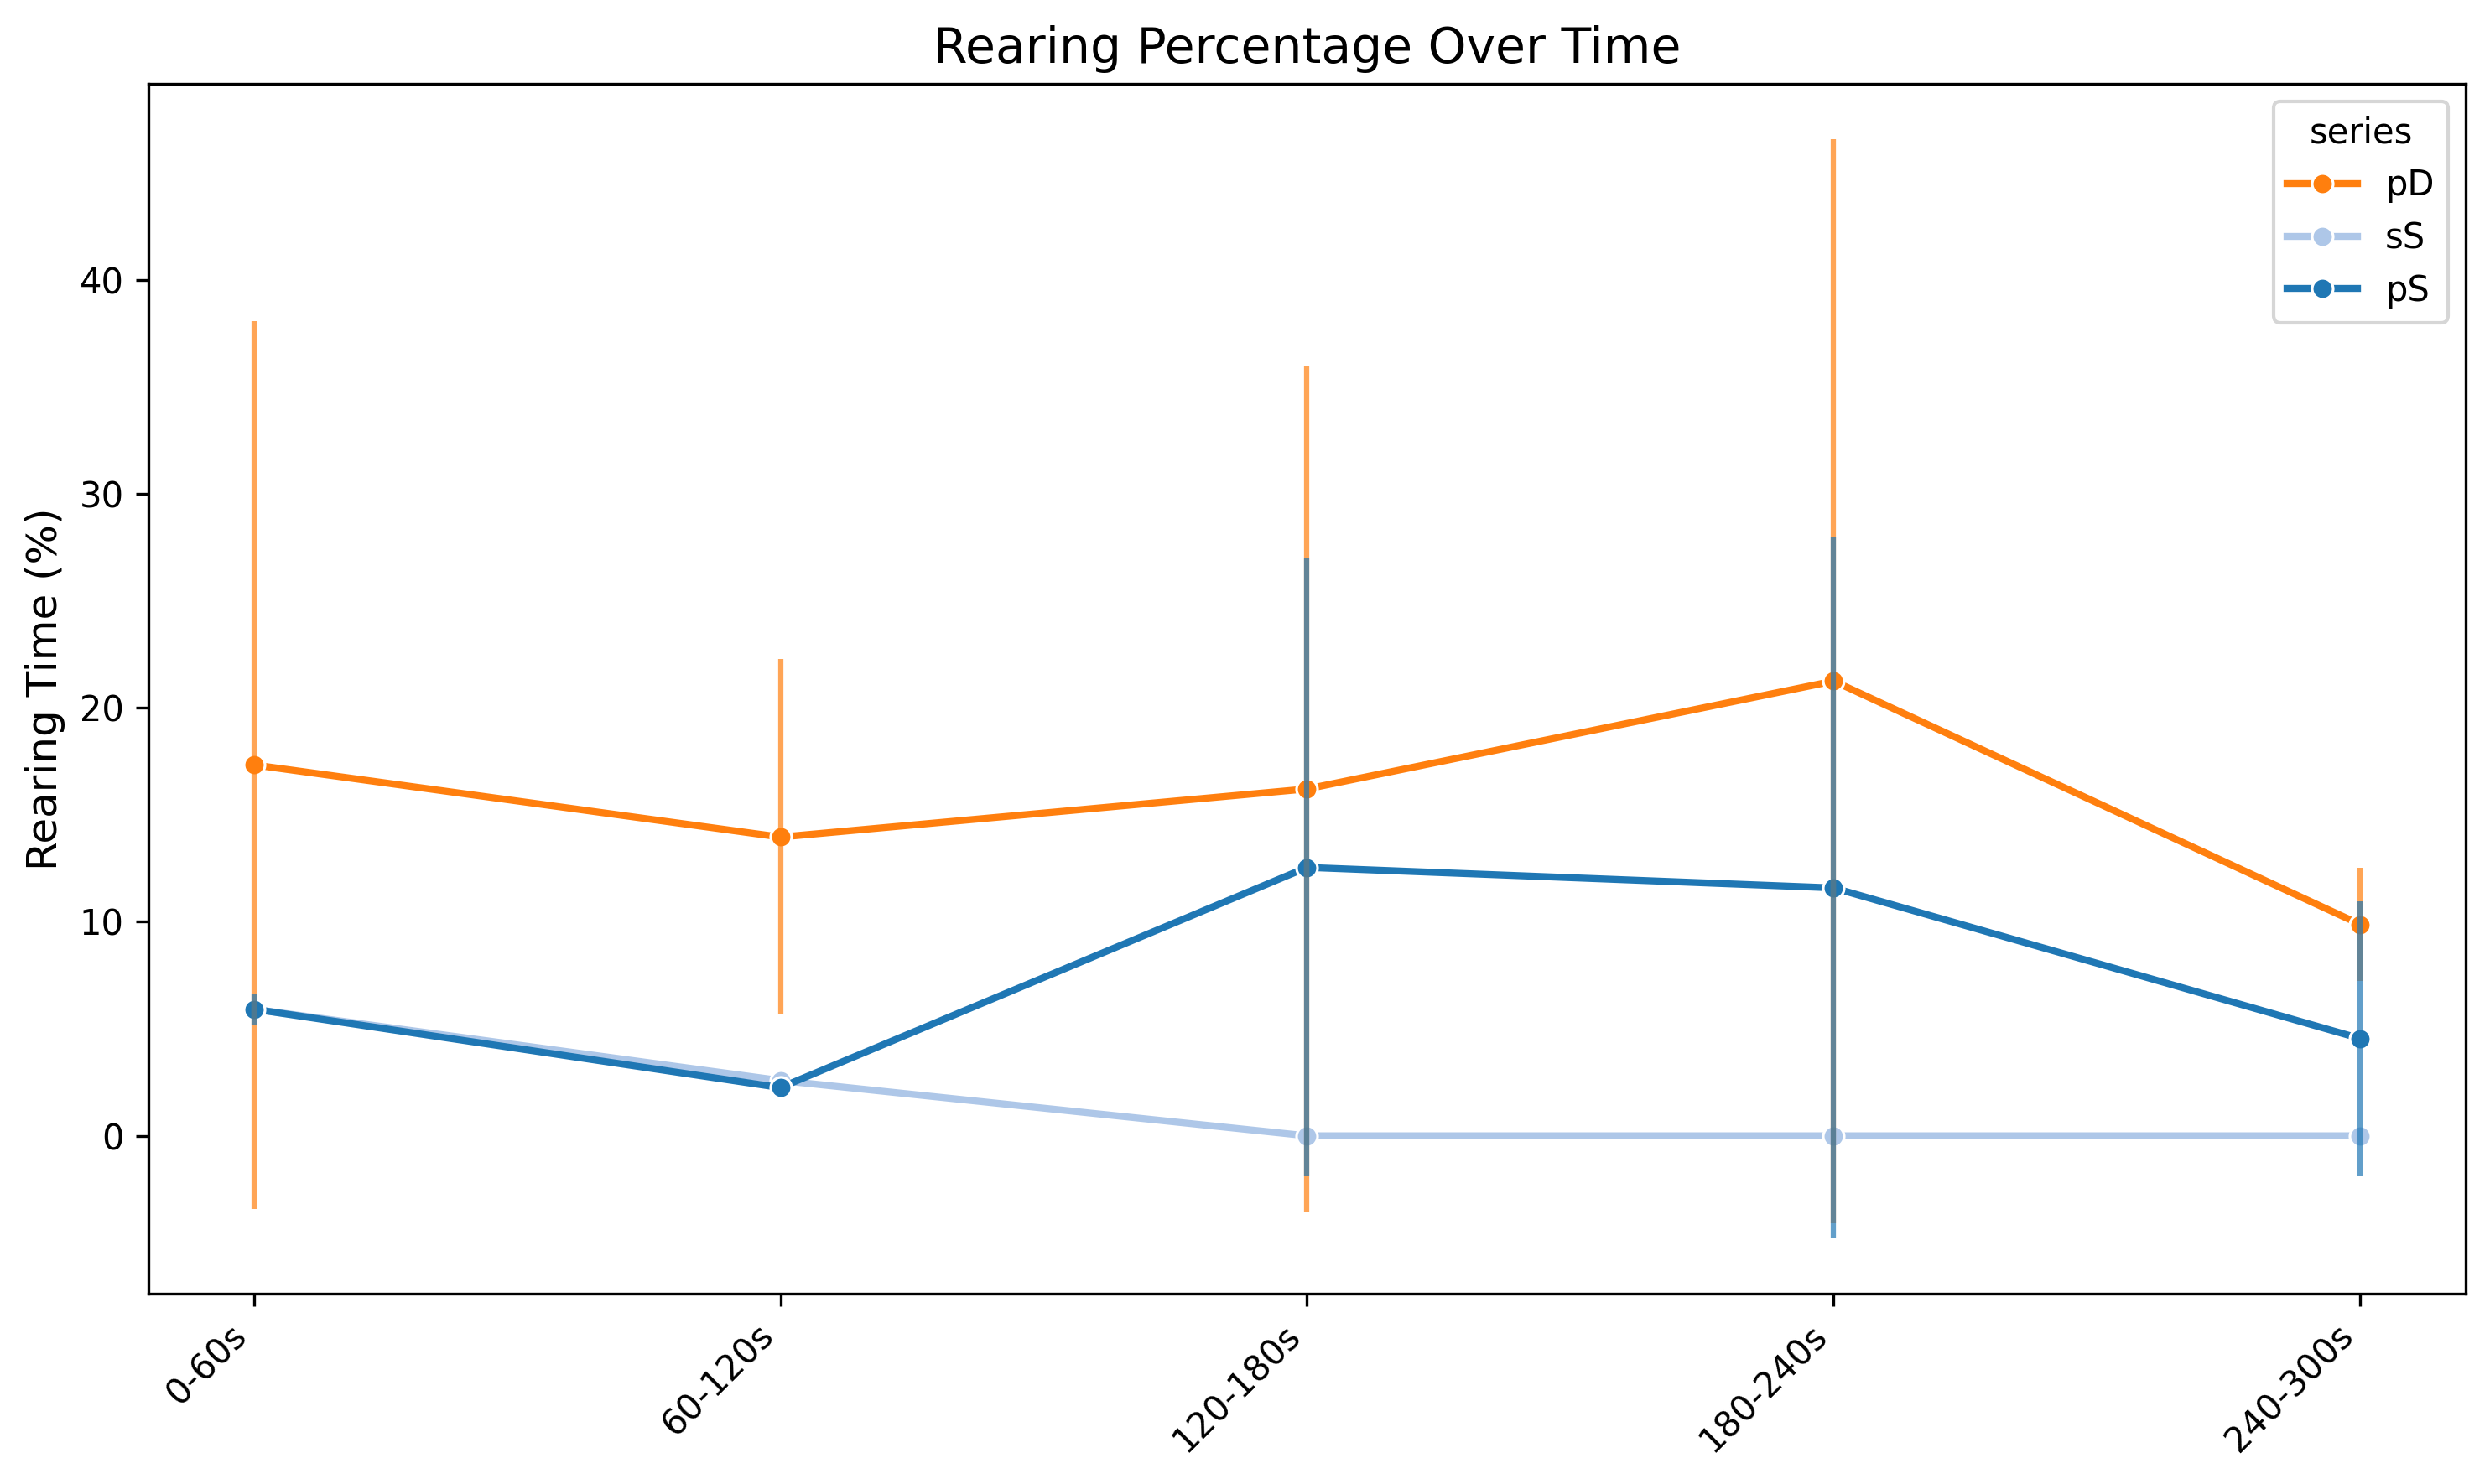

In [38]:
from analyze_data_ret_zj_utils.DataVisualizer import draw_line_plot

draw_line_plot(
    rearing_pct_by_time_bins_grouped,
    ylabel='Rearing Time (%)',
    title='Rearing Percentage Over Time',
    xticks=key_labels,
    color_dict=group_color_dict, 
)

### 4.9 Social behavior.

#### 4.9.1 Draw total social time and average duration.

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


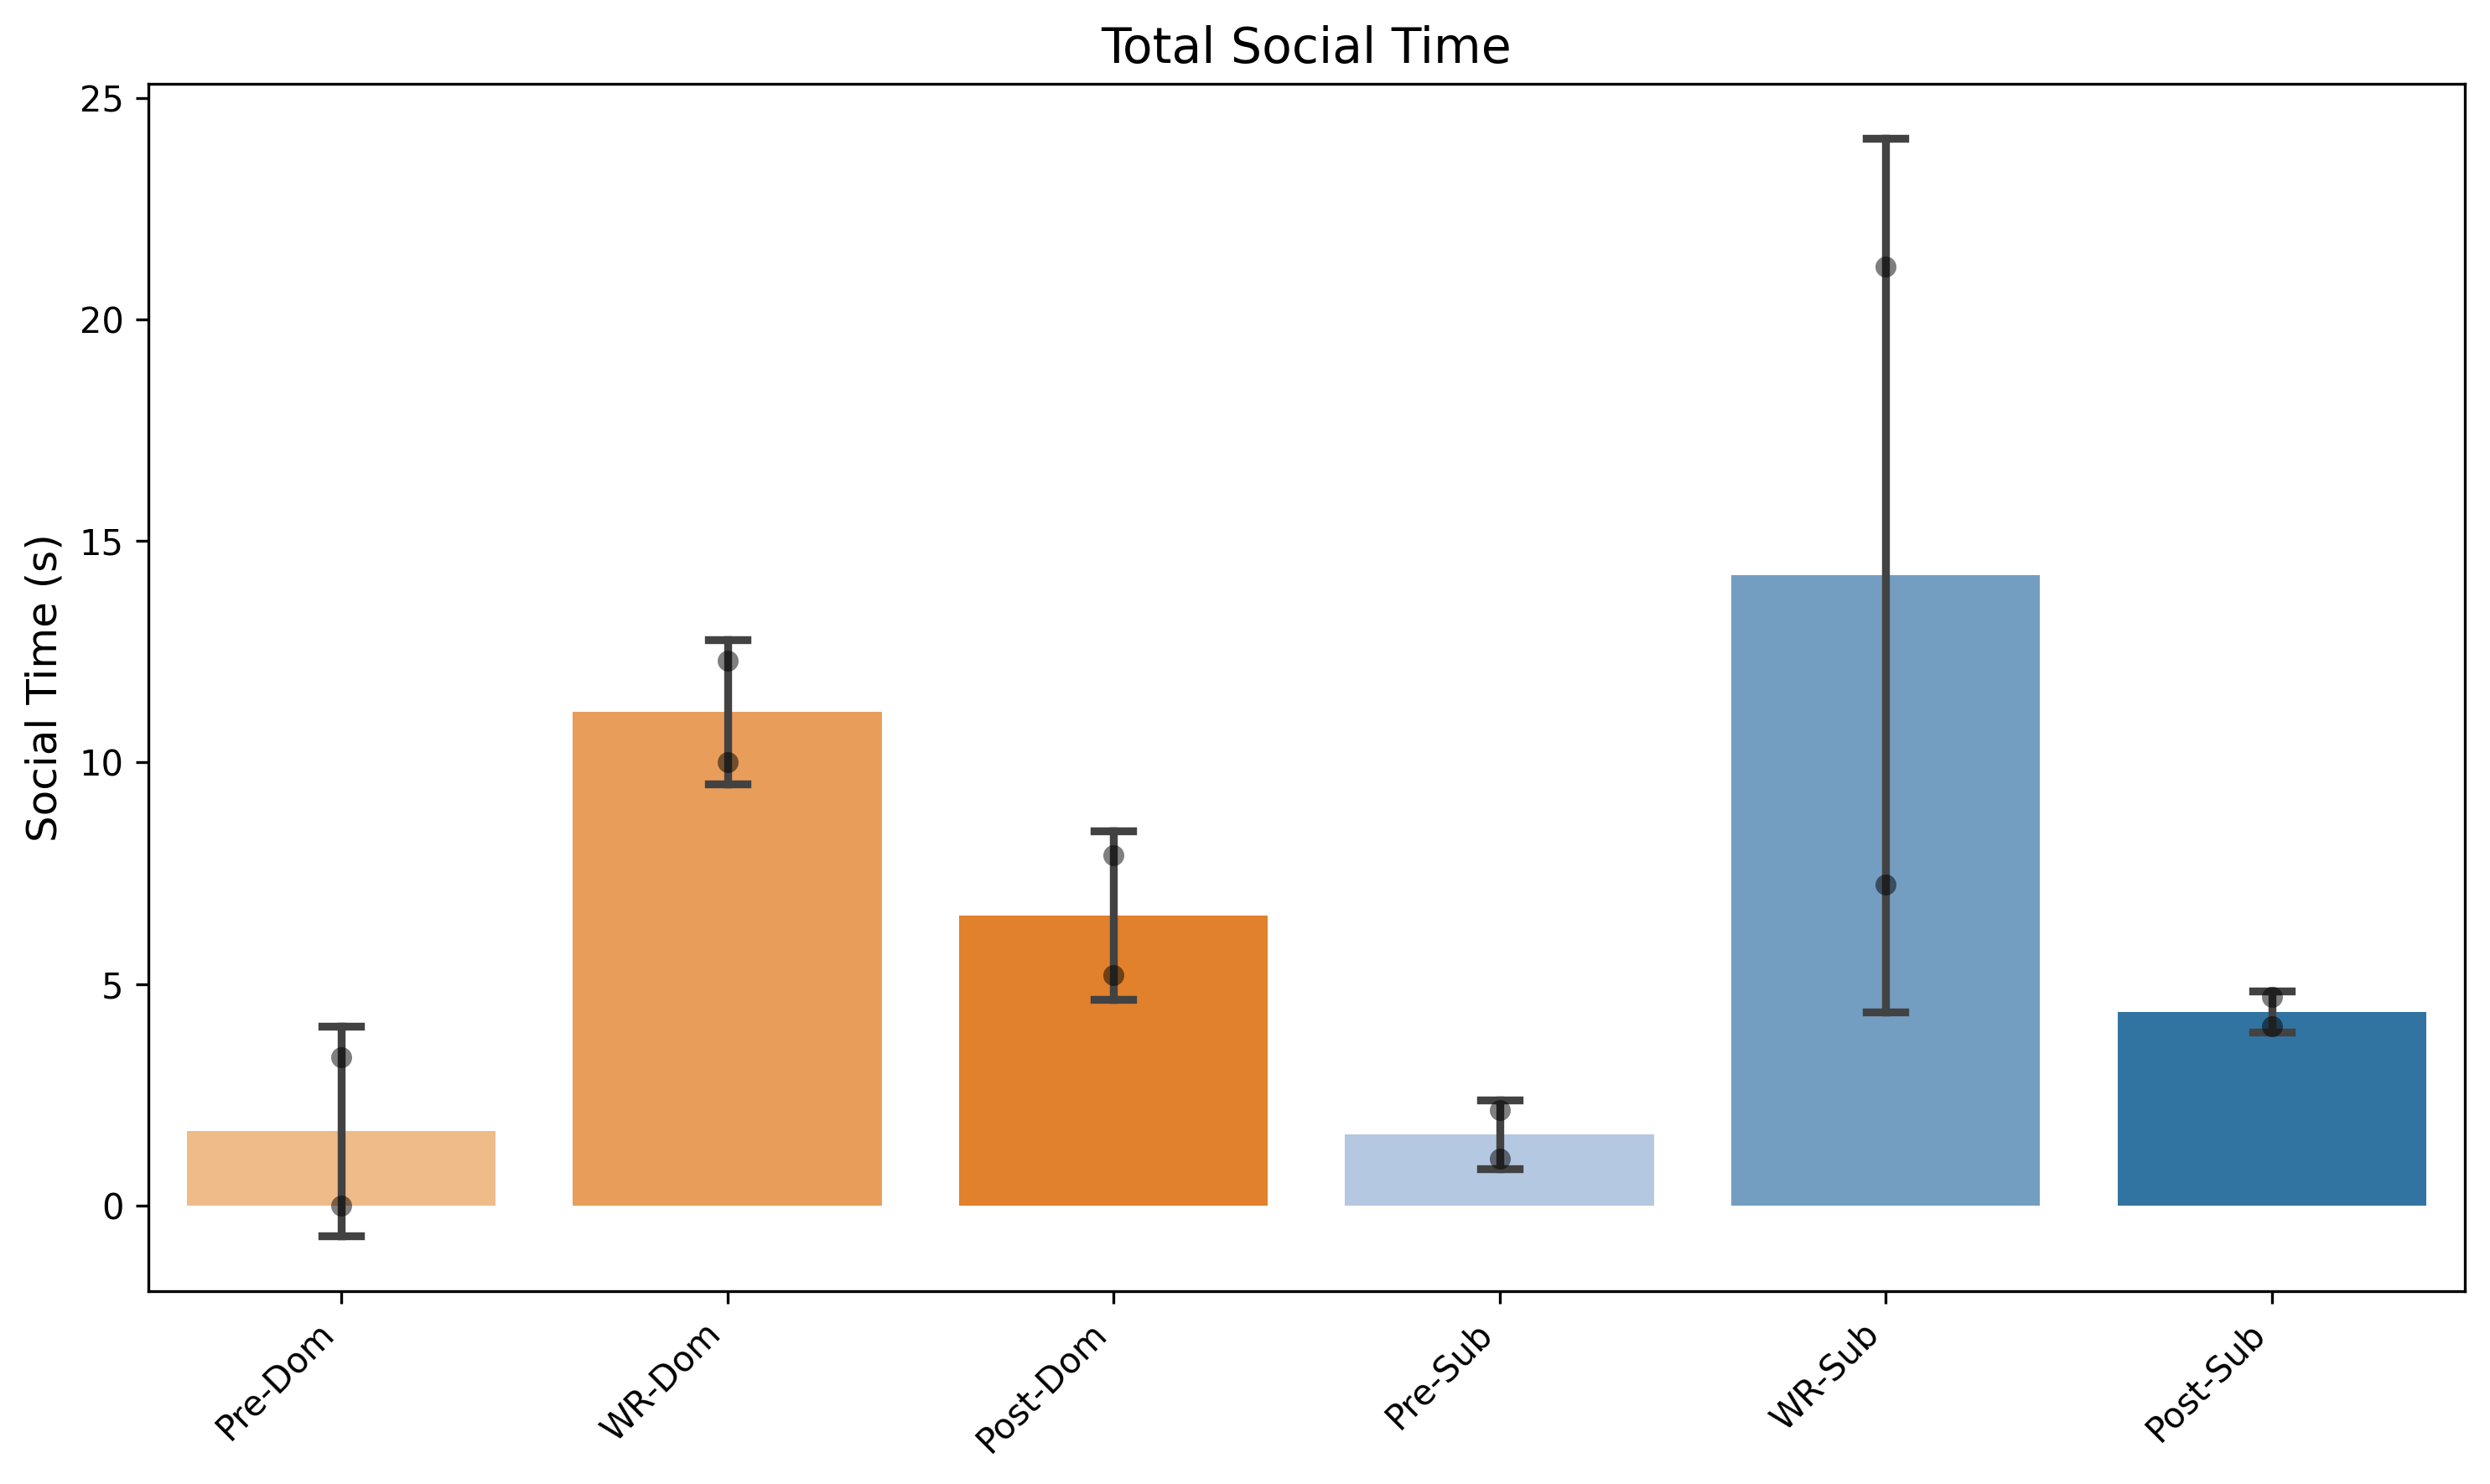

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


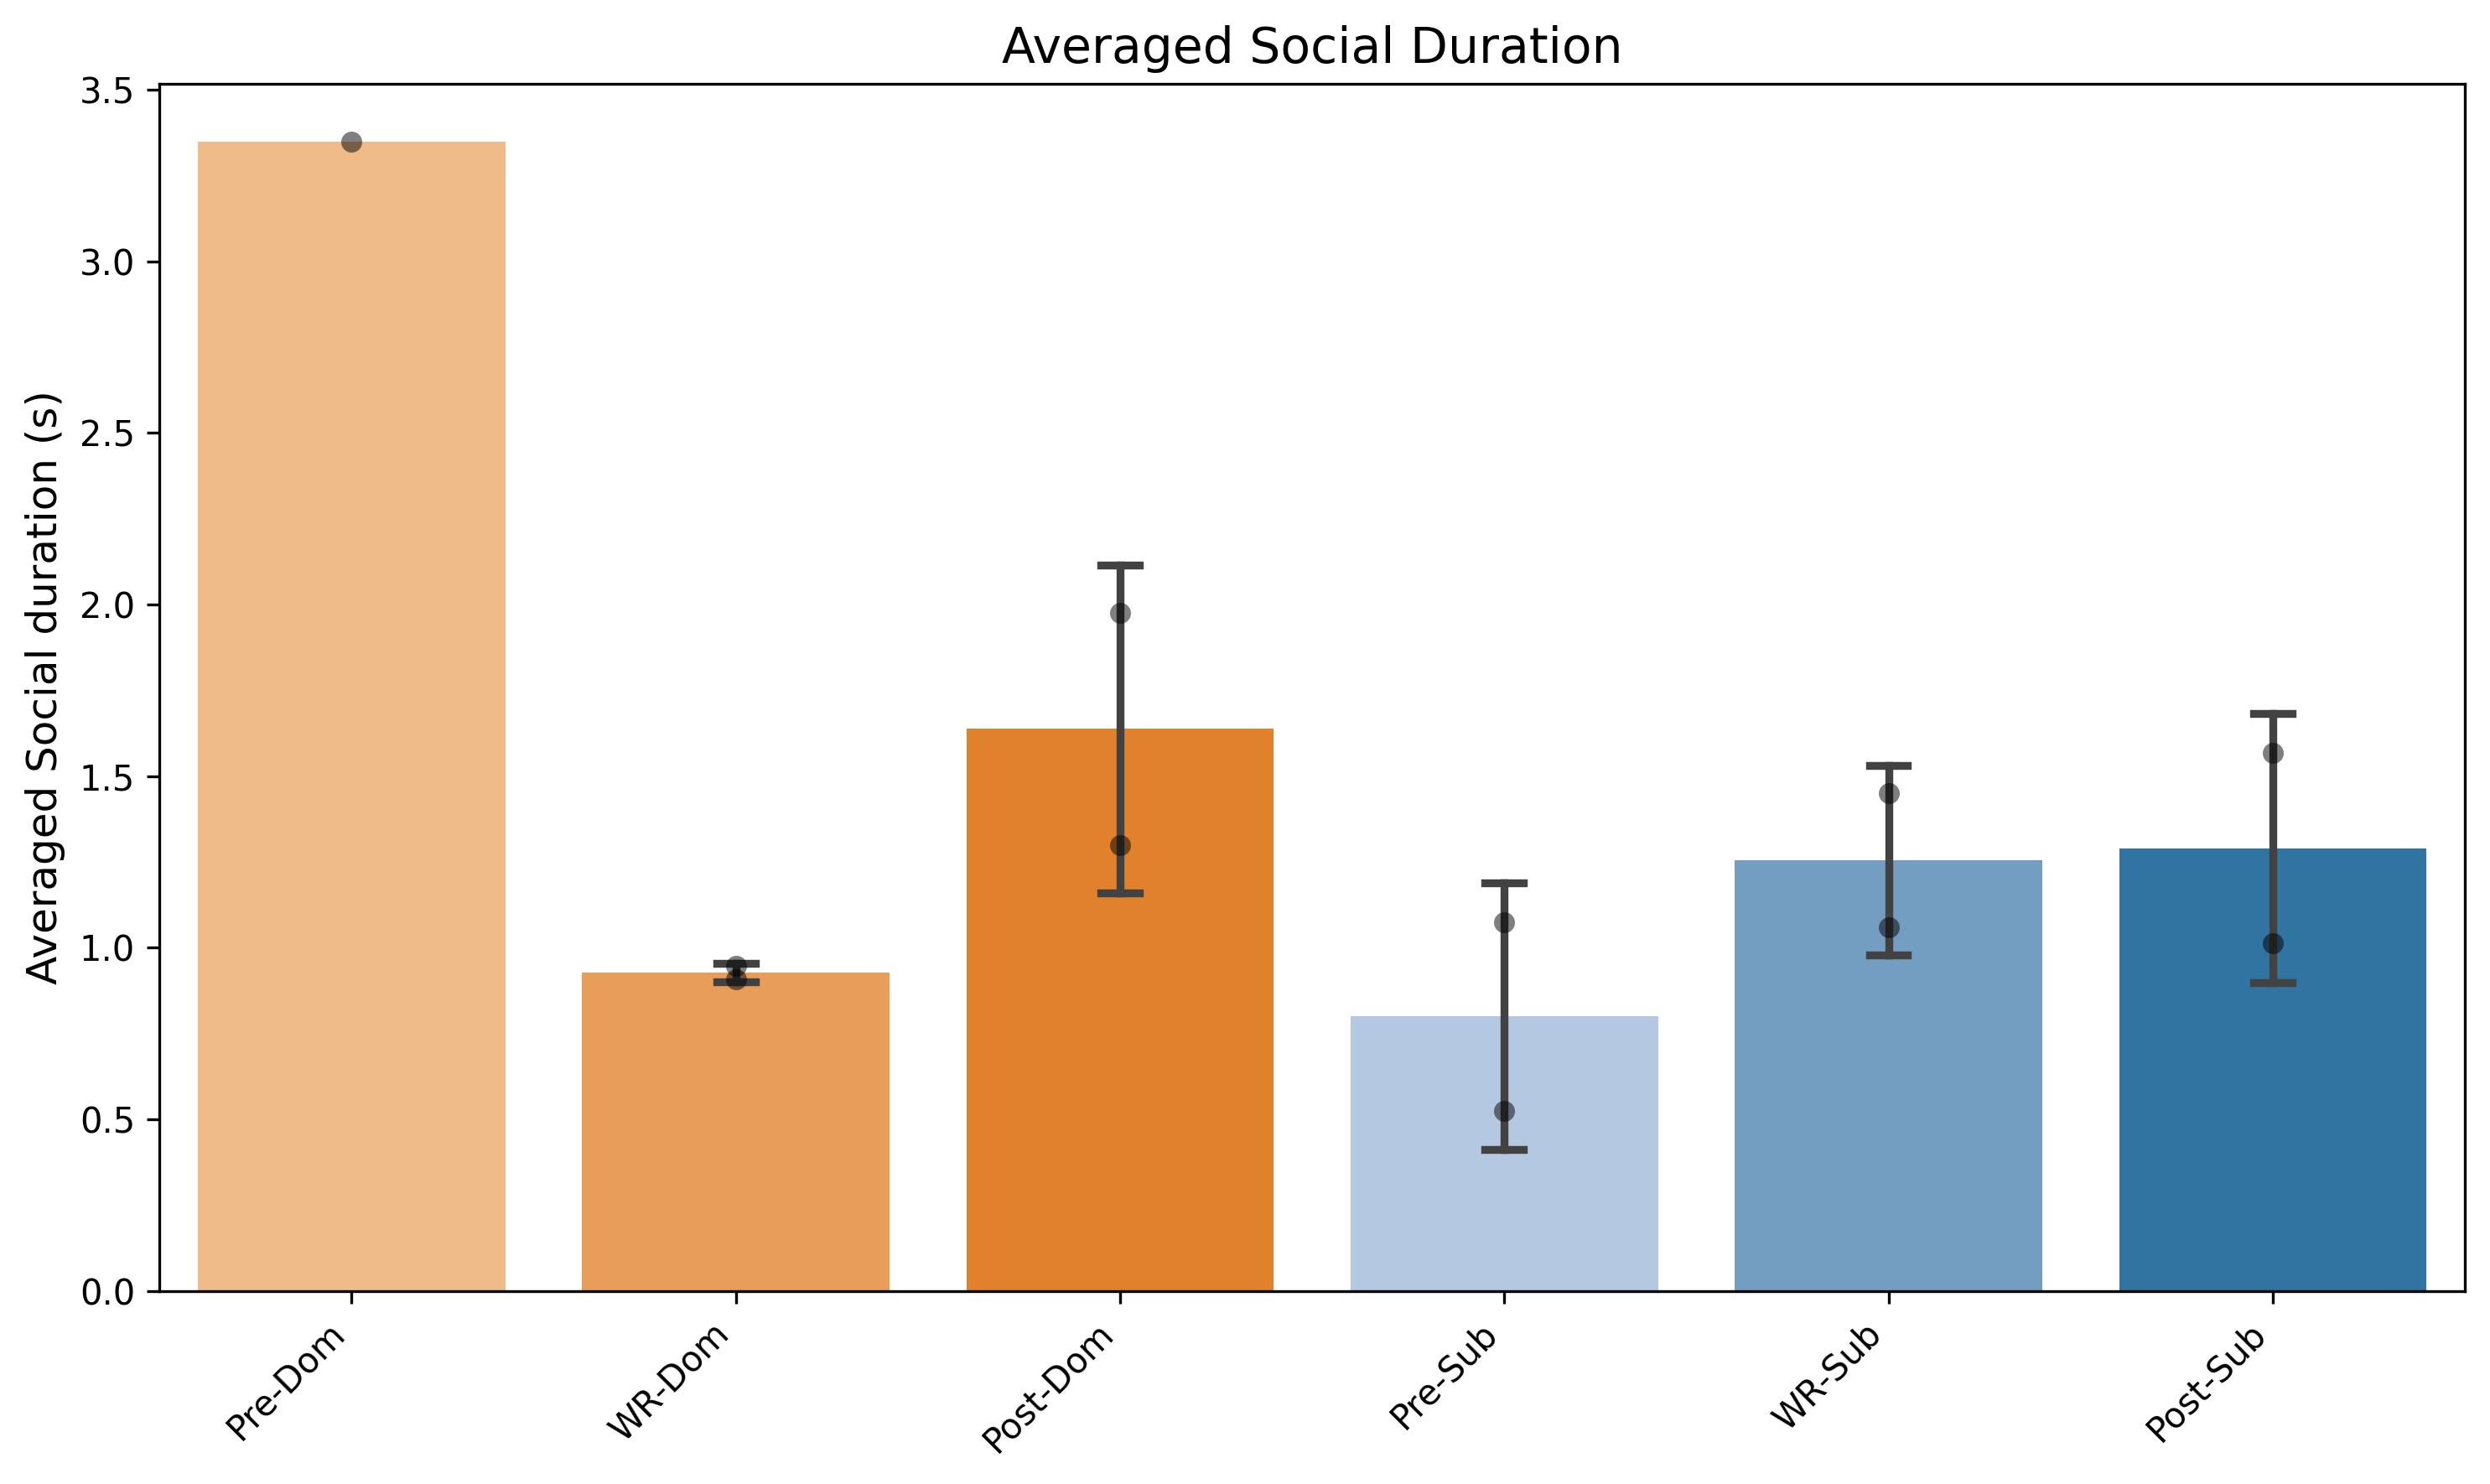

In [39]:
from analyze_data_ret_zj_utils.DataAnalyzer import (
    filter_behavior_in_time_range, 
    merge_filtered_behaviors, 
    merge_time_stage_dicts,
    calculate_total_time, 
    calculate_all_time, 
    calculate_average_duration, 
    flatten_bhvr_tuples, 
    flatten_to_dataframe
    )
from analyze_data_ret_zj_utils.DataVisualizer import draw_bar_plot

social_group_map ={
    'Pre-Dom': ('Dom', '_Pre'), 
    'WR-Dom': ('Dom', '_WR'), 
    'Post-Dom': ('Dom', '_Post'),
    'Pre-Sub': ('Sub', '_Pre'), 
    'WR-Sub': ('Sub', '_WR'), 
    'Post-Sub': ('Sub', '_Post'),
    }
included_keywords = ['Pair', 'WithRat']
soc_color_dict = {
    'Pre-Dom': '#ffbb78',
    'WR-Dom': '#ff9d43',
    'Post-Dom': '#ff7f0e',
    'Pre-Sub': '#aec7e8',
    'WR-Sub': '#679fce',
    'Post-Sub': '#1f77b4',
}
Soc_bhvr_list = ['approachP', 'followP', 'groomP', 'sniffP', 'watchP', 'huddling']

pre_Soc_data = filter_behavior_in_time_range(bhvr_tuples_dict, pre_toi_dict, Soc_bhvr_list)
wr_Soc_data = filter_behavior_in_time_range(bhvr_tuples_dict, wr_toi_dict, Soc_bhvr_list)
post_Soc_data = filter_behavior_in_time_range(bhvr_tuples_dict, post_toi_dict, Soc_bhvr_list)
Soc_data = merge_time_stage_dicts(pre_Soc_data, wr_Soc_data, post_Soc_data)
Soc_data_merged = merge_filtered_behaviors(Soc_data, merged_name='Soc')

total_Soc_time = calculate_total_time(Soc_data_merged)
all_Soc_times = calculate_all_time(Soc_data_merged)

total_Soc_time_grouped = group_data_by_sess_id(total_Soc_time, included_keywords, social_group_map)
total_Soc_time_grouped_flat = flatten_bhvr_tuples(total_Soc_time_grouped)

all_Soc_times_df = flatten_to_dataframe(total_Soc_time_grouped_flat, value_column='time_sec')

draw_bar_plot(
    total_Soc_time_grouped_flat,
    ylabel='Social Time (s)',
    title='Total Social Time',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)

avg_Soc_dur = calculate_average_duration(Soc_data_merged)

avg_Soc_dur_grouped = group_data_by_sess_id(avg_Soc_dur, included_keywords, social_group_map)
avg_Soc_dur_grouped_flat = flatten_bhvr_tuples(avg_Soc_dur_grouped)

all_Soc_times_df = flatten_to_dataframe(avg_Soc_dur_grouped_flat, value_column='time_sec')
draw_bar_plot(
    avg_Soc_dur_grouped_flat,
    ylabel='Averaged Social duration (s)',
    title='Averaged Social Duration',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)

#### 4.9.2 Draw proactive and reactive social behavior.

Found 6 paired sessions


/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


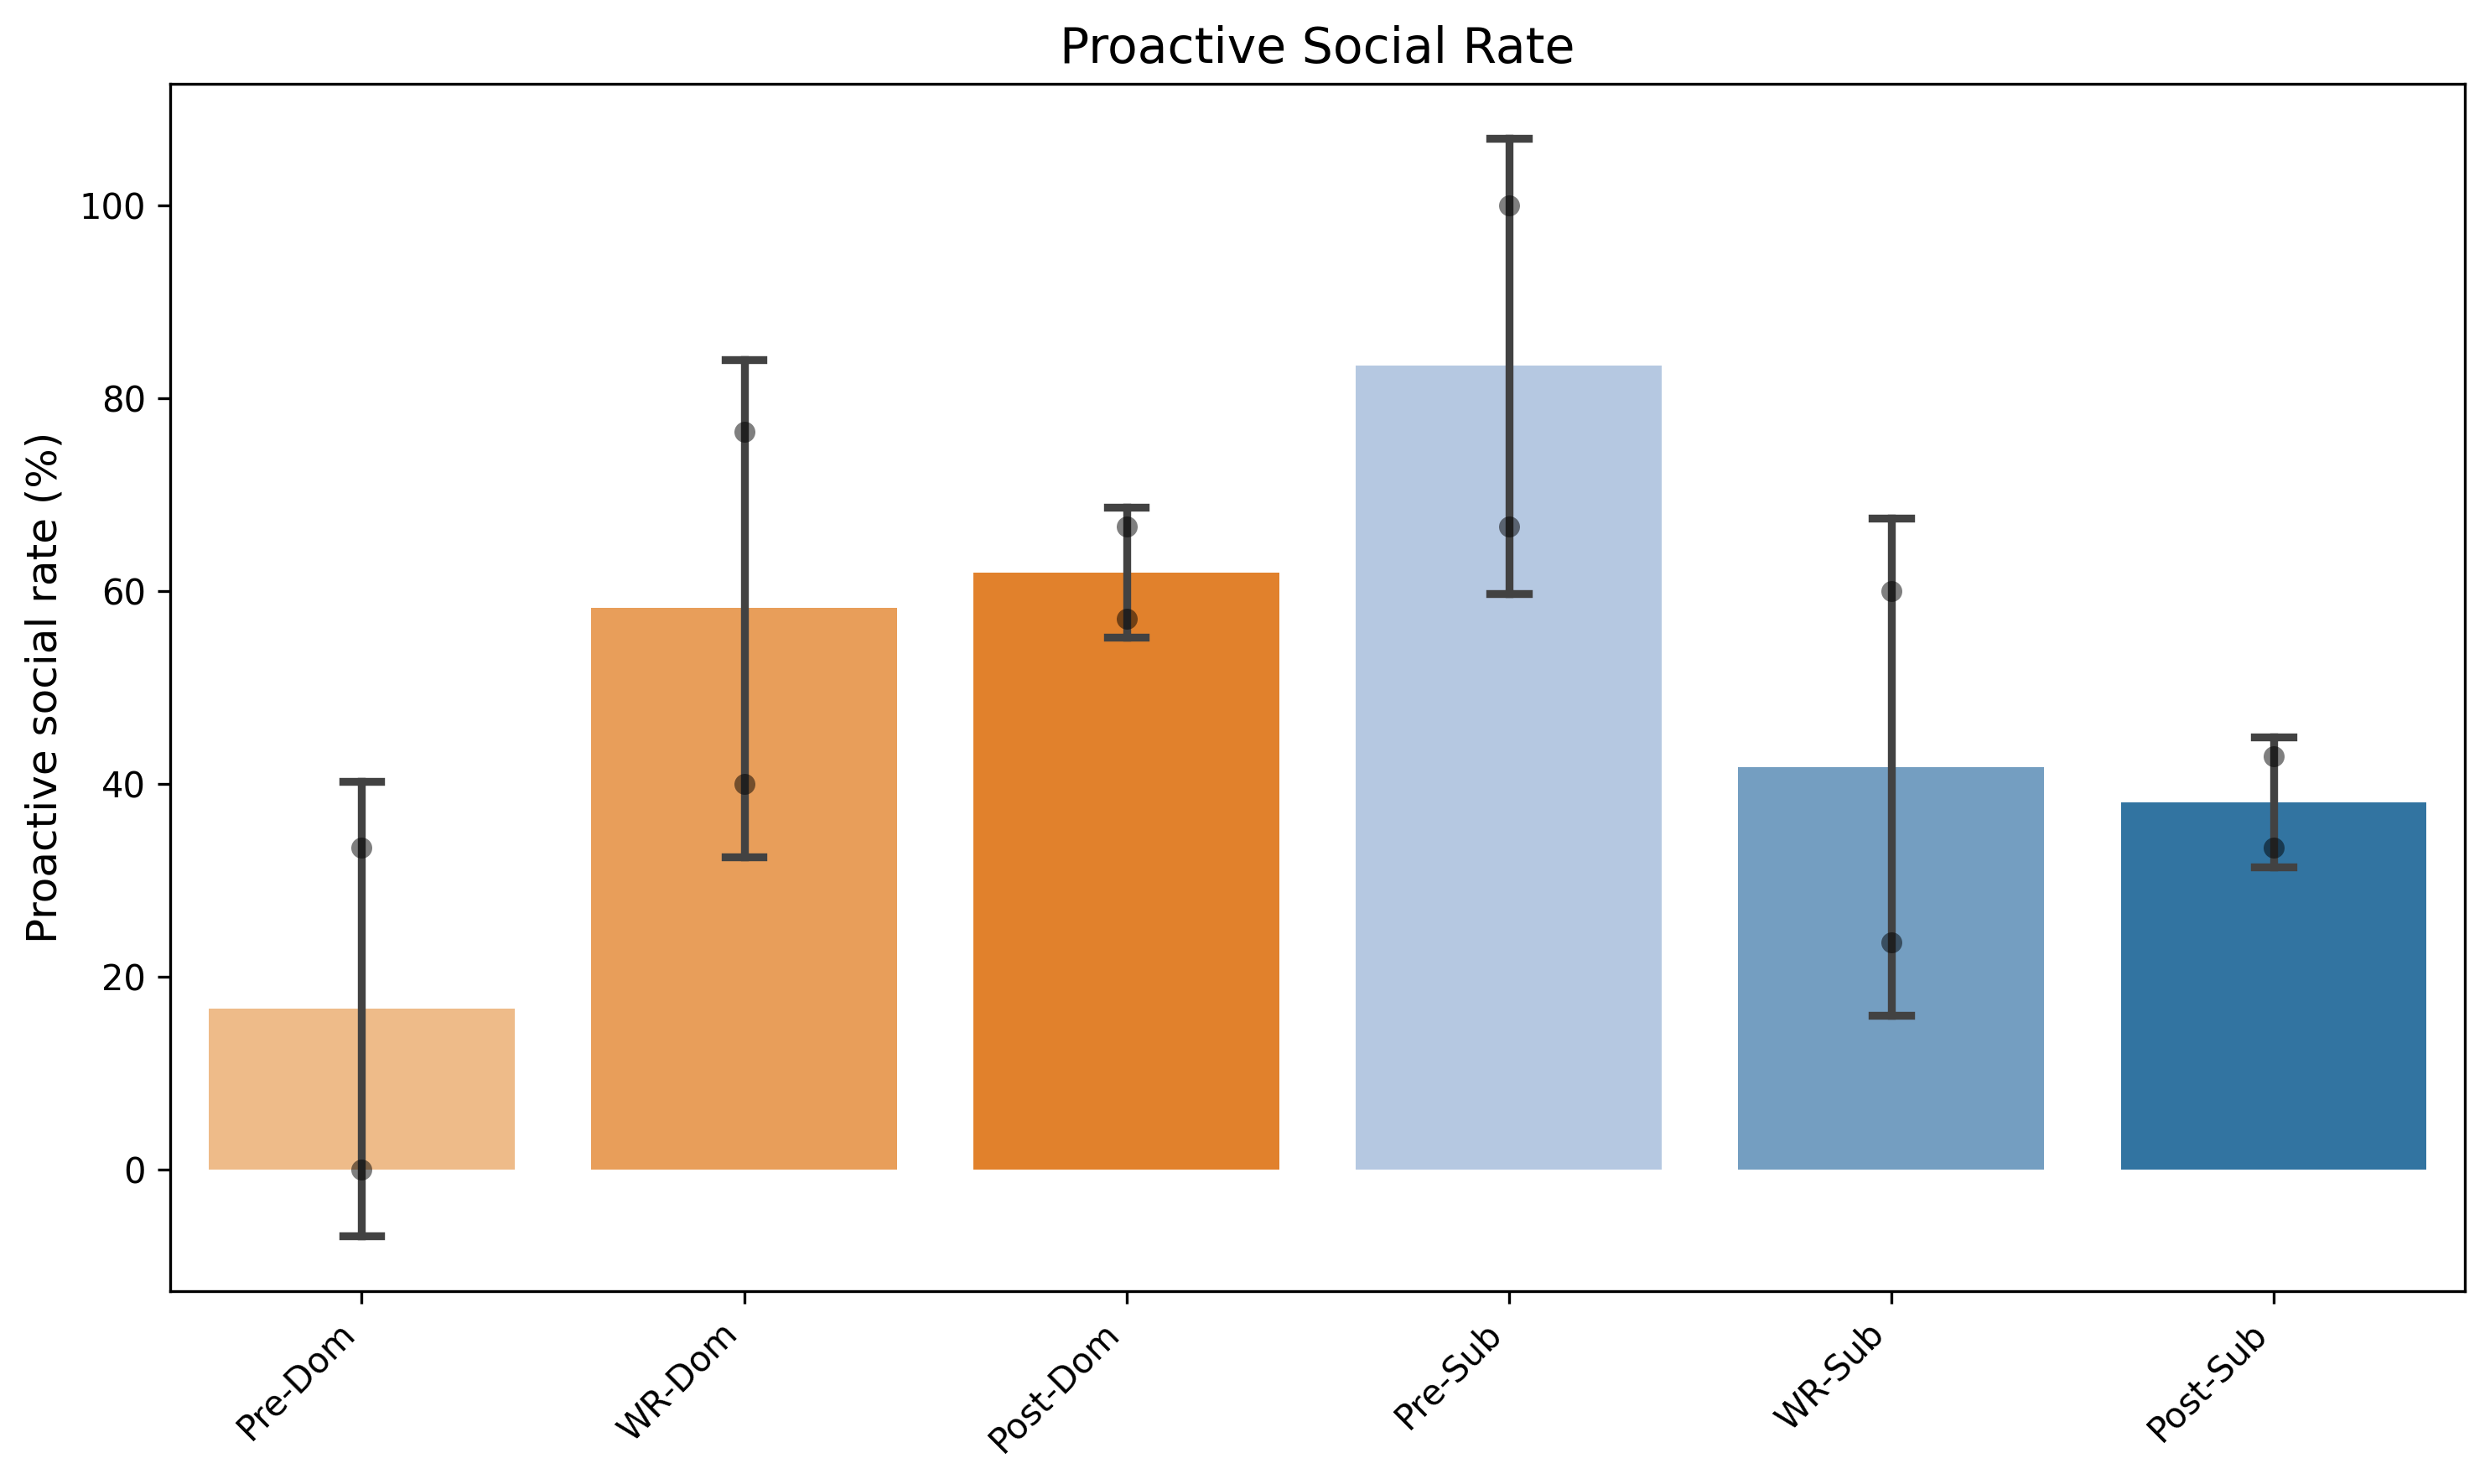

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


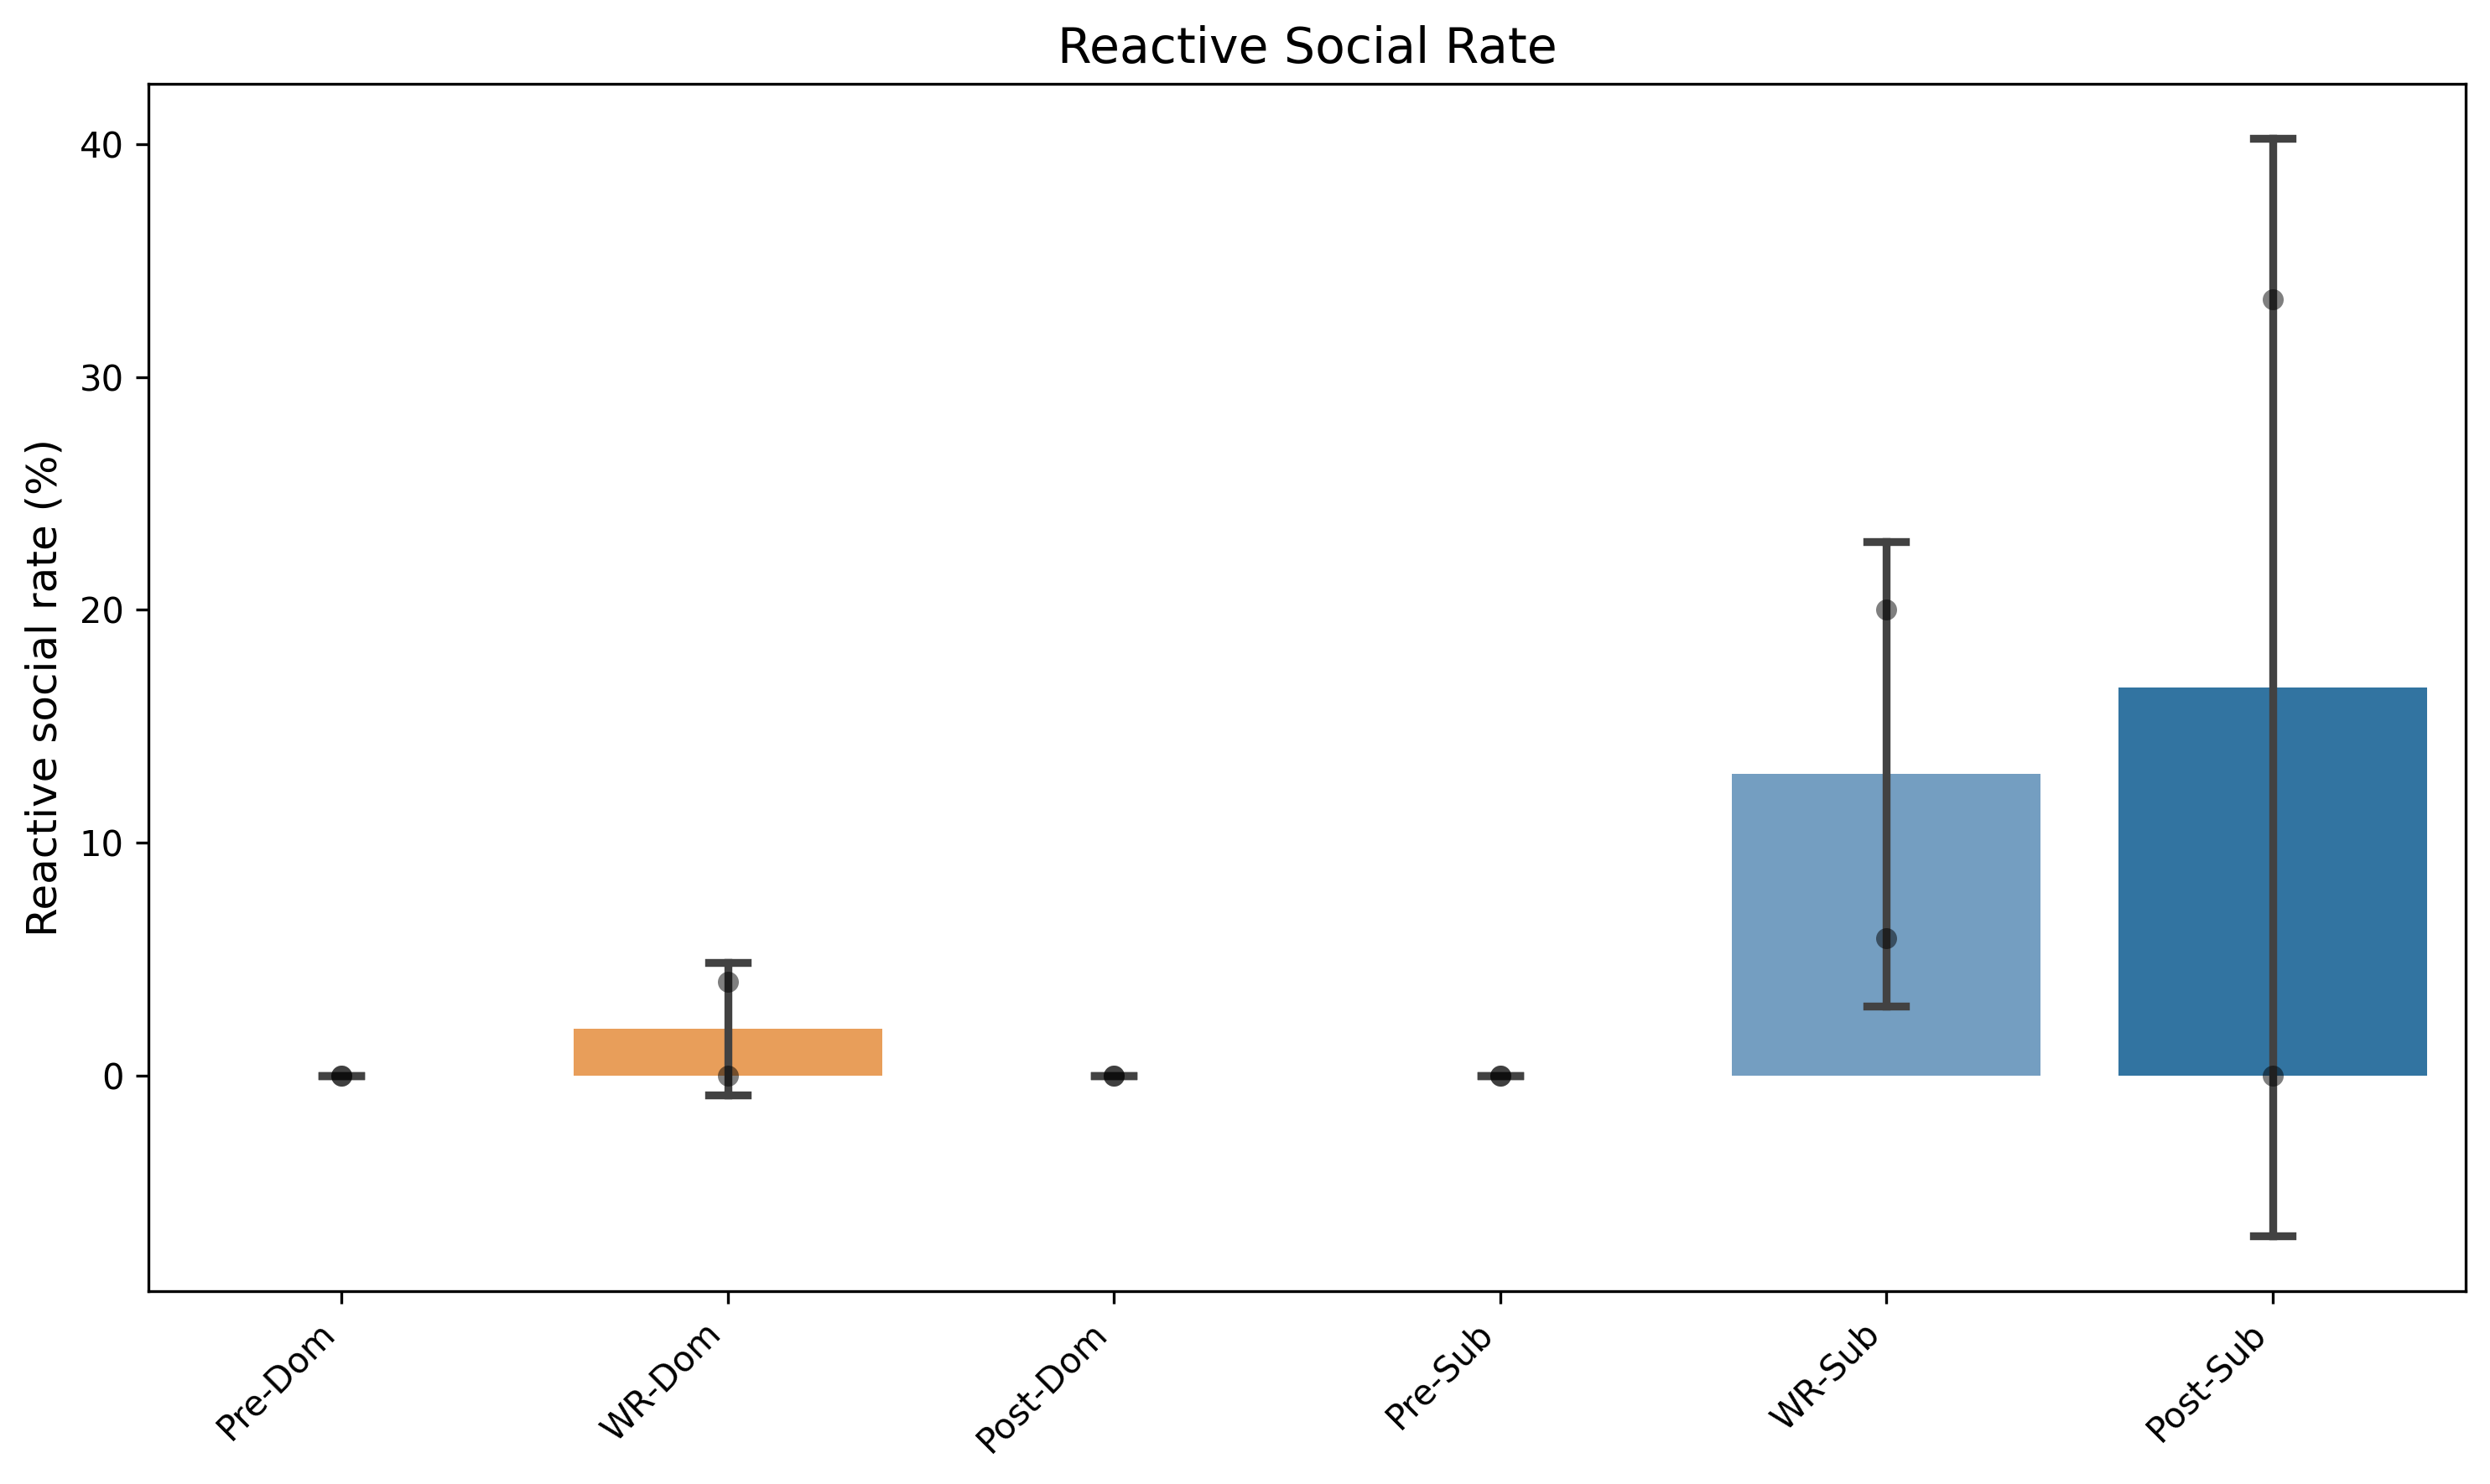

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


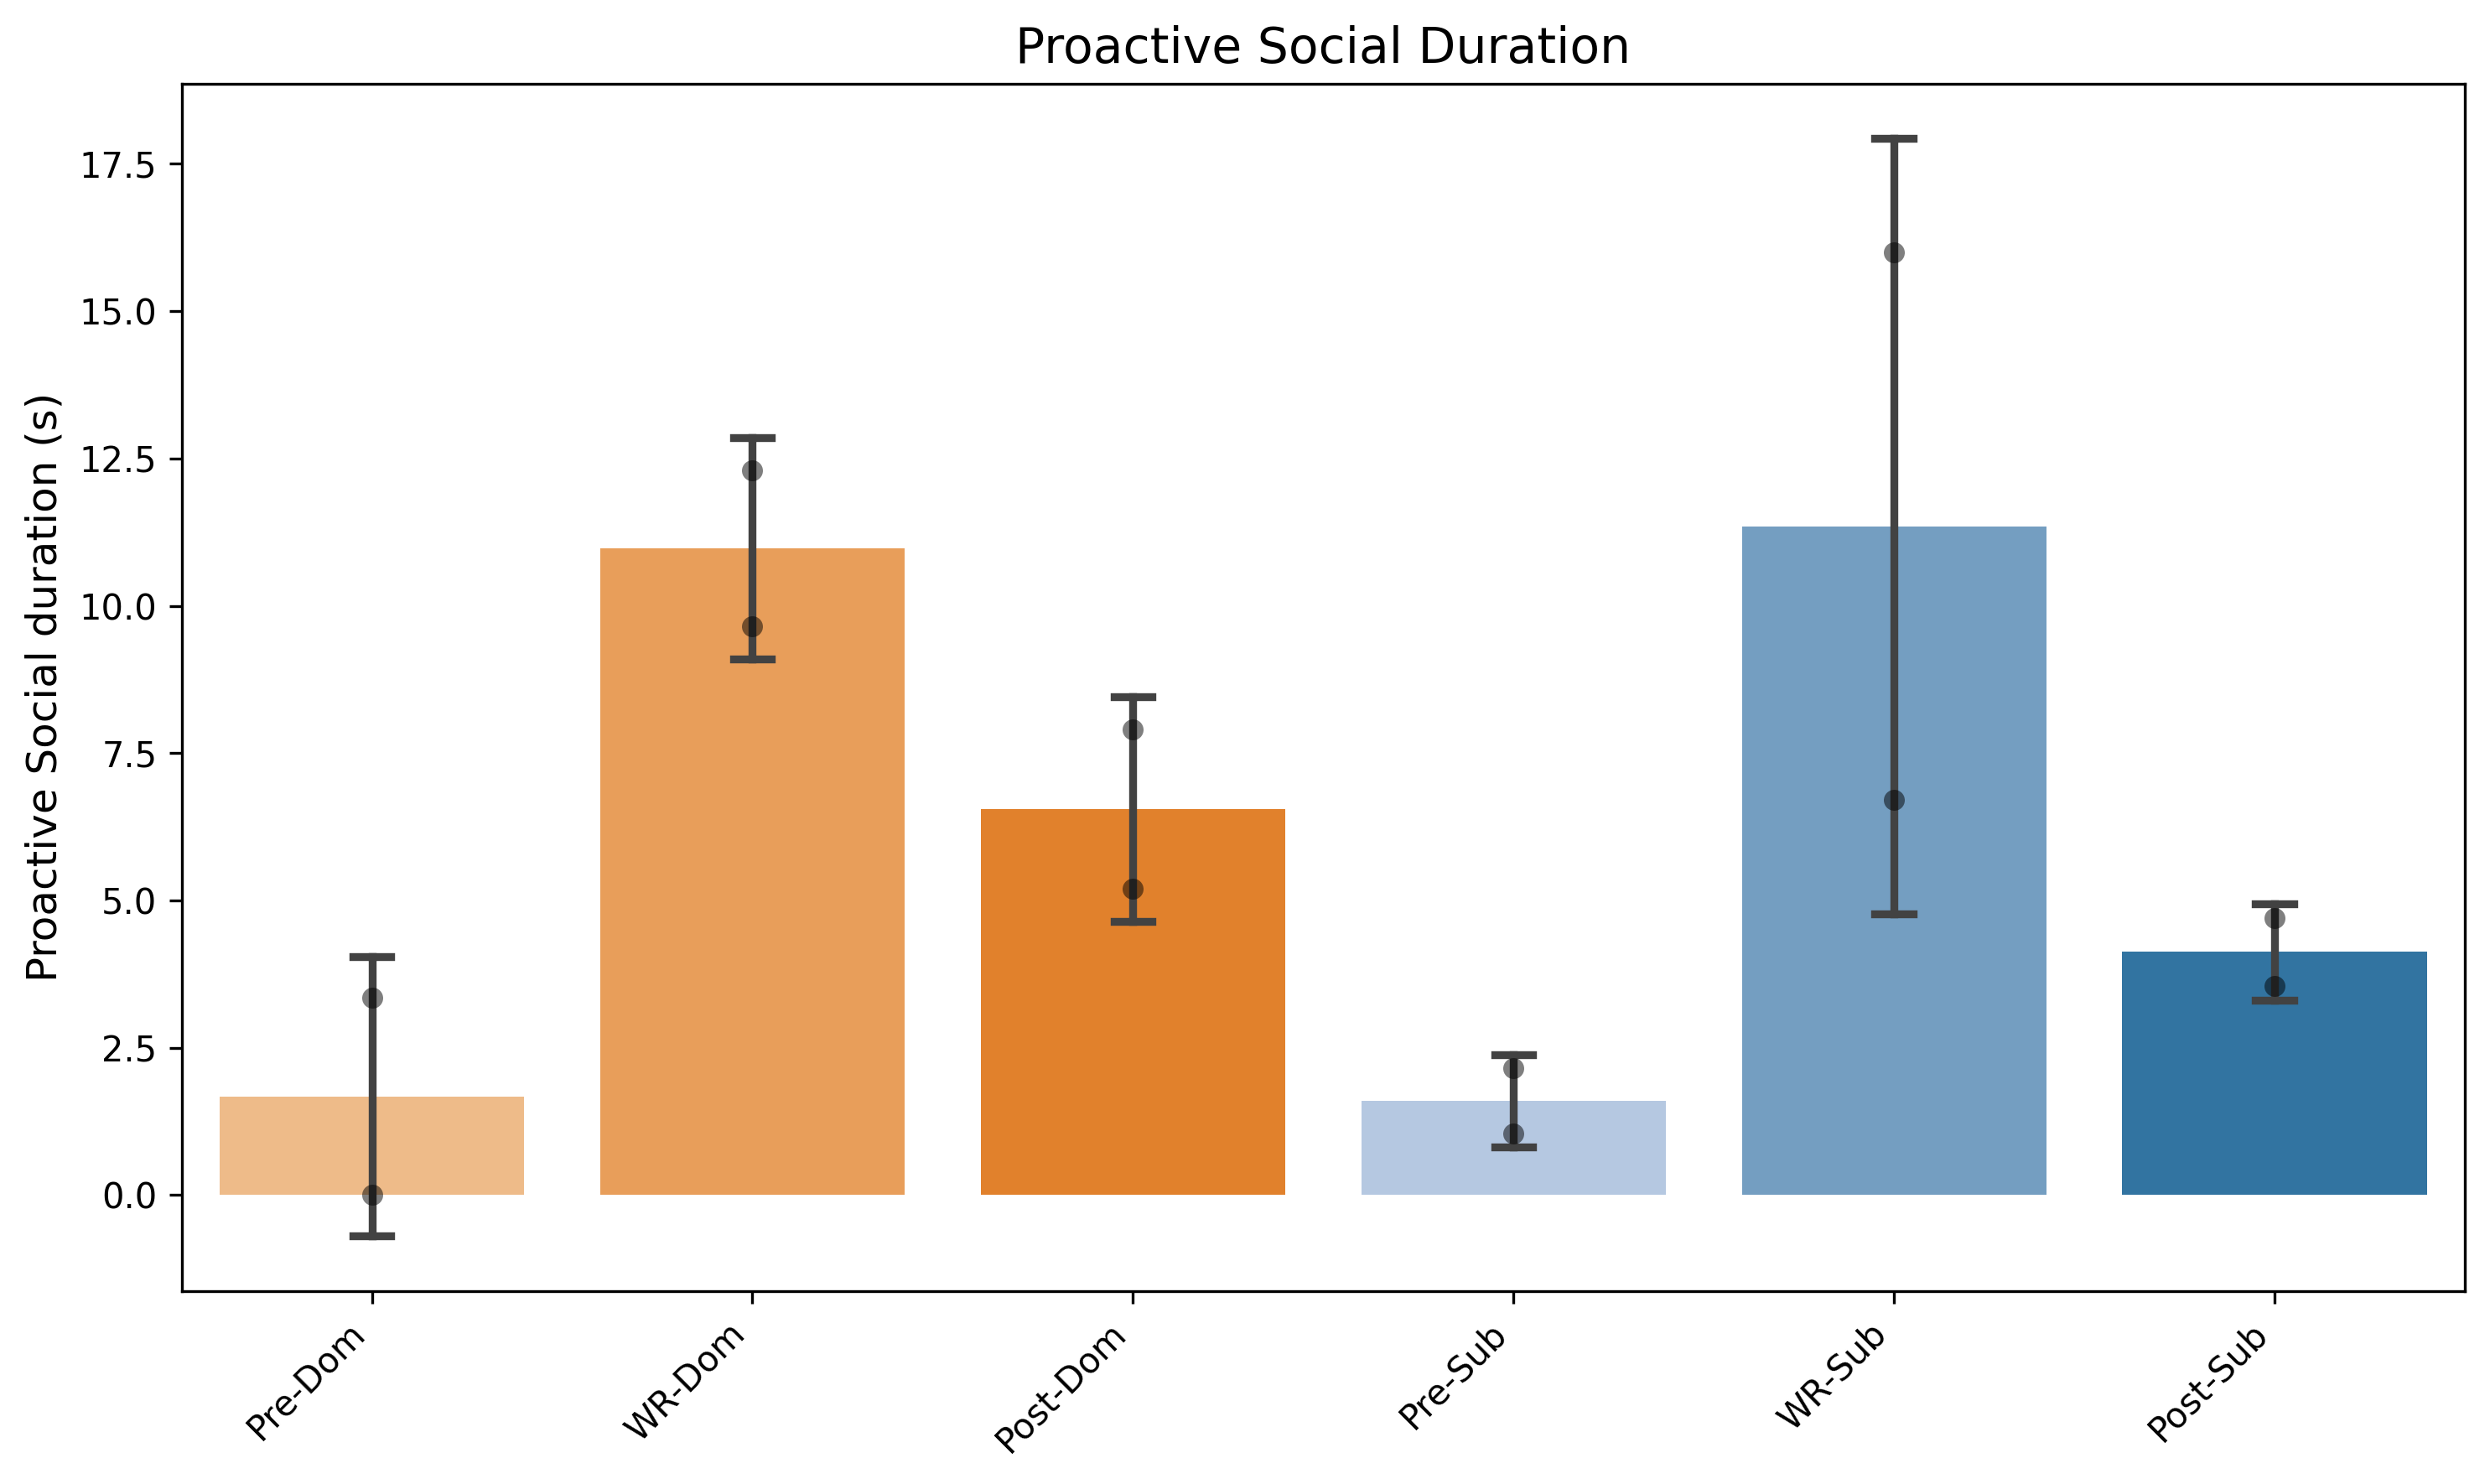

/home/gxj/Desktop/gxj/code/sb_ret_code/analyze_data_ret_zj_utils/DataVisualizer.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='group', y='value', palette=use_palette, ax=ax,


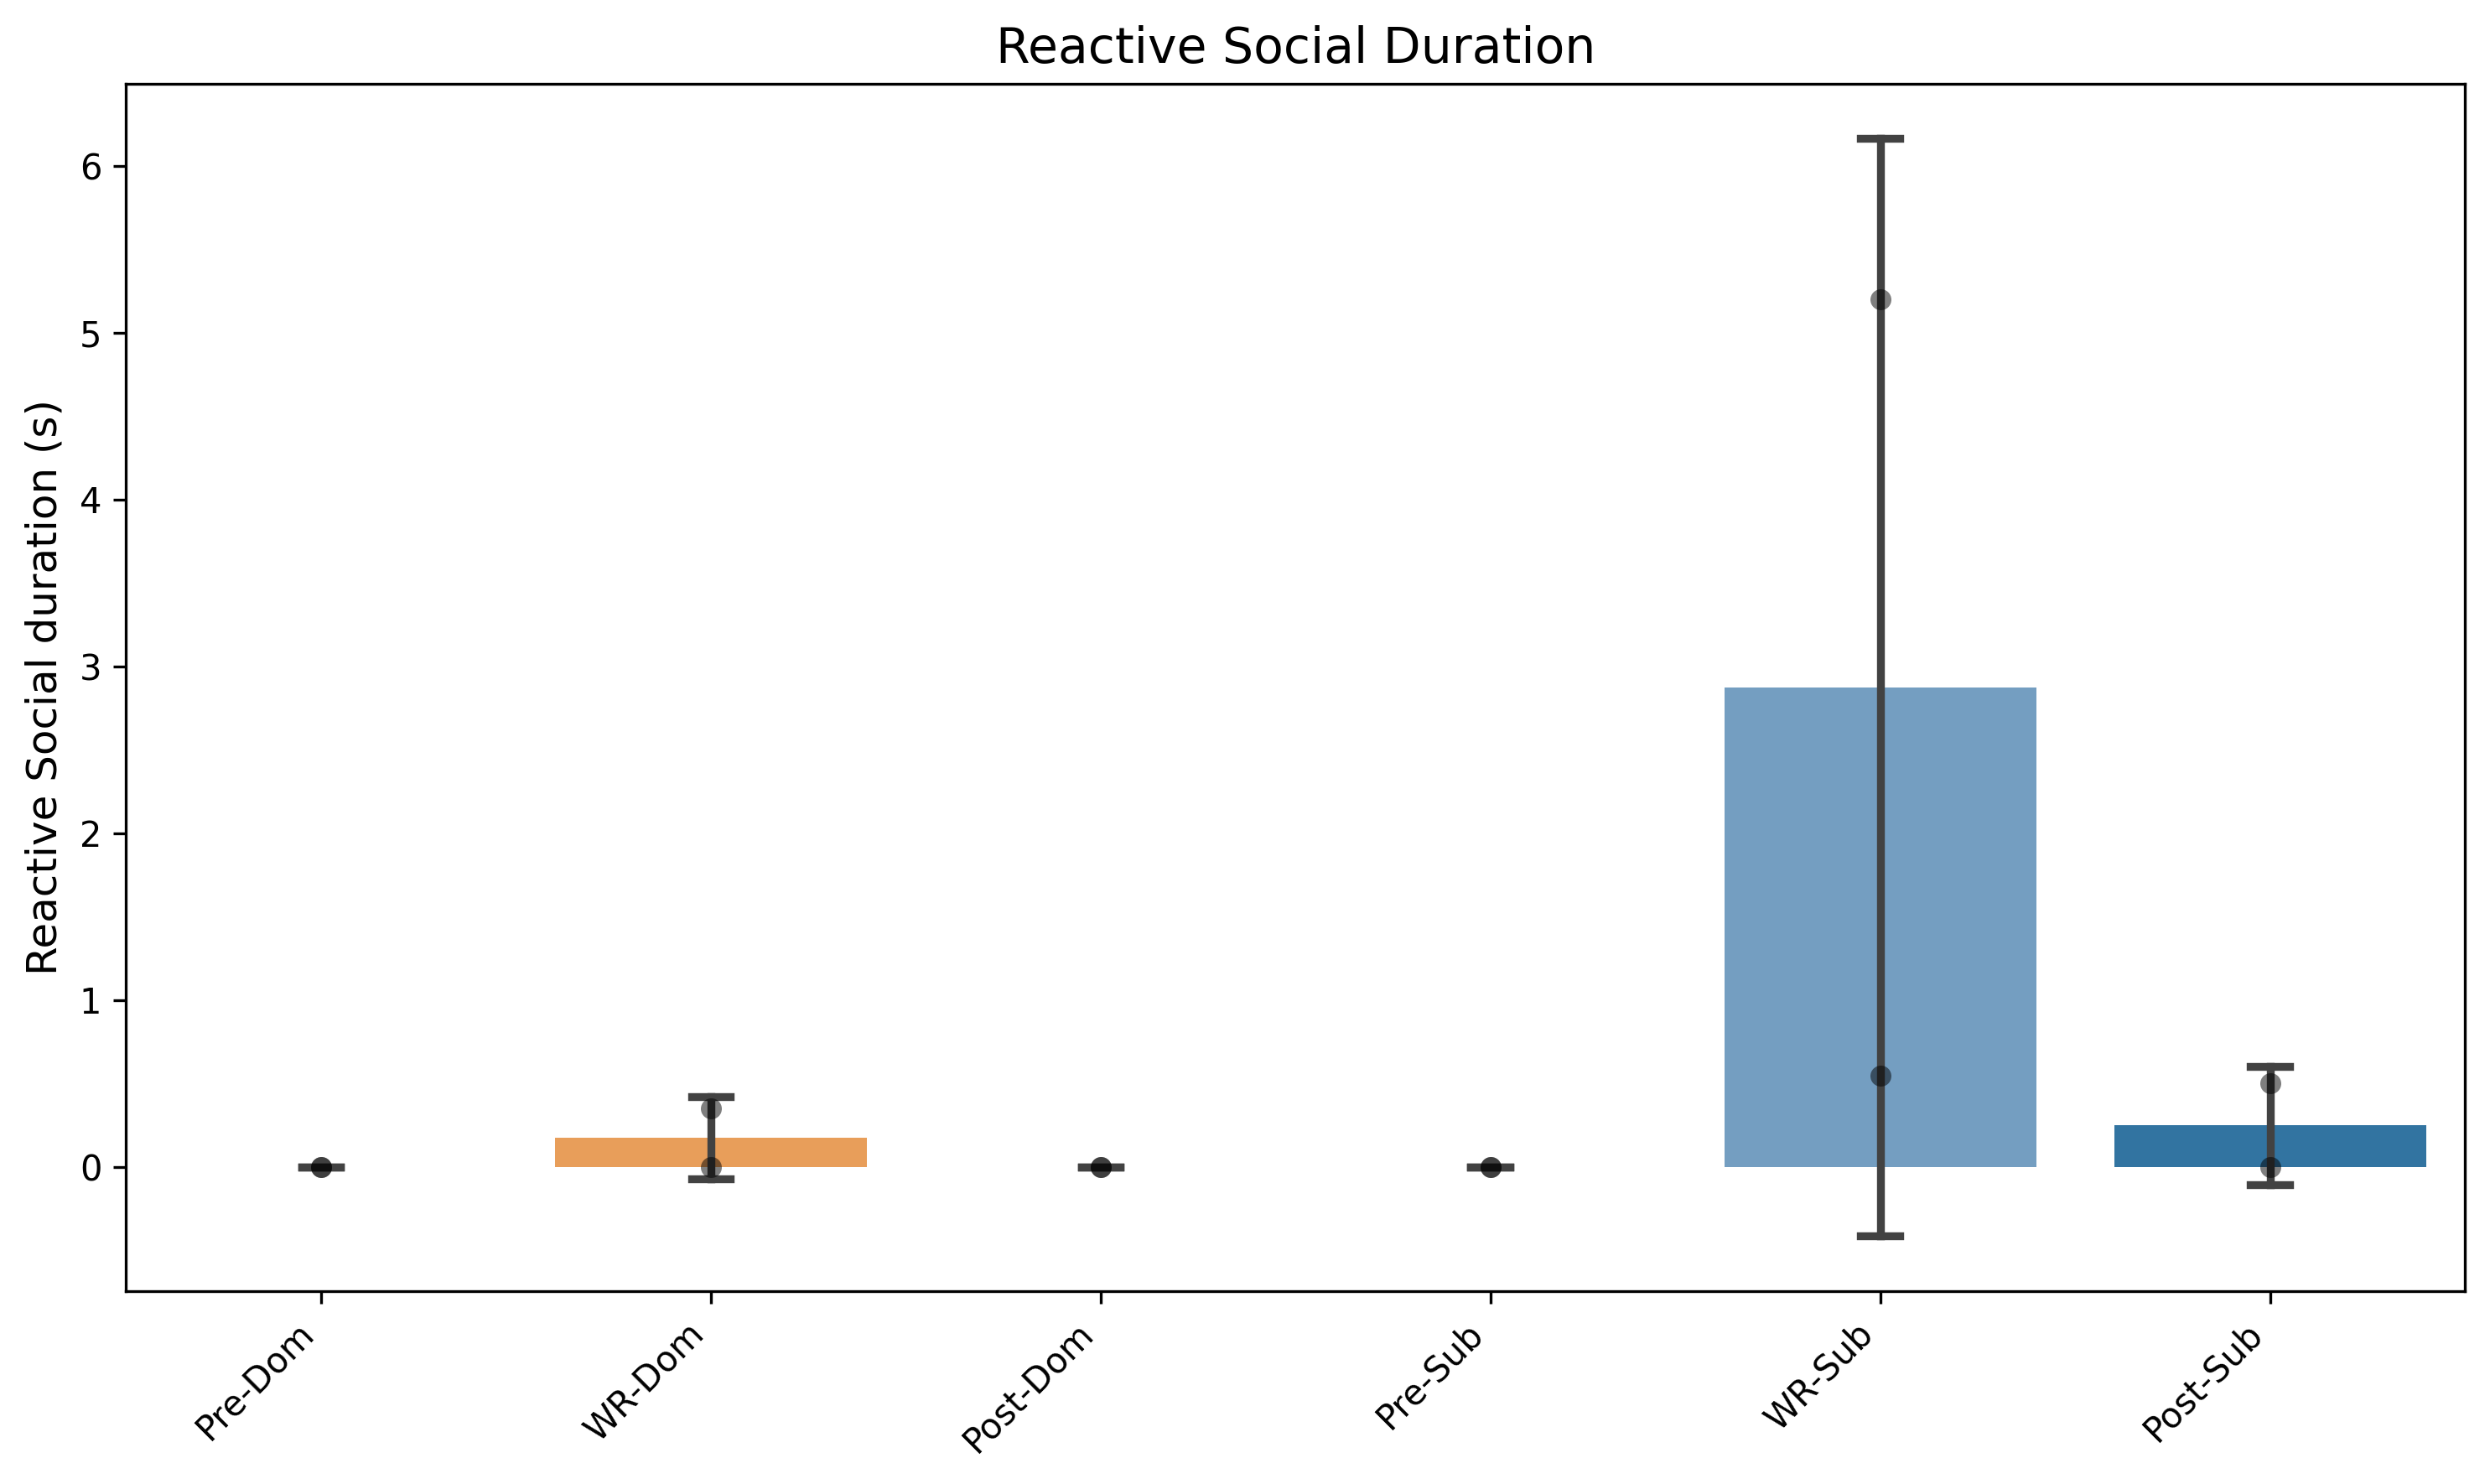

In [40]:
from analyze_data_ret_zj_utils.DataAnalyzer import calculate_social_interaction, calculate_total_time, calculate_average_duration
Soc_i_data, Soc_pro_data, Soc_re_data, pairs = calculate_social_interaction(Soc_data_merged)


Soc_pro_rate = calculate_average_duration(Soc_pro_data, from_durations=True)
Soc_pro_rate_grouped = group_data_by_sess_id(Soc_pro_rate, included_keywords, social_group_map)
Soc_pro_rate_grouped_flat = flatten_bhvr_tuples(Soc_pro_rate_grouped)
all_Soc_times_df = flatten_to_dataframe(Soc_pro_rate_grouped_flat, value_column='time_sec')
draw_bar_plot(
    Soc_pro_rate_grouped_flat,
    ylabel='Proactive social rate (%)',
    title='Proactive Social Rate',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)

Soc_re_rate = calculate_average_duration(Soc_re_data, from_durations=True)
Soc_re_rate_grouped = group_data_by_sess_id(Soc_re_rate, included_keywords, social_group_map)
Soc_re_rate_grouped_flat = flatten_bhvr_tuples(Soc_re_rate_grouped)
all_Soc_times_df = flatten_to_dataframe(Soc_re_rate_grouped_flat, value_column='time_sec')
draw_bar_plot(
    Soc_re_rate_grouped_flat,
    ylabel='Reactive social rate (%)',
    title='Reactive Social Rate',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)

pro_bhvr_data = {}
re_bhvr_data = {}
for sess_id in Soc_i_data.keys():
    interaction = Soc_i_data[sess_id]['interaction']
    Soc_bhvrs = Soc_data_merged[sess_id]['Soc']
    pro_idx = 0
    pro_bhvr_data[sess_id] = {'proactive': []}
    for idx, label in enumerate(interaction):
        if label not in ['p3', 'sp']:
            pro_idx += 1
            if label in ['s1', 's2', 's3']:
                pro_bhvr_data[sess_id]['proactive'].append(Soc_bhvrs[pro_idx-1])
    re_idx = 0 
    re_bhvr_data[sess_id] = {'reactive': []}
    for idx, label in enumerate(interaction):
        if label not in ['p3', 'sp']:
            re_idx += 1
            if label in ['p1', 'p2',]:
                re_bhvr_data[sess_id]['reactive'].append(Soc_bhvrs[re_idx-1])


Soc_pro_time = calculate_total_time(pro_bhvr_data)
Soc_pro_time_grouped = group_data_by_sess_id(Soc_pro_time, included_keywords, social_group_map)
Soc_pro_time_grouped_flat = flatten_bhvr_tuples(Soc_pro_time_grouped)
all_Soc_times_df = flatten_to_dataframe(Soc_pro_time_grouped_flat, value_column='time_sec')
draw_bar_plot(
    Soc_pro_time_grouped_flat,
    ylabel='Proactive Social duration (s)',
    title='Proactive Social Duration',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)

Soc_re_time = calculate_total_time(re_bhvr_data)
Soc_re_time_grouped = group_data_by_sess_id(Soc_re_time, included_keywords, social_group_map)
Soc_re_time_grouped_flat = flatten_bhvr_tuples(Soc_re_time_grouped)
all_Soc_times_df = flatten_to_dataframe(Soc_re_time_grouped_flat, value_column='time_sec')
draw_bar_plot(
    Soc_re_time_grouped_flat,
    ylabel='Reactive Social duration (s)',
    title='Reactive Social Duration',
    show_points=True, 
    color_dict=soc_color_dict, 
    jitter=False
)